In [2]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
import pandas as pd
from scipy import stats
from scipy.special import gamma, factorial, jv
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from lightkurve import MPLSTYLE
%matplotlib inline

In [3]:
dirName = os.getcwd()
ext = ('lc.fits')
systemCount = 0

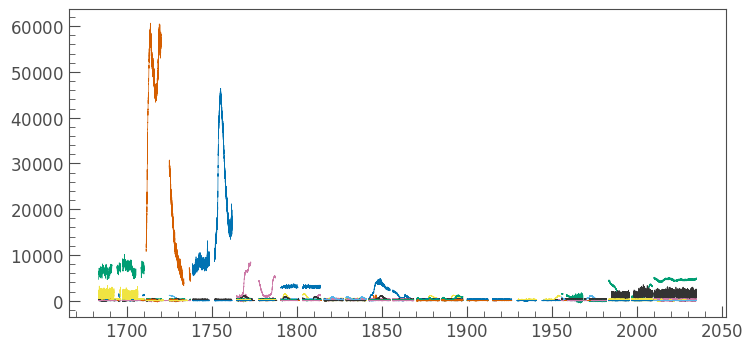

In [4]:
for files in os.listdir(dirName):
    if files.endswith(ext):
        lc = fits.open(files)
        x = lc[1].data['TIME']
        y = lc[1].data['PDCSAP_FLUX']
        with plt.style.context(MPLSTYLE):
            plt.plot(x, y)
    else:
        continue

In [25]:
#for files in os.listdir(dirName):
#    if files.endswith(ext):
#        x = open(files)
#        number = x.name[25:40]
#        name = "TIC " + number.lstrip('0')
#        path = name
#        isExist = os.path.exists(path)
#        if not isExist:
#            os.mkdir(name)
#    else:
#        continue

In [9]:
#for files in os.listdir(dirName):
#    if files.endswith(".pdf"):
#        x = open(files)
#        number = x.name[31:46]
#        x.close()
#        name = "TIC " + number.lstrip('0')
#        path = name
#        os.rename(files, f'{path}/{files}')
#    else:
#        continue

In [ ]:
for files in os.listdir(dirName):
    if files.endswith(ext):
        x = open(files)
        number = x.name[25:45]
        name = "TIC " + number.lstrip('0')
        lc = lk.read(files)
        lc.plot(column='pdcsap_flux')
        #plt.savefig(name + ' LC.png')
        #print(number)
        systemCount += 1
    else:
        continue

In [6]:
print(systemCount)

141


In [16]:
def MSD(data,variable):
    dataset = data[variable]
    timedata = data['pos_corr1']
    
    divider = 0
    for i in range(0,len(timedata)):
        if timedata[i] == 0:
            divider = i
        else:            
            continue
        
    count = 0
    prev = 0
    indexend = 0
    for i in range(0,len(dataset)):
        if dataset[i] != float('nan'):
            count += 1
        else:            
            if count > prev:
                prev = count
                indexend = i
            count = 0
            
    if count > prev:
        prev = count
        indexend = i + 1
            
    start_i = indexend - prev
    end_i = indexend - 1
        
    if start_i < divider < end_i:
        if end_i - divider+1 > divider - start_i:
            start = divider+1
            end = end_i
        else:
            start = start_i
            end = divider
    elif divider < start_i:
        start = start_i
        end = end_i
    elif divider+1 > end_i:
        start = start_i
        end = end_i
                
    y = np.array(dataset[start:end])
    N = np.arange(len(y))
    MSD = np.zeros(N.size)
    
    for i, shift in enumerate(N):
        diff = y[:-shift if shift else None] - y[shift:]
        sqdist = np.square(diff).sum(axis=0)
        MSD[i] = sqdist/(len(N)-i)
    
    return (N, MSD, start, end)

In [17]:
def logplot(data):
    with plt.style.context(MPLSTYLE):
        plt.loglog(data[0][1:], data[1][1:], 'k')
        plt.xlabel('log (Time)')
        plt.ylabel('log (MSD)')

C:\Users\panda\AppData\Local\Temp\ipykernel_10868\818909940.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


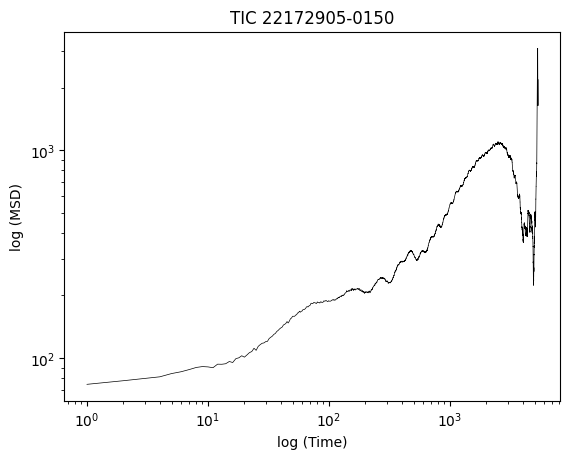

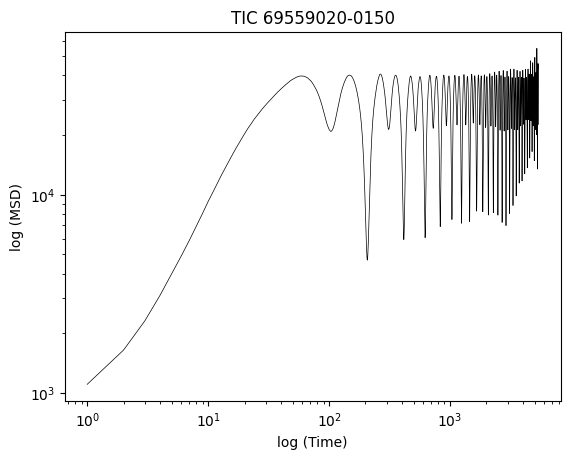

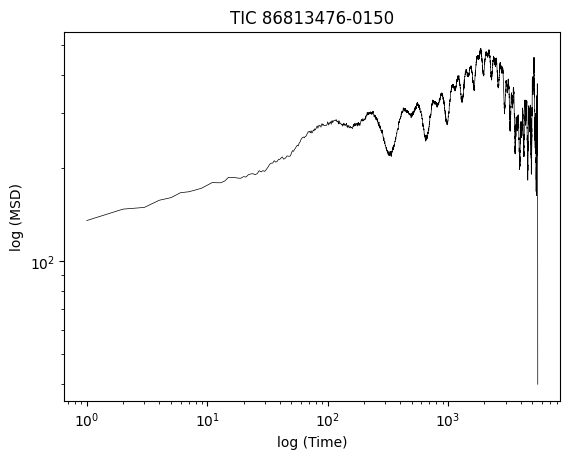

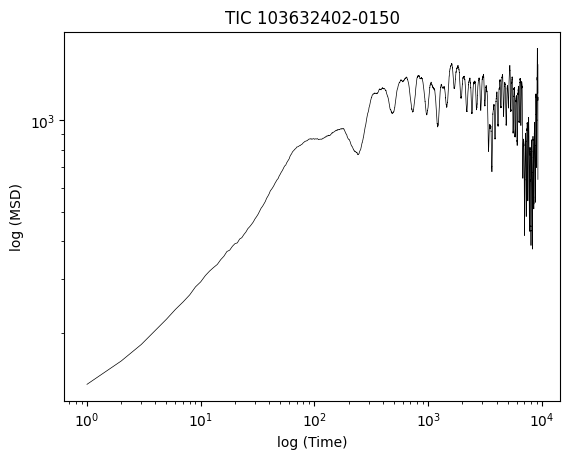

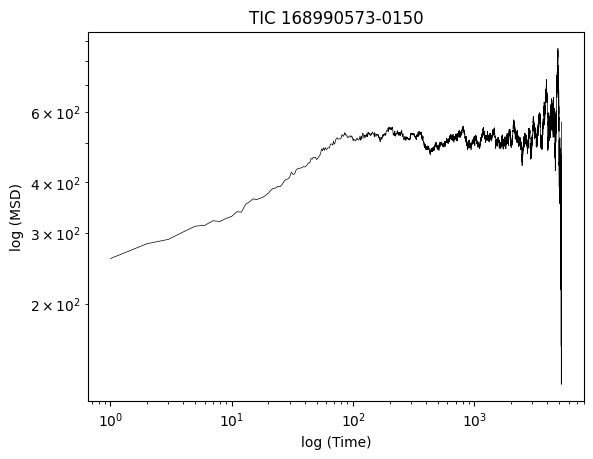

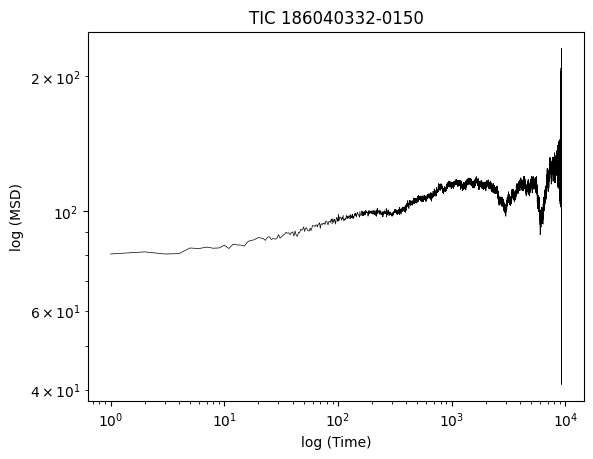

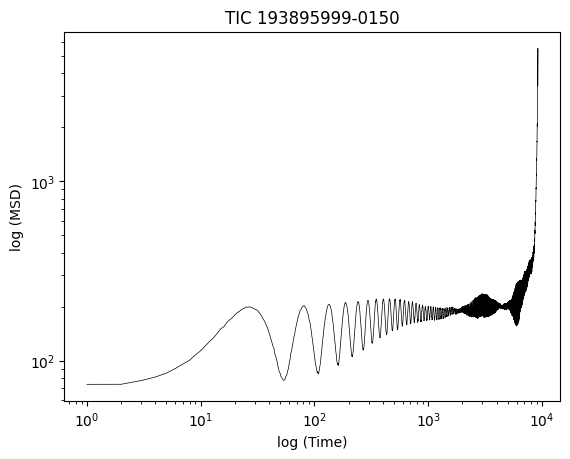

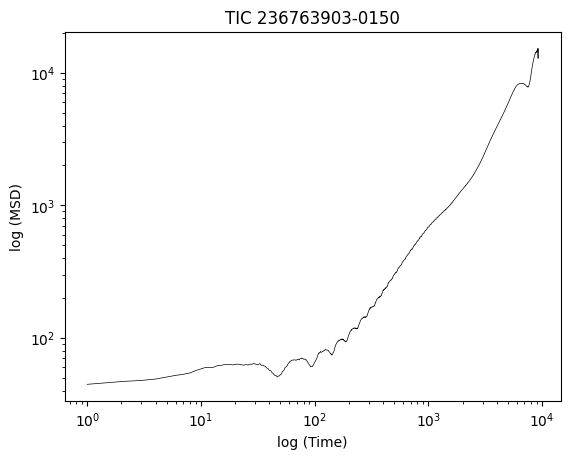

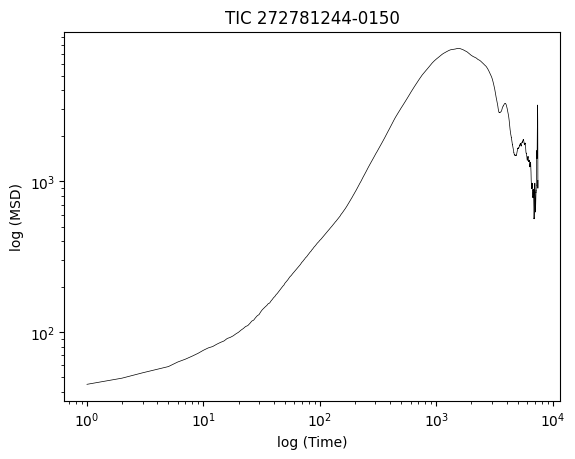

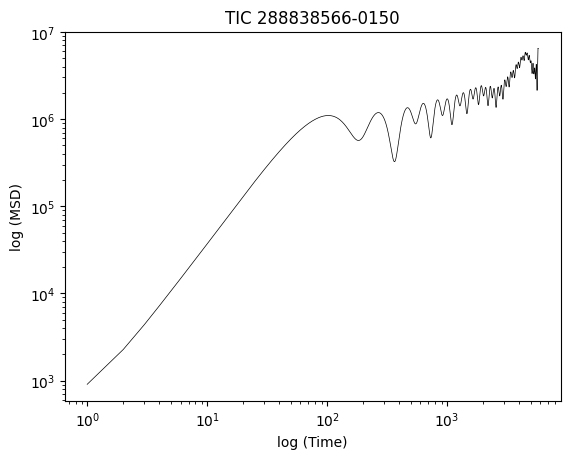

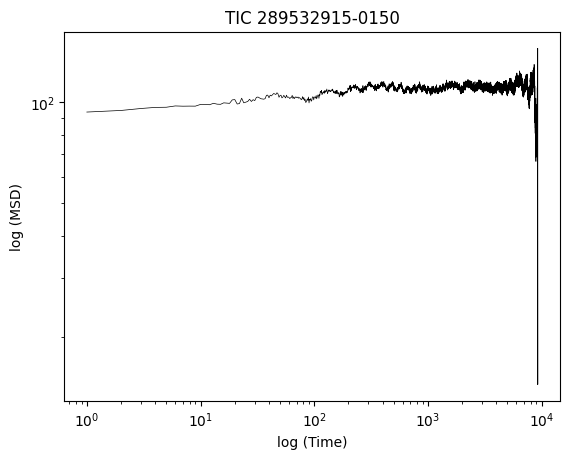

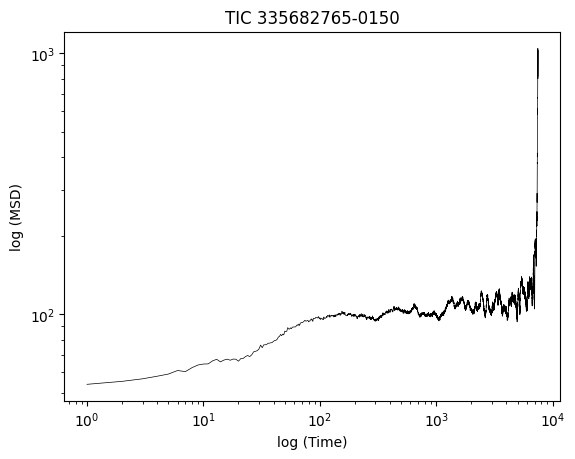

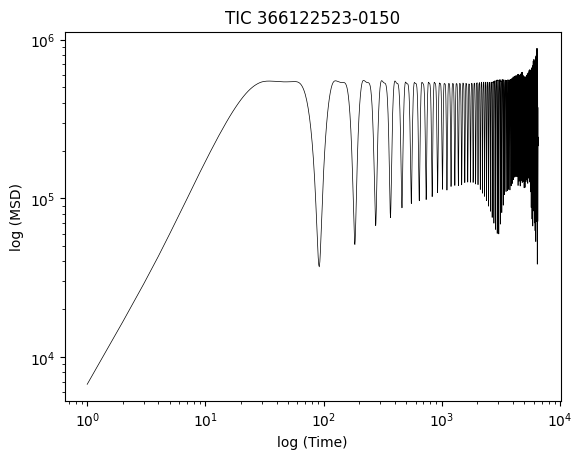

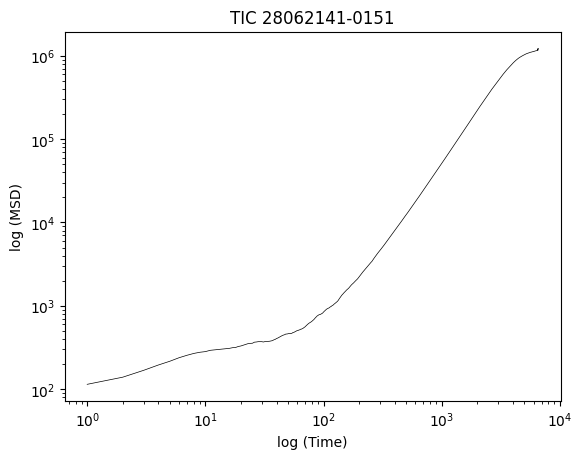

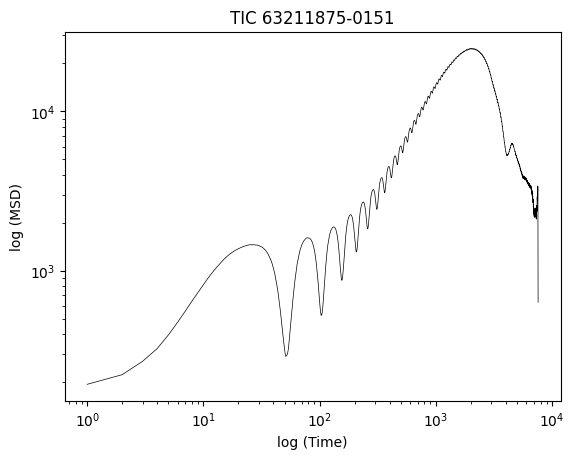

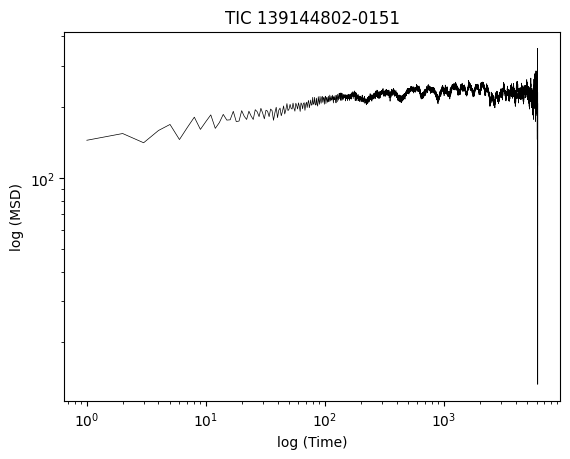

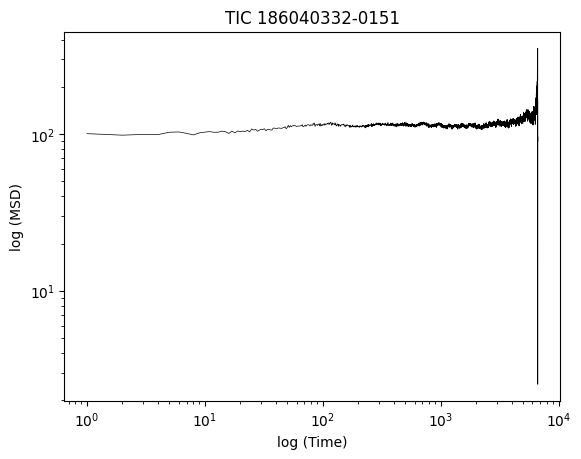

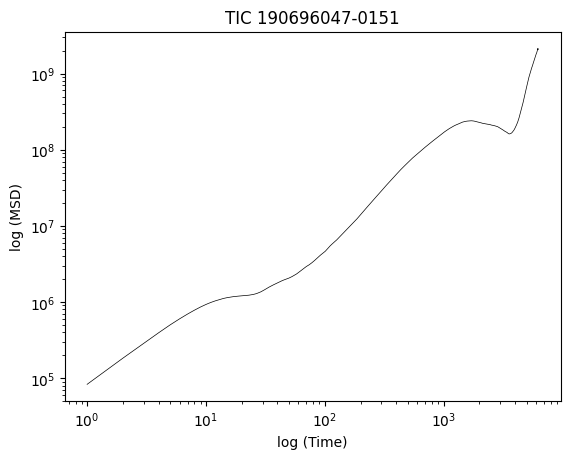

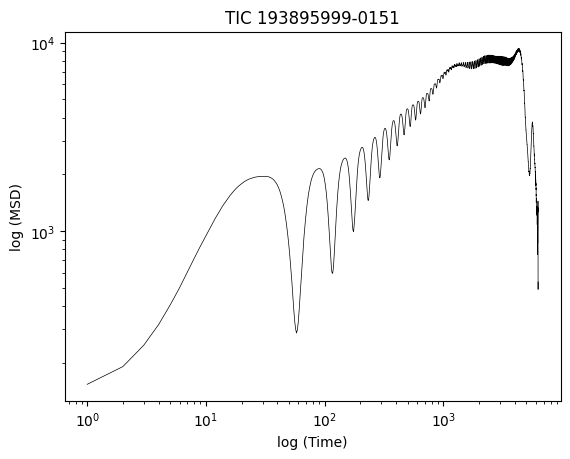

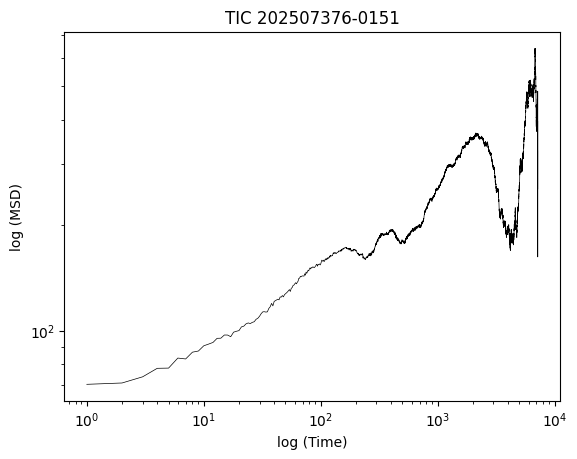

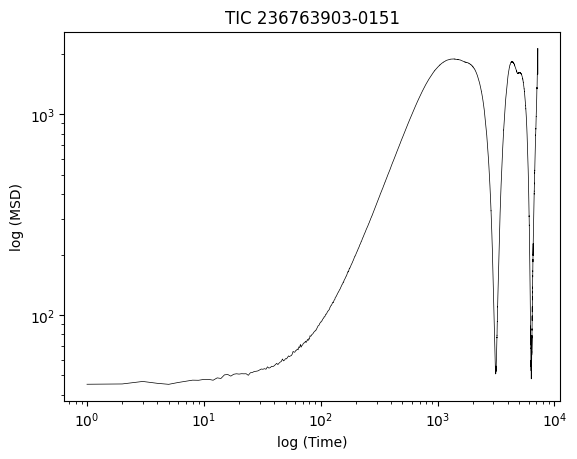

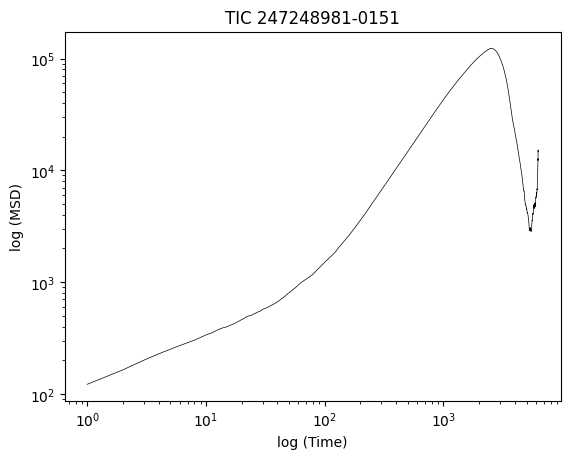

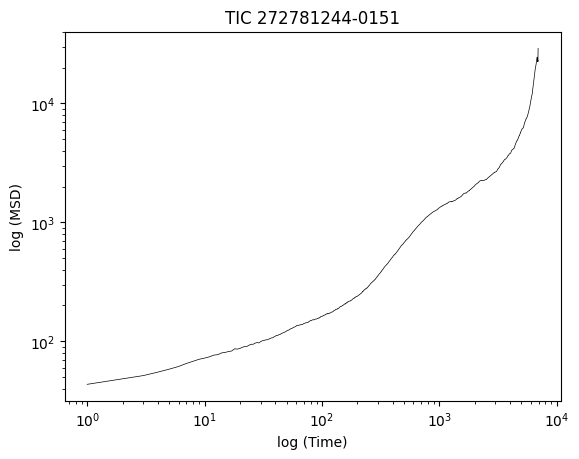

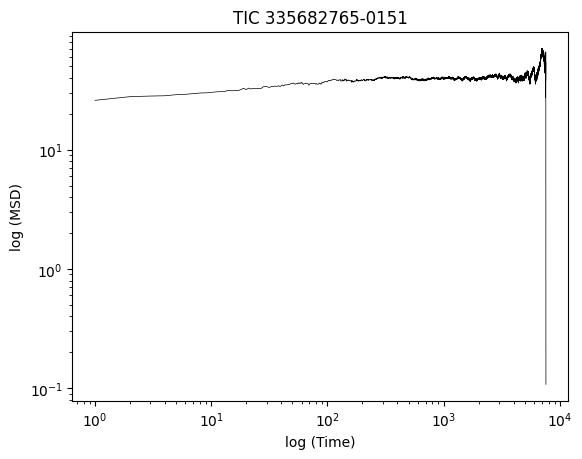

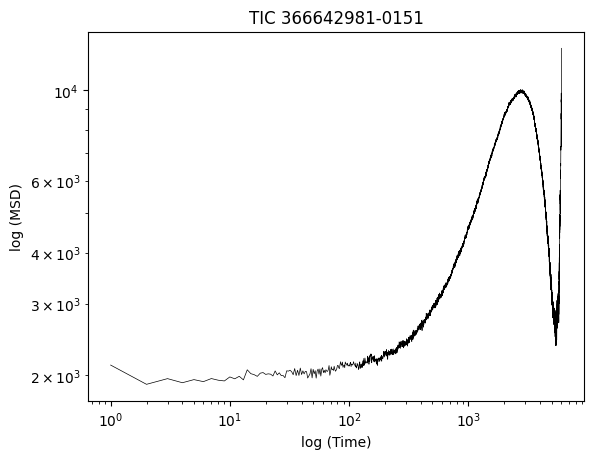

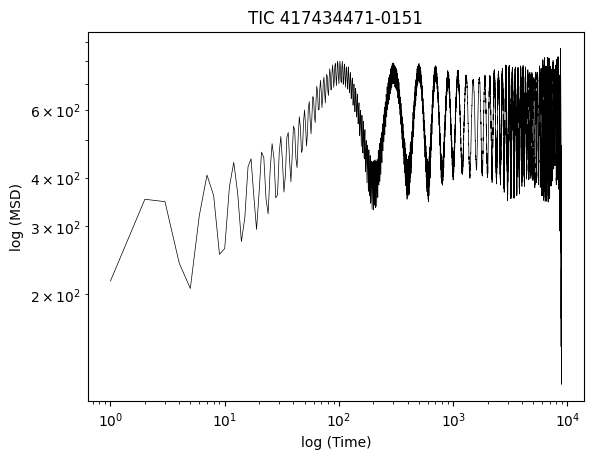

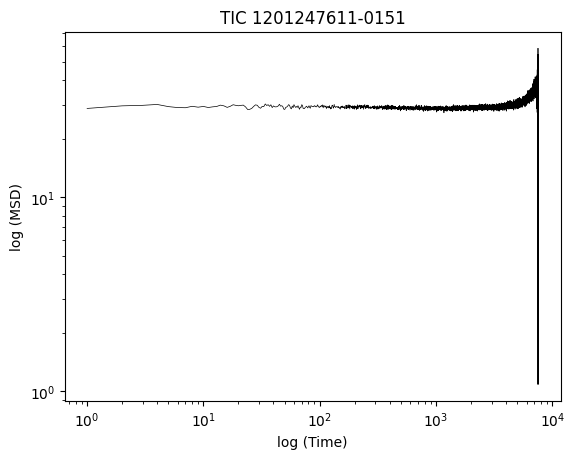

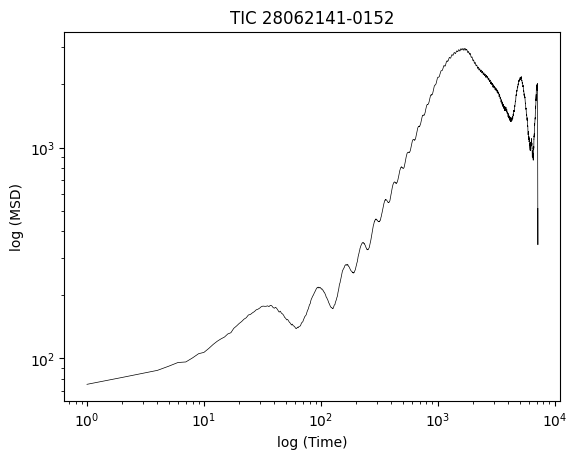

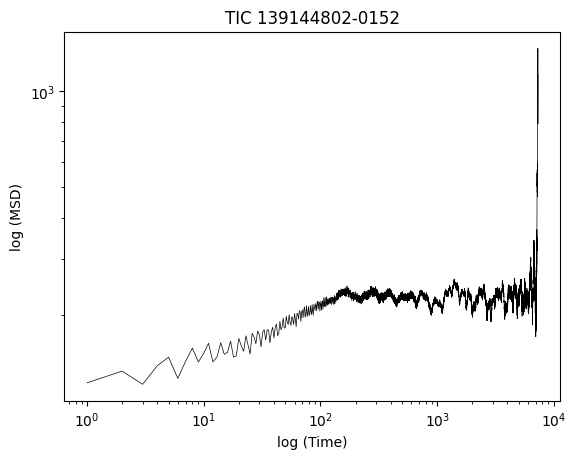

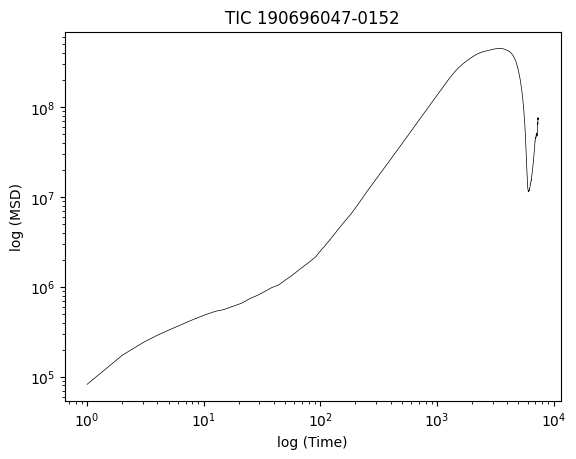

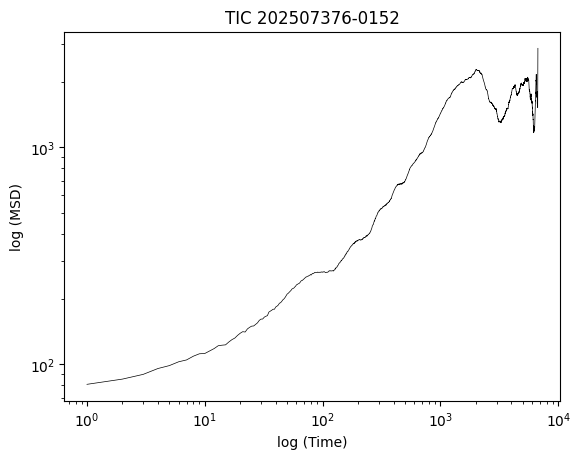

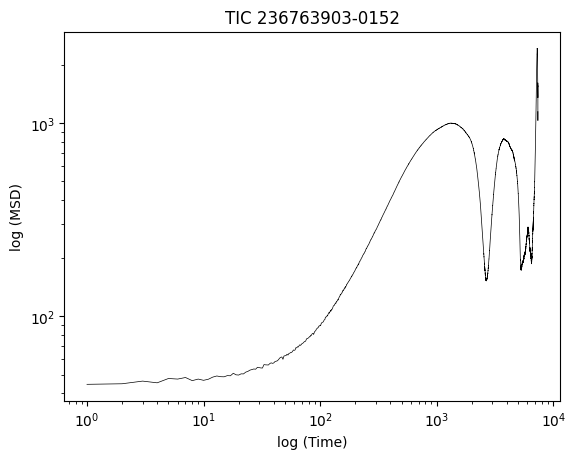

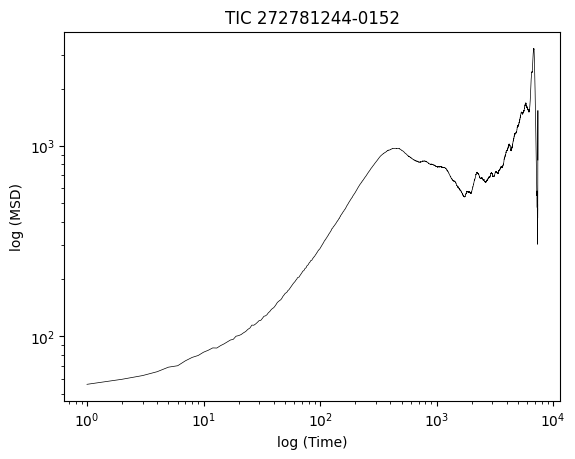

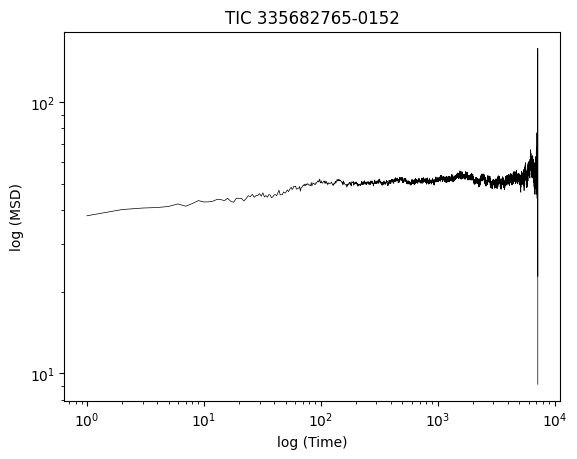

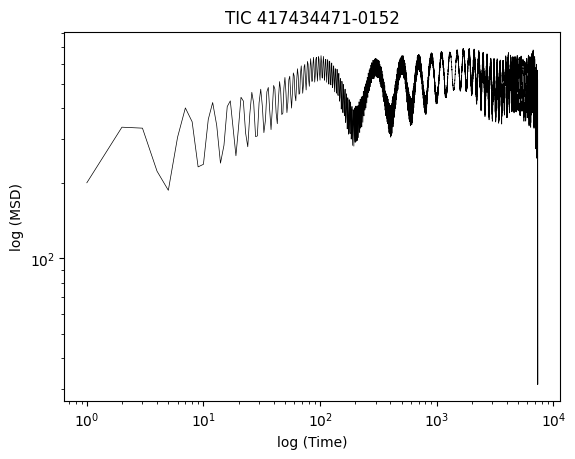

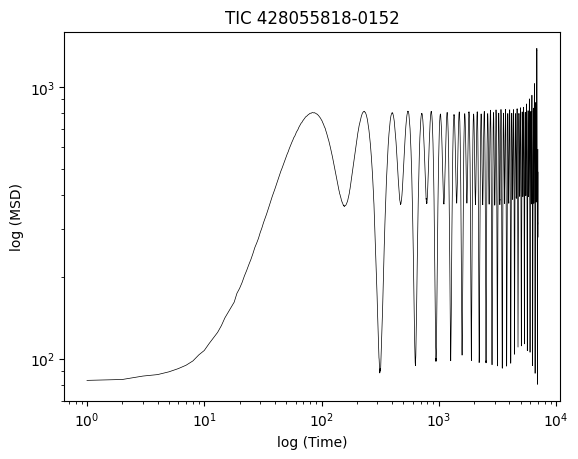

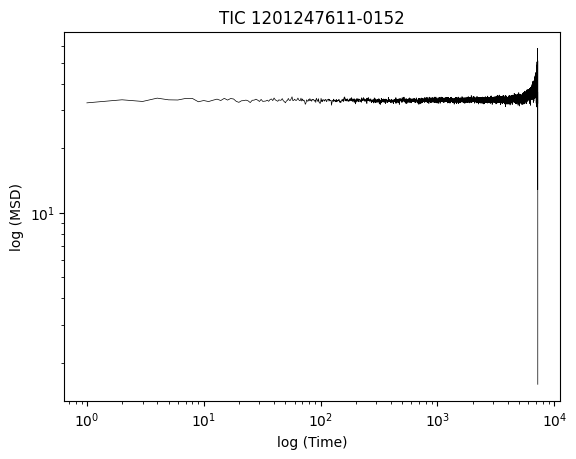

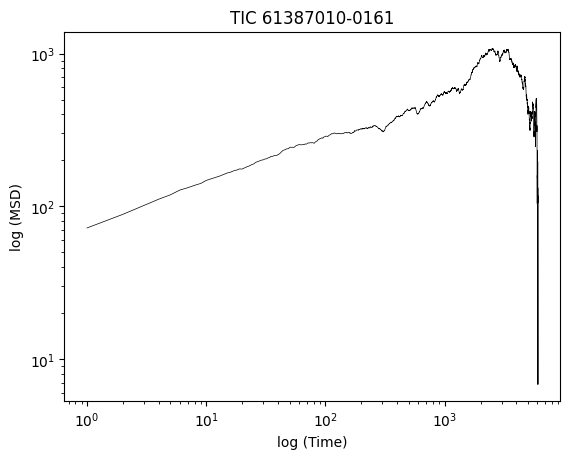

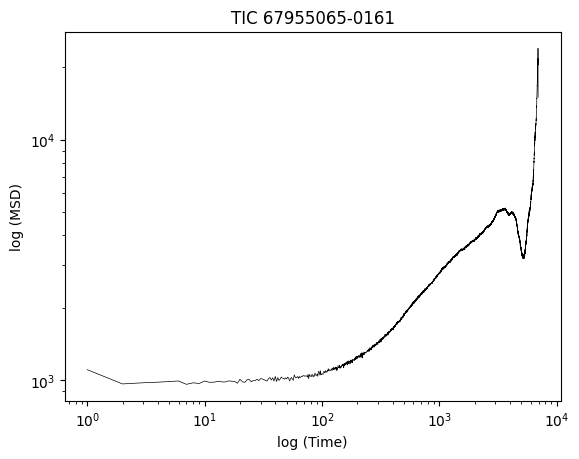

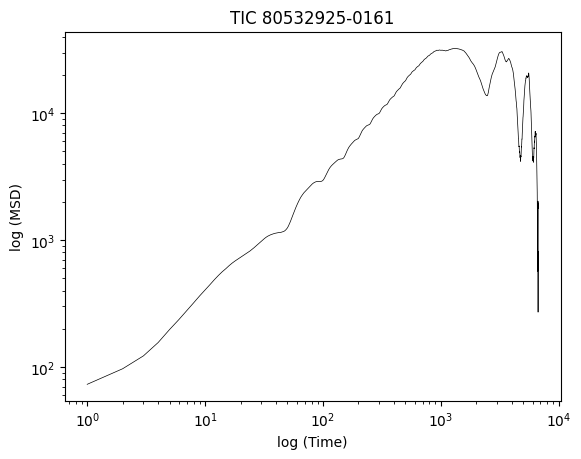

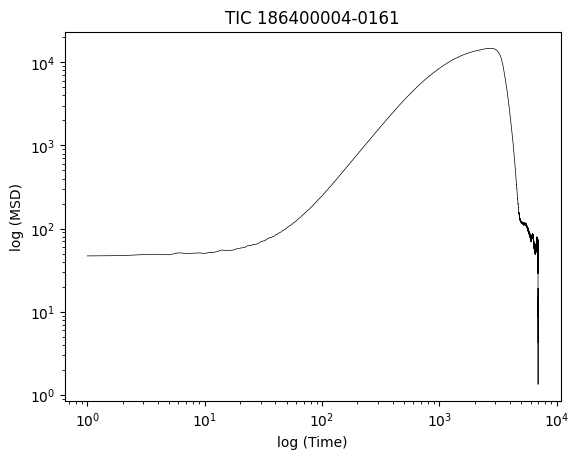

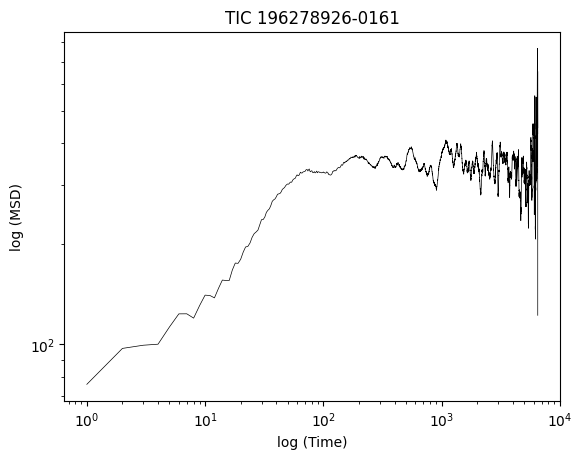

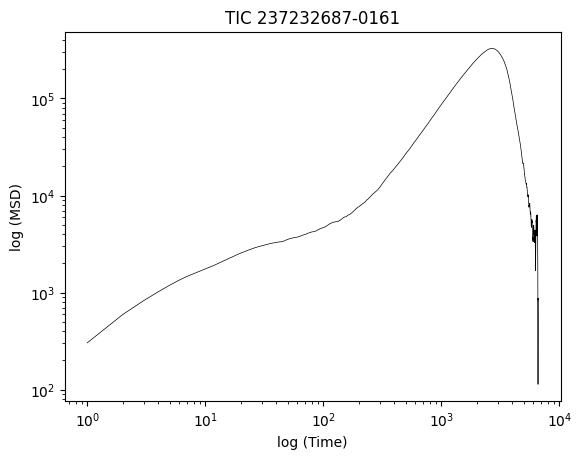

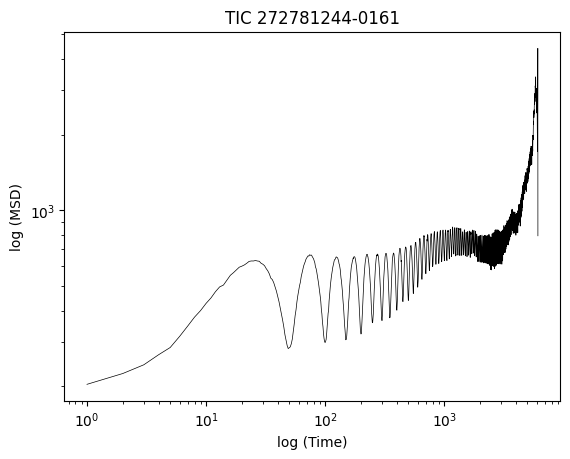

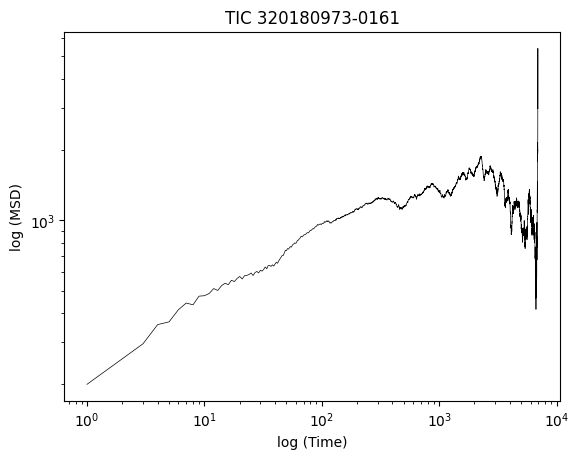

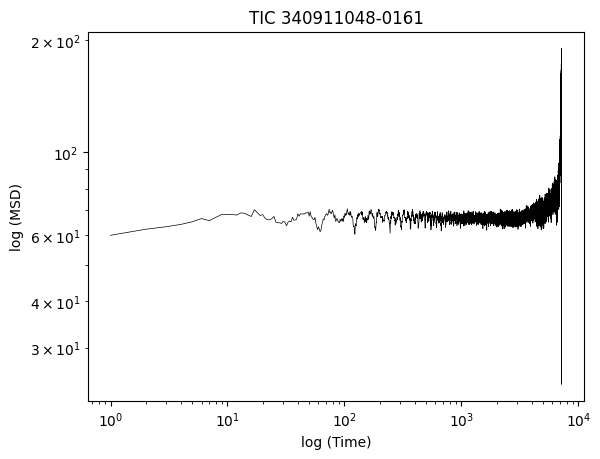

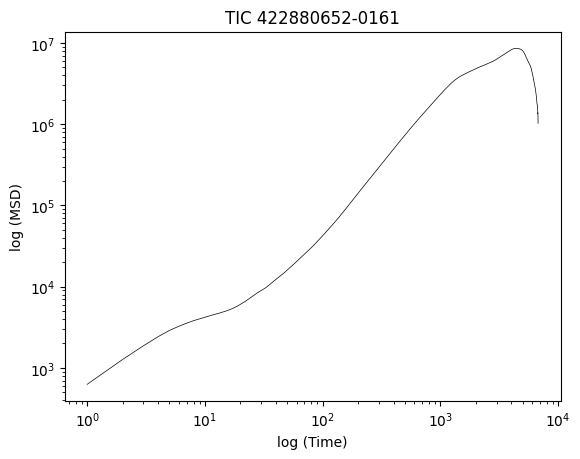

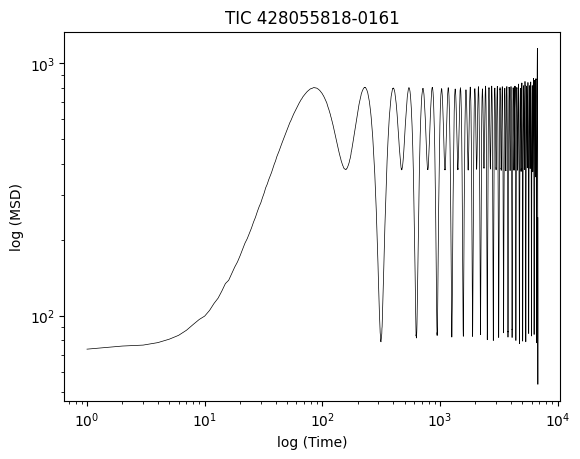

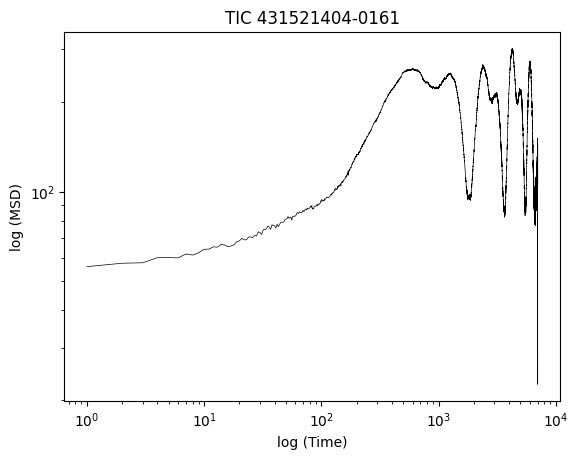

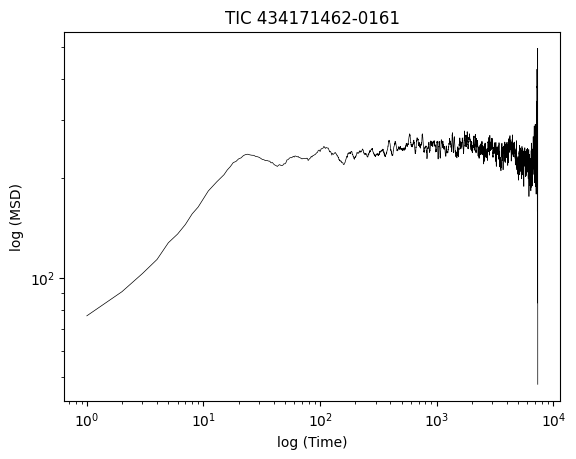

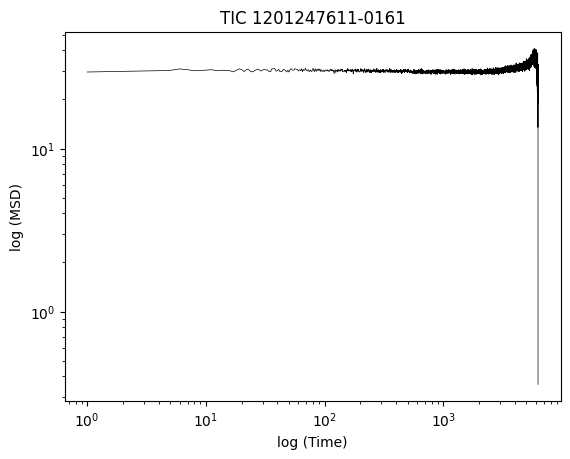

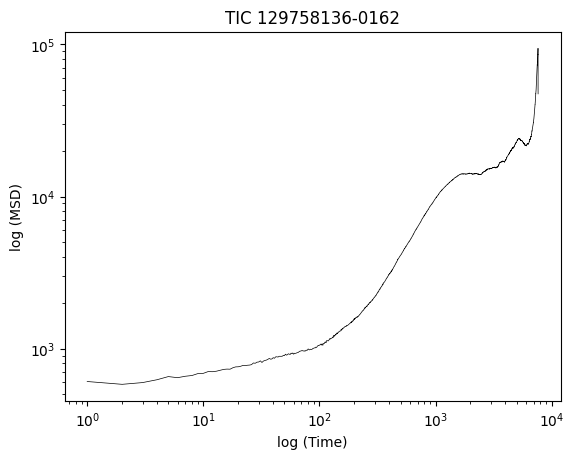

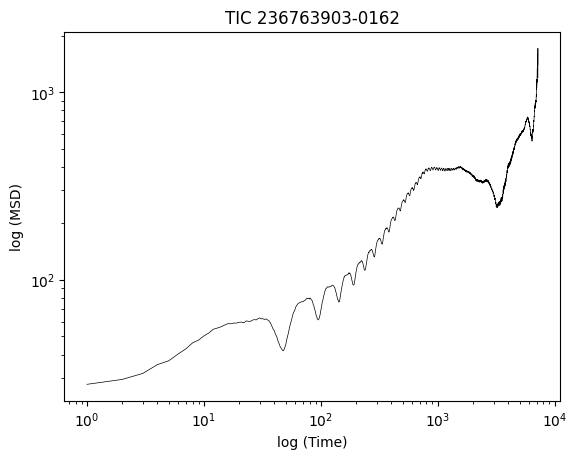

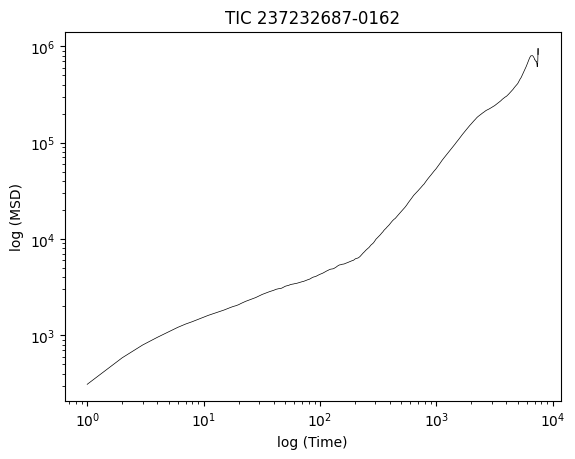

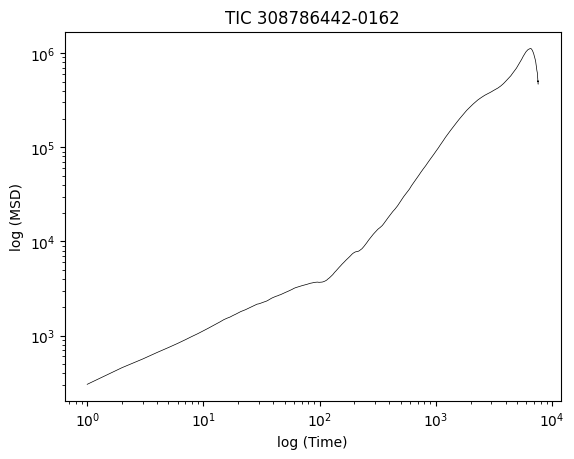

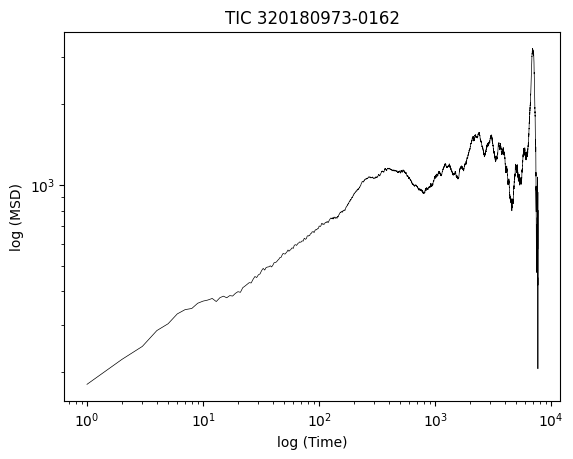

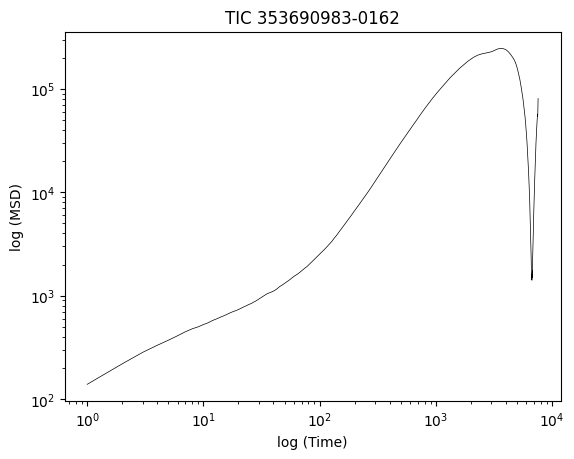

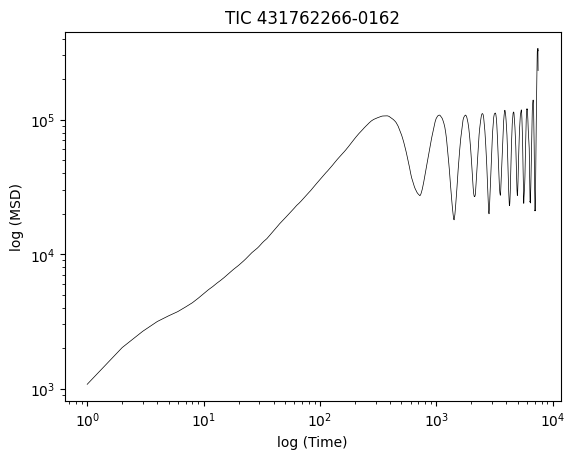

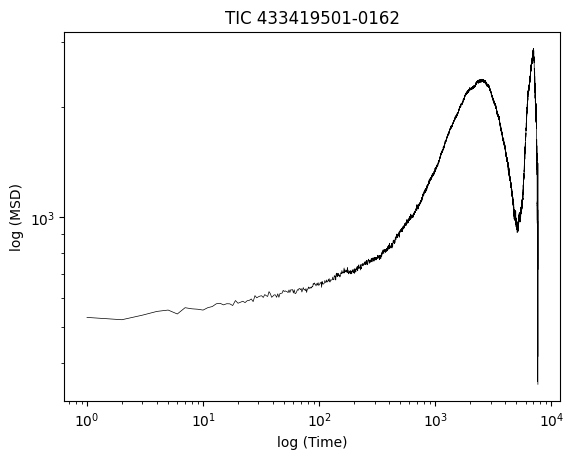

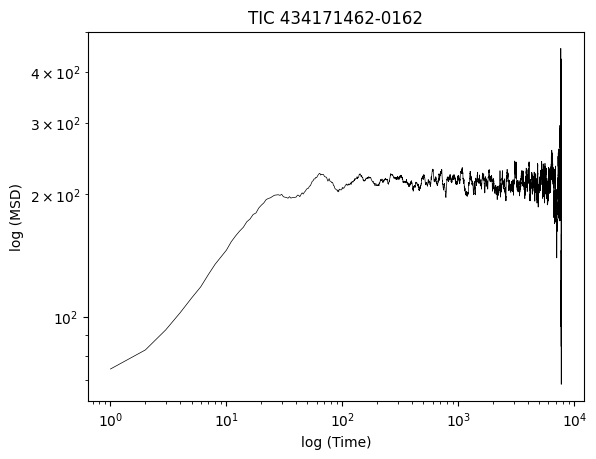

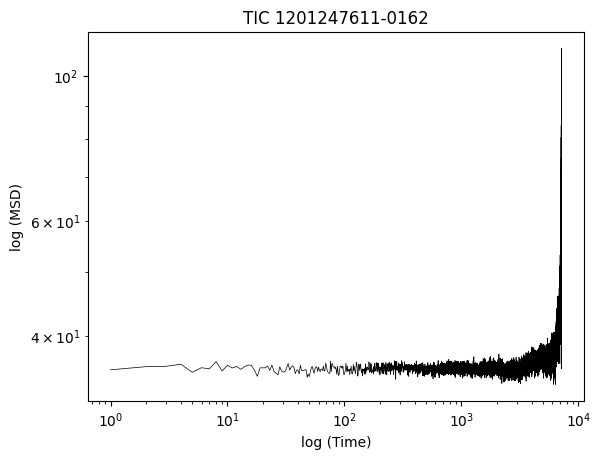

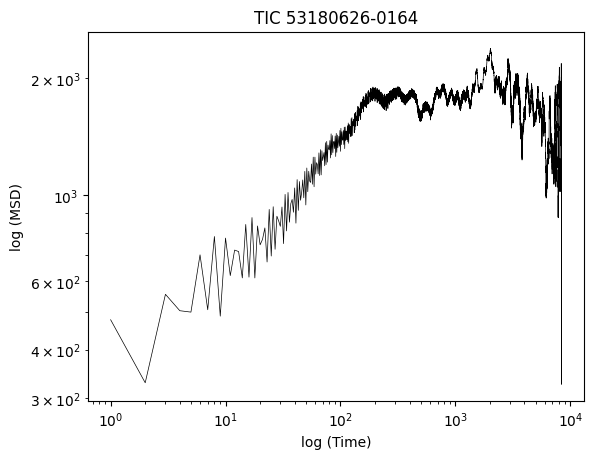

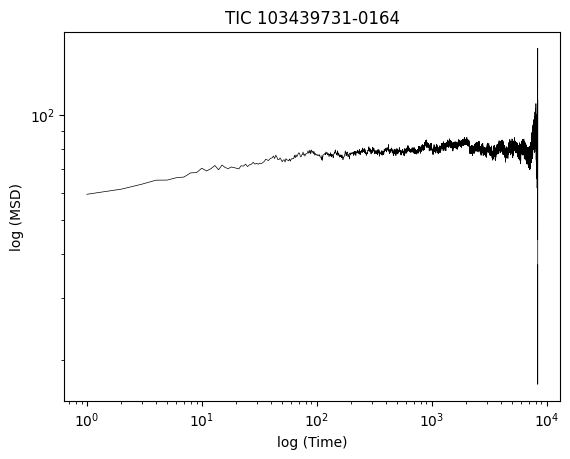

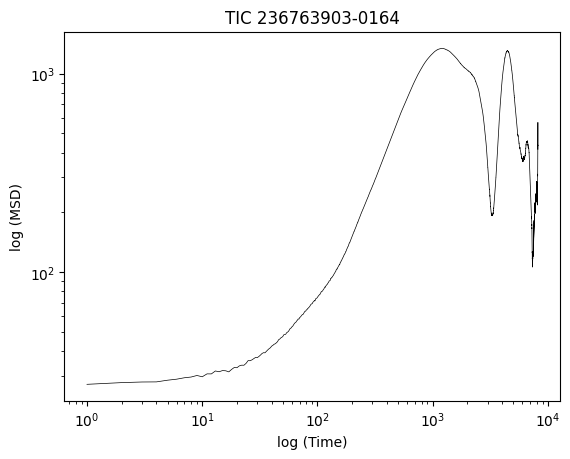

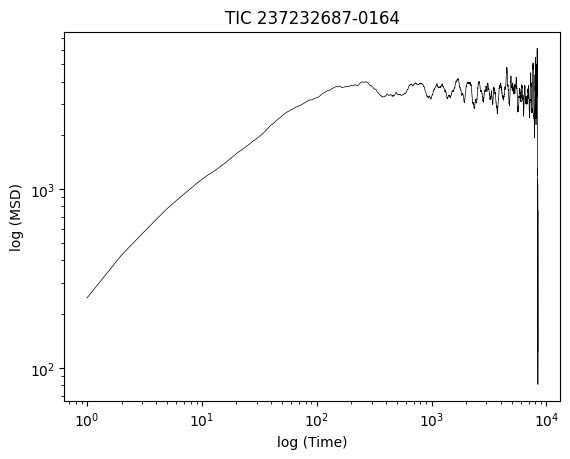

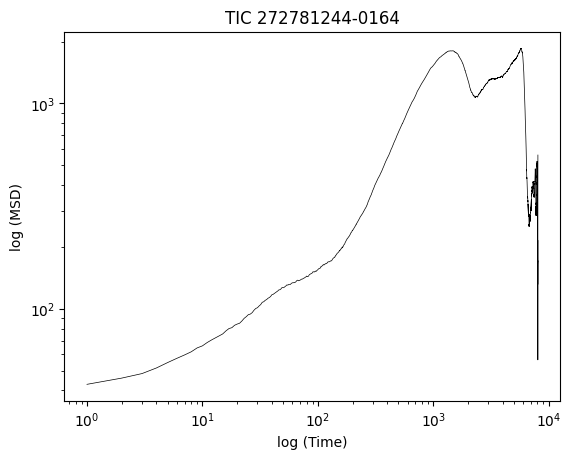

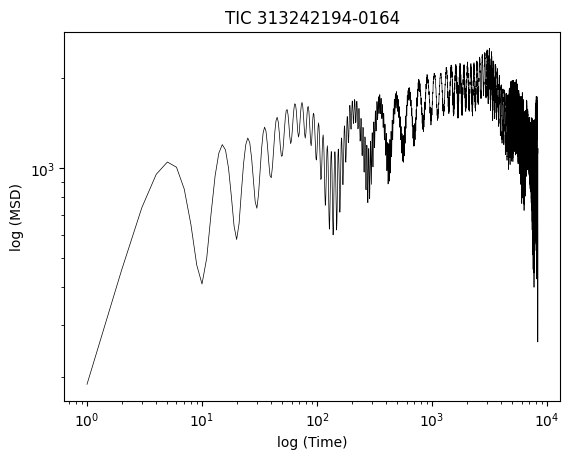

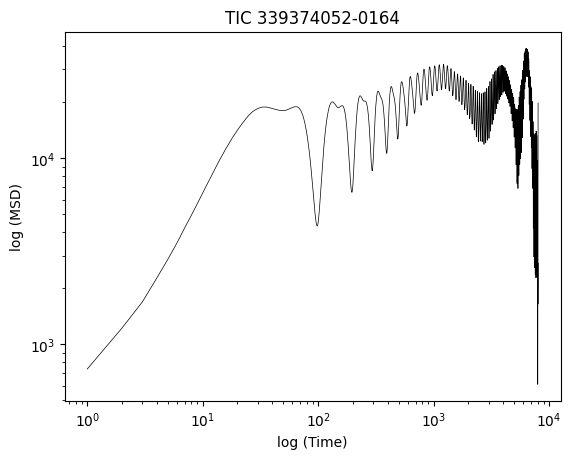

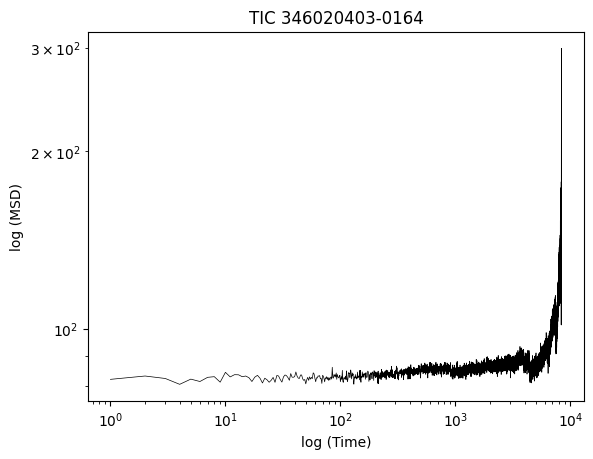

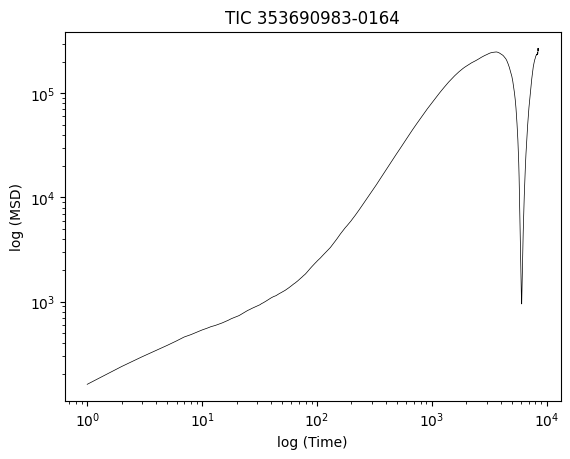

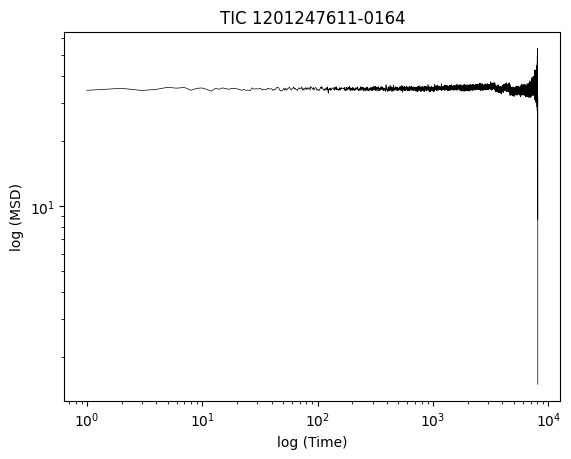

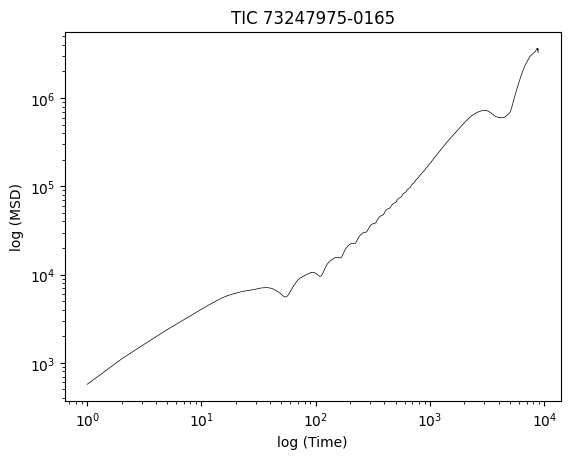

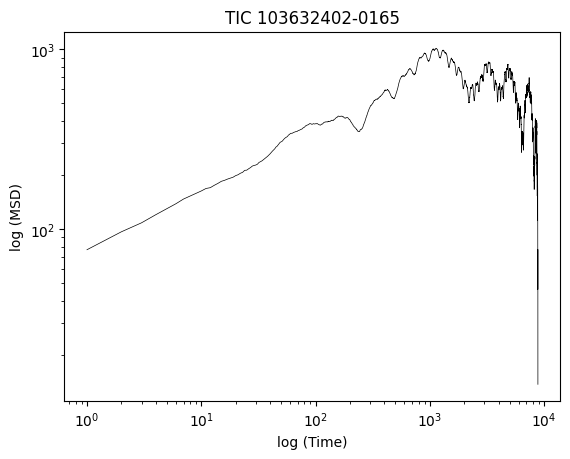

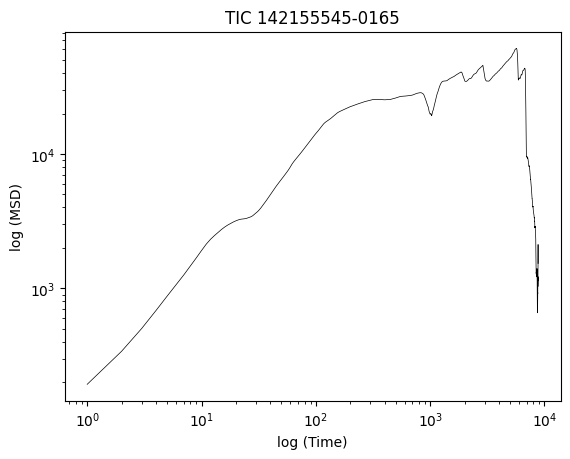

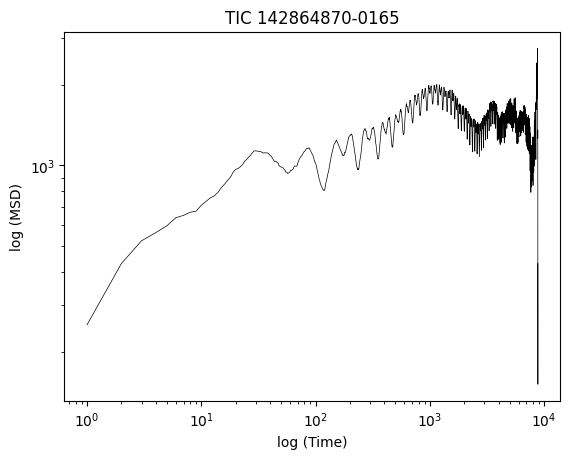

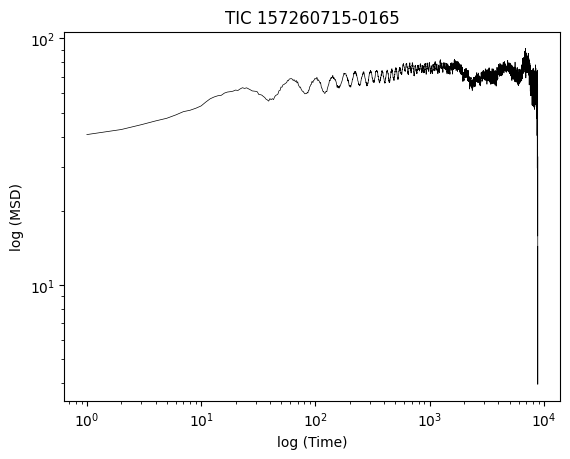

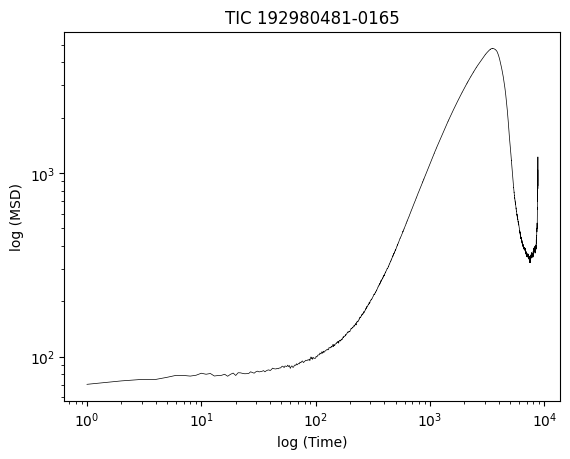

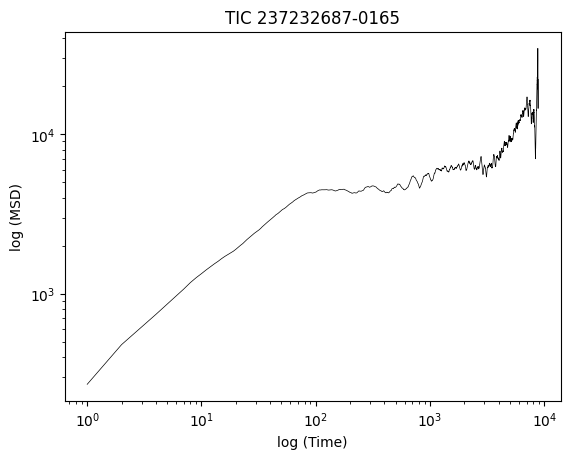

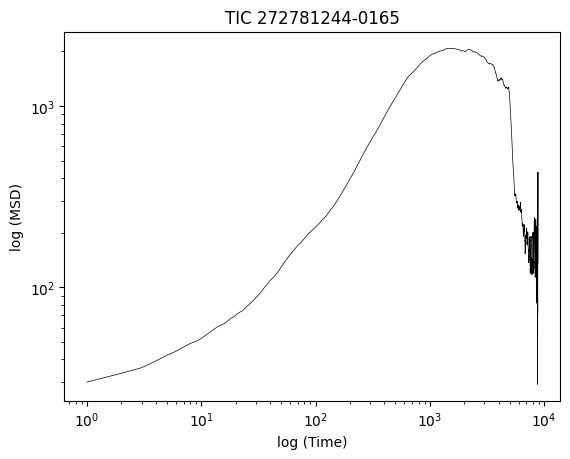

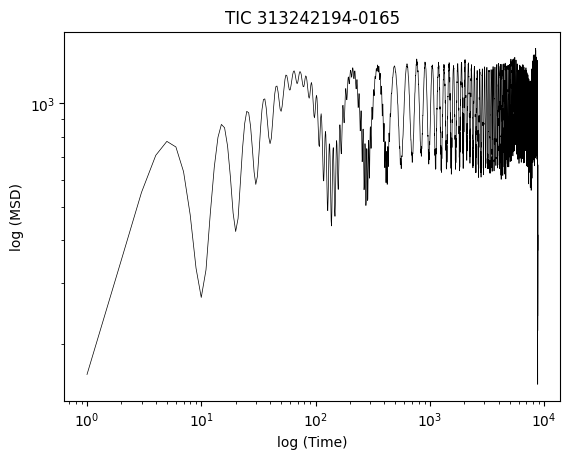

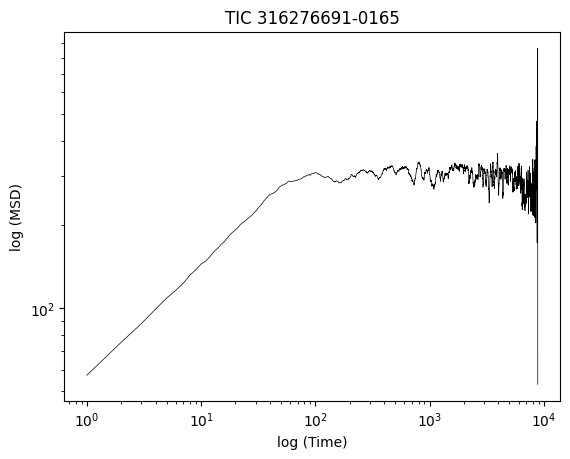

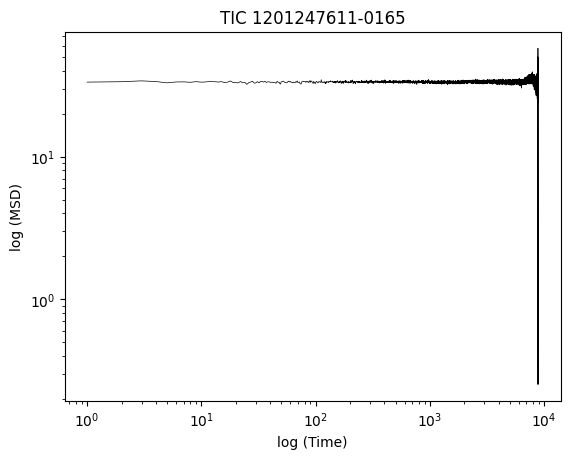

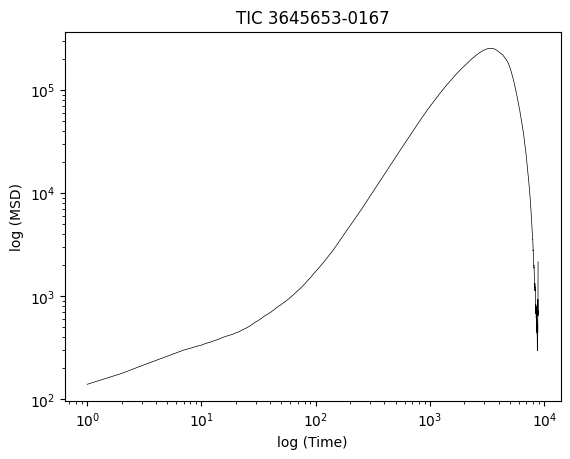

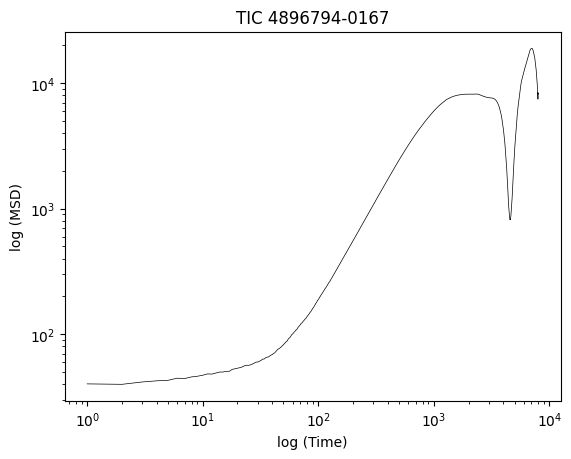

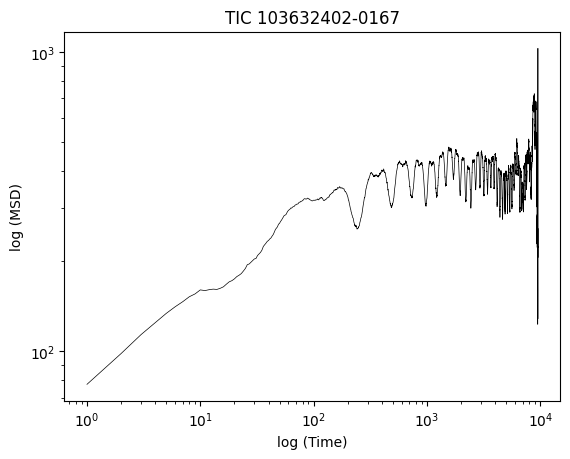

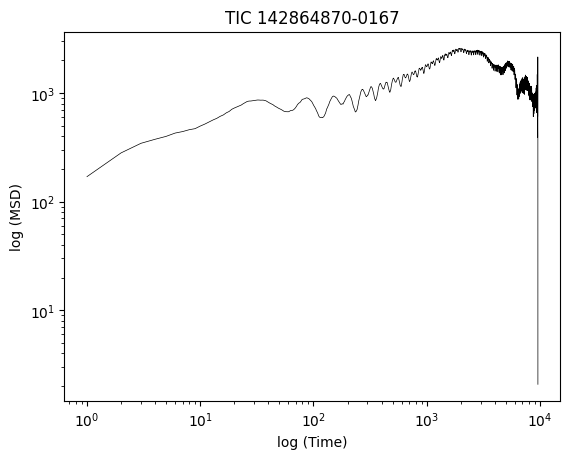

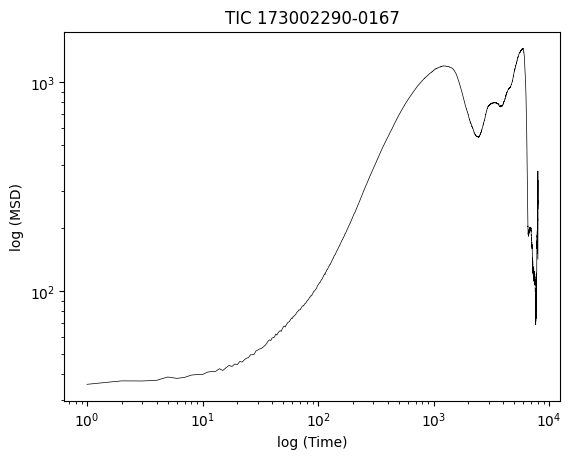

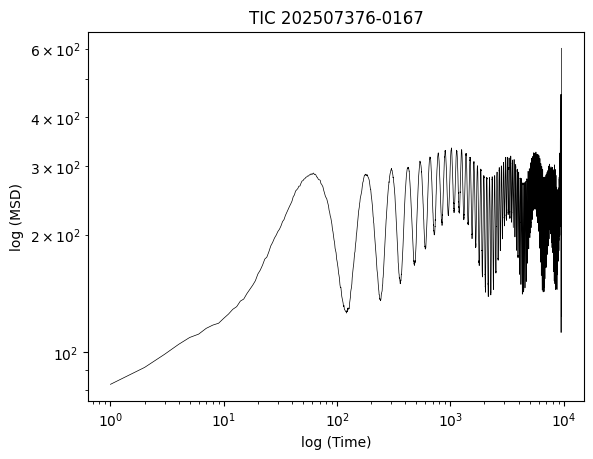

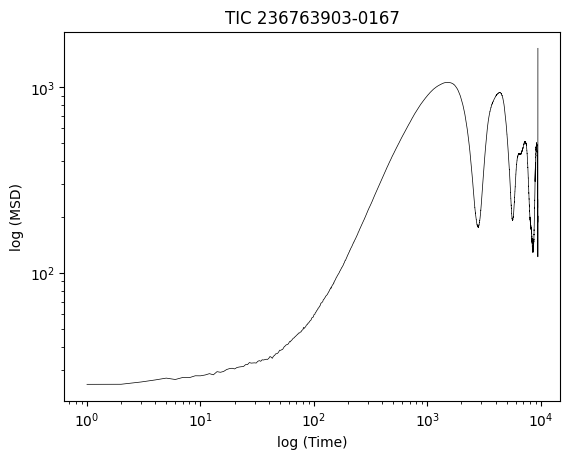

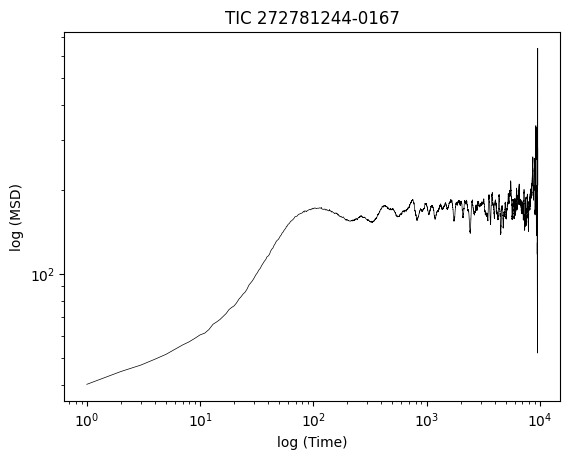

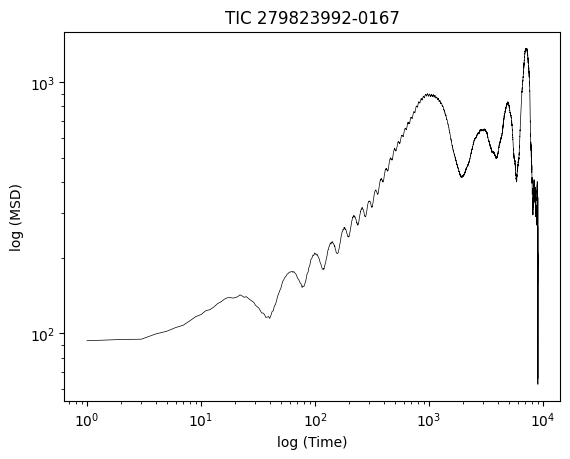

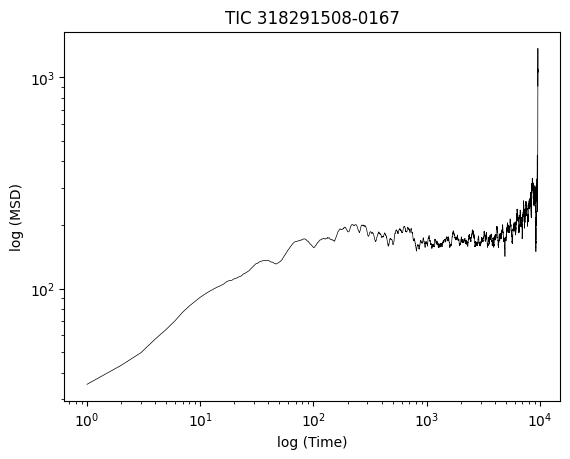

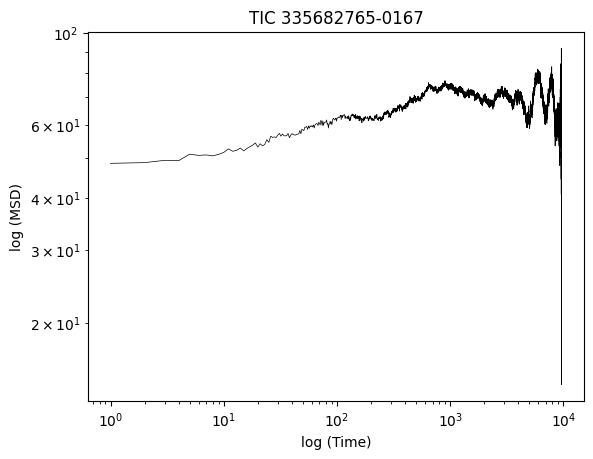

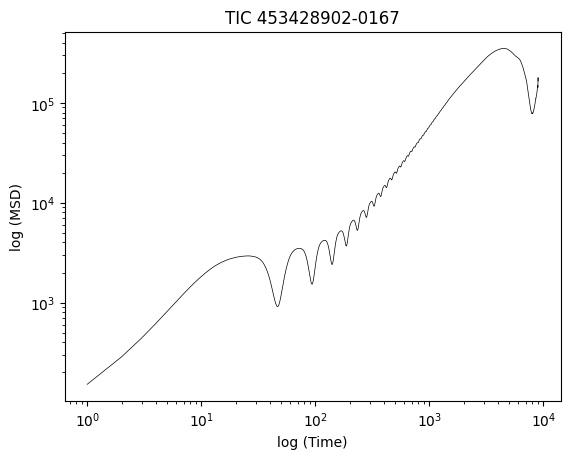

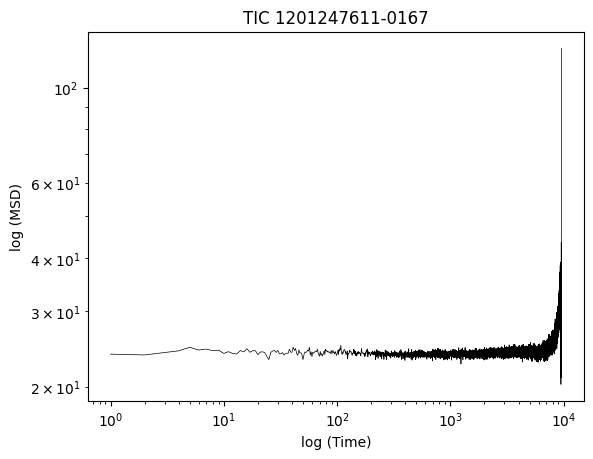

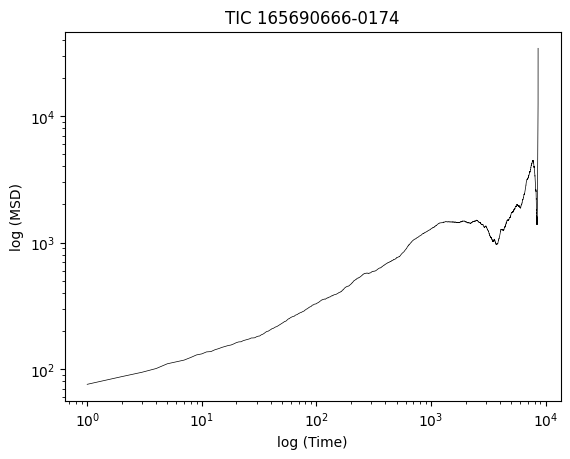

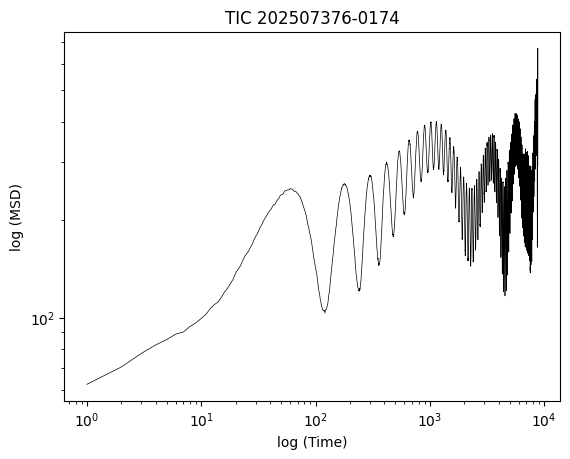

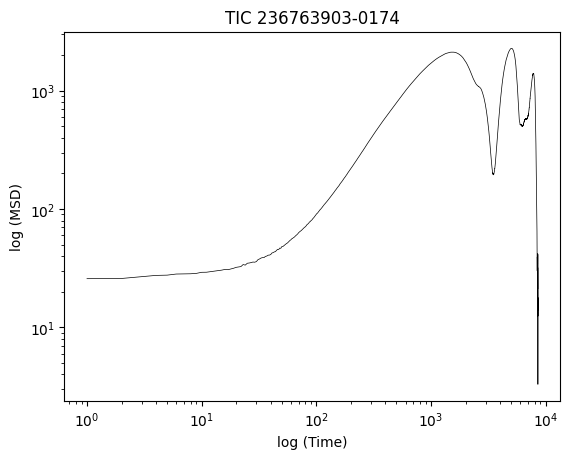

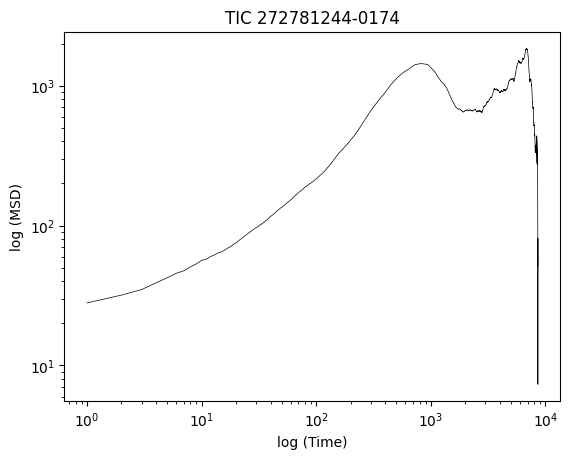

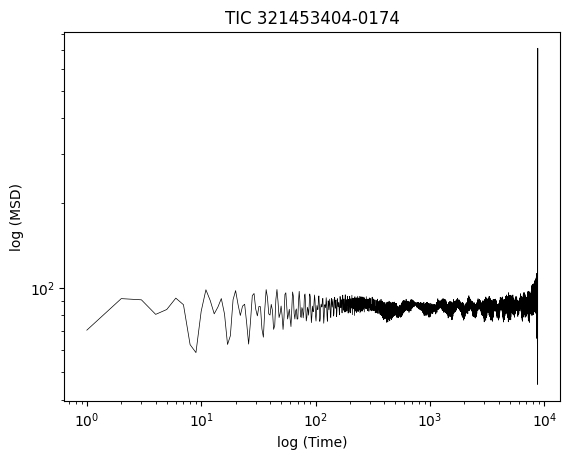

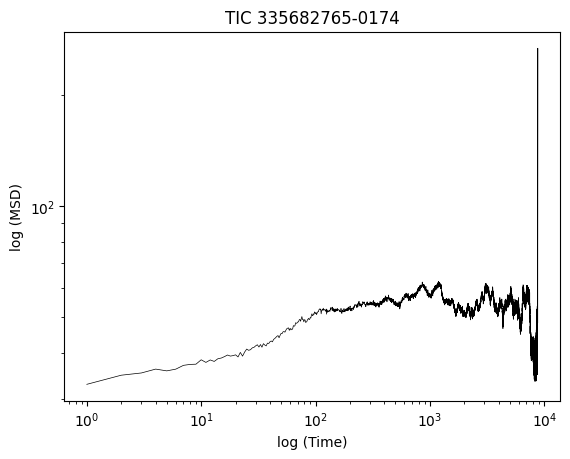

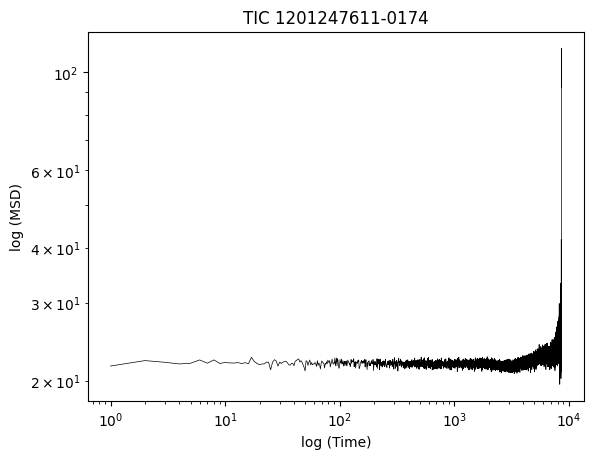

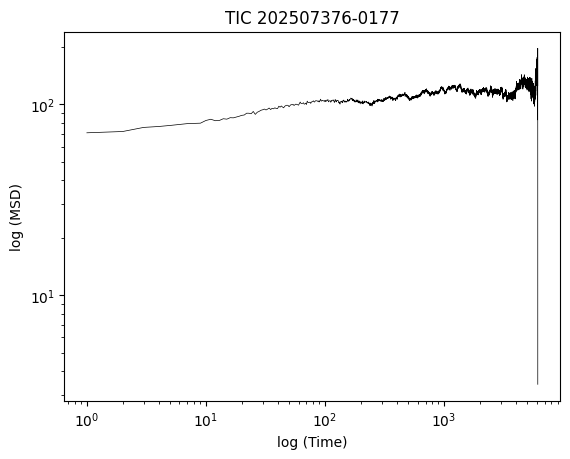

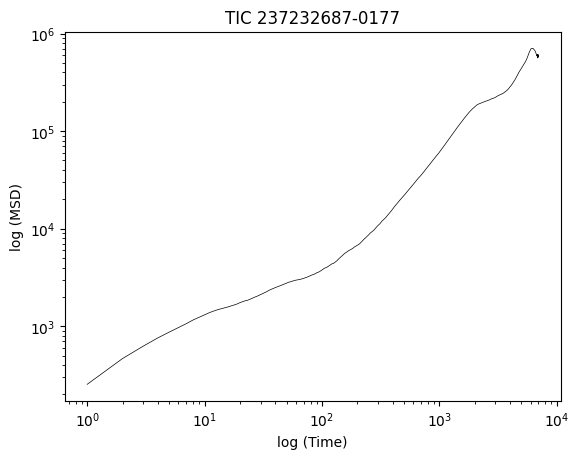

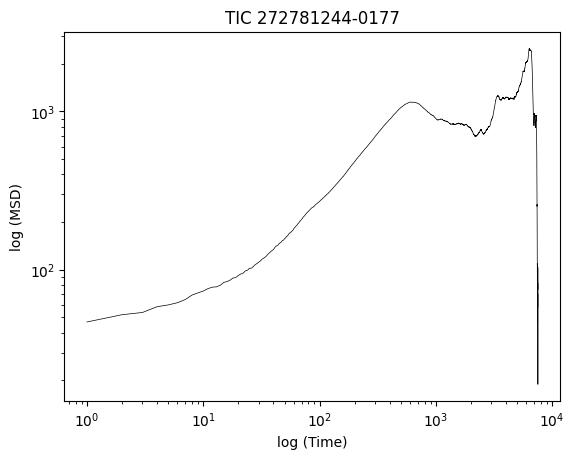

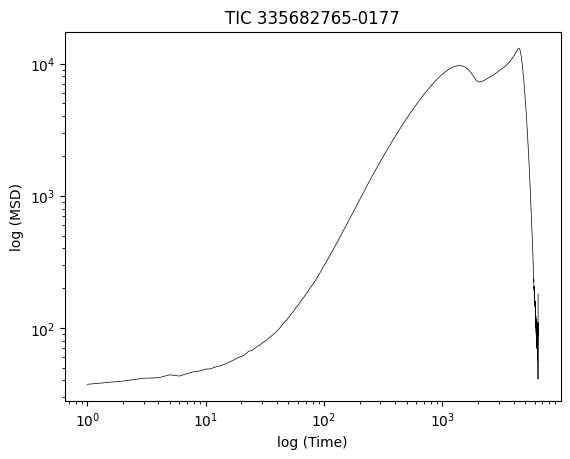

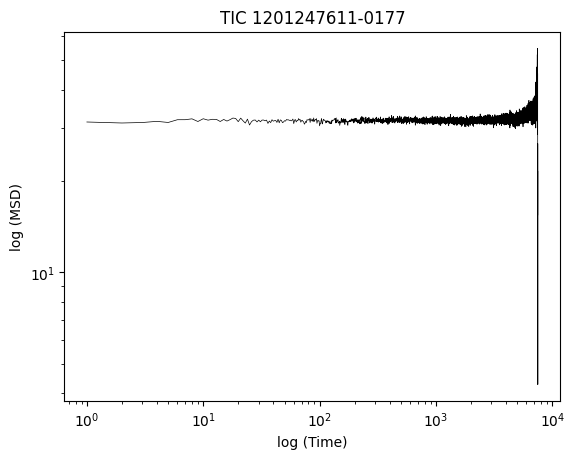

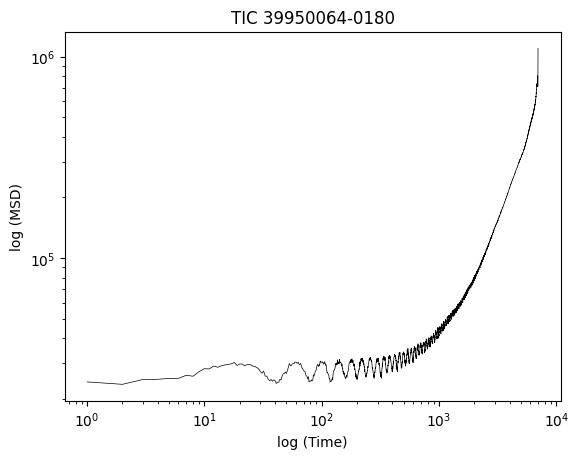

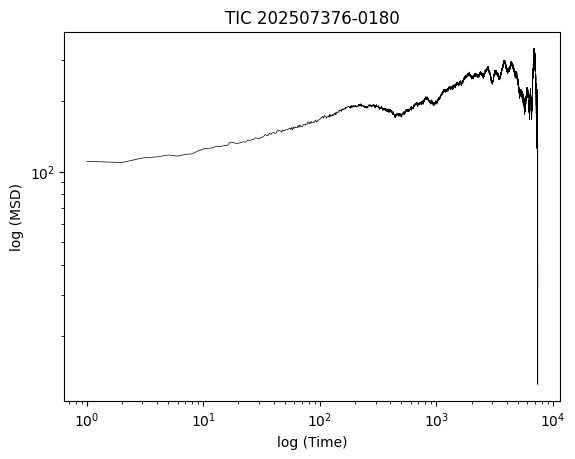

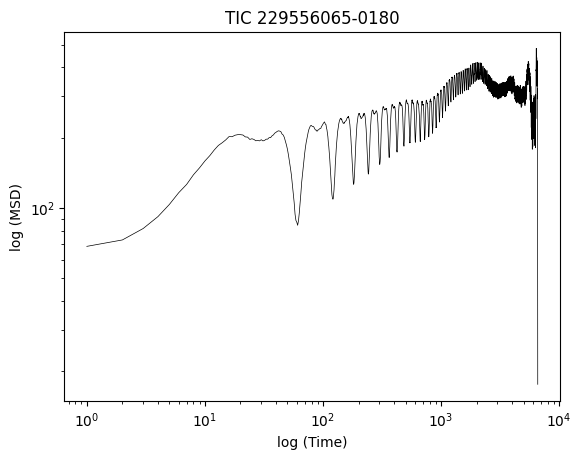

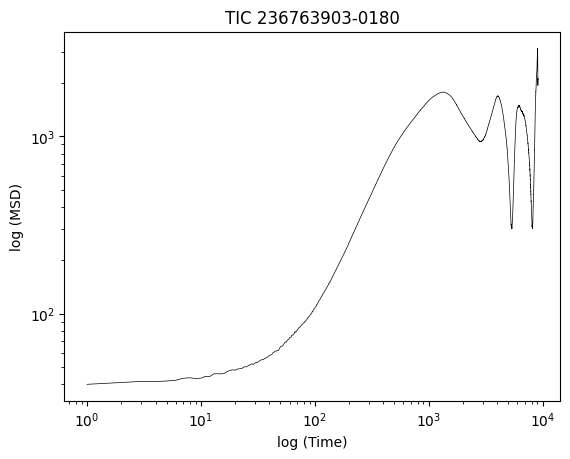

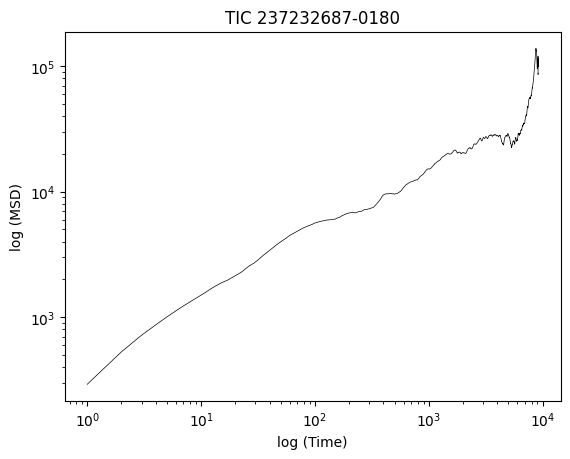

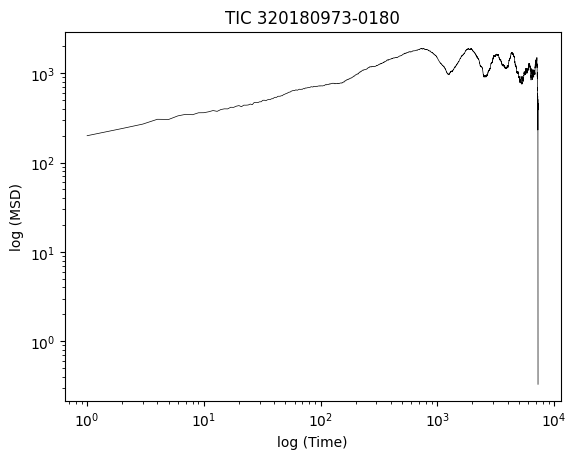

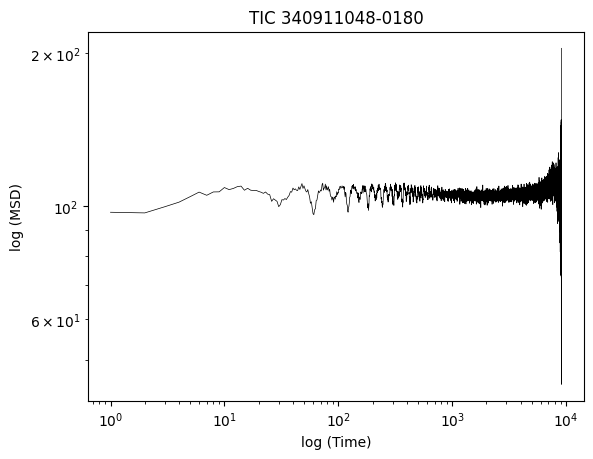

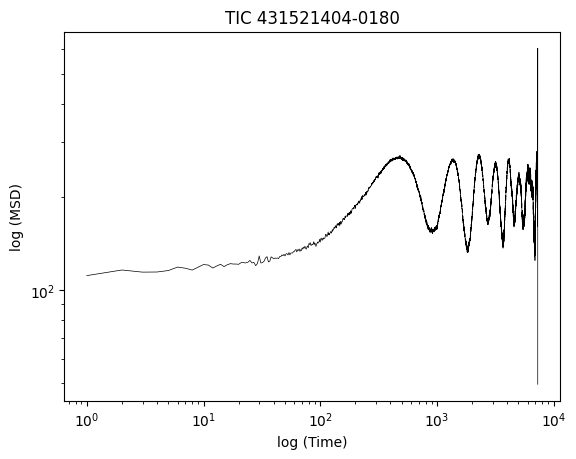

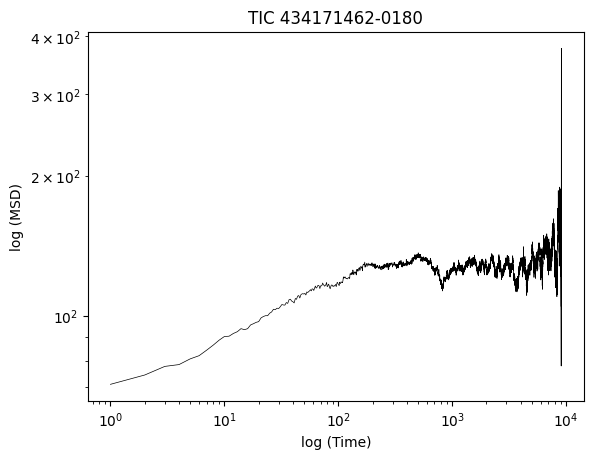

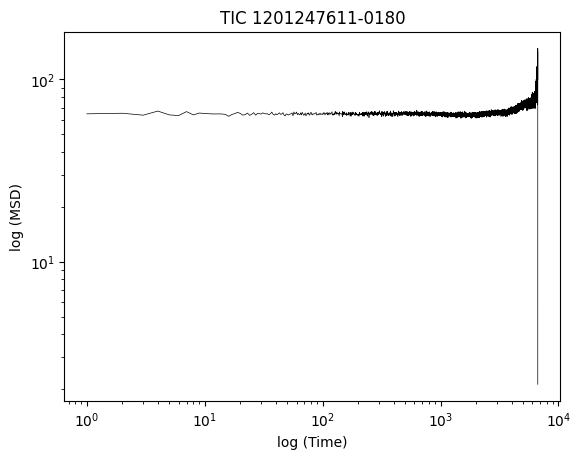

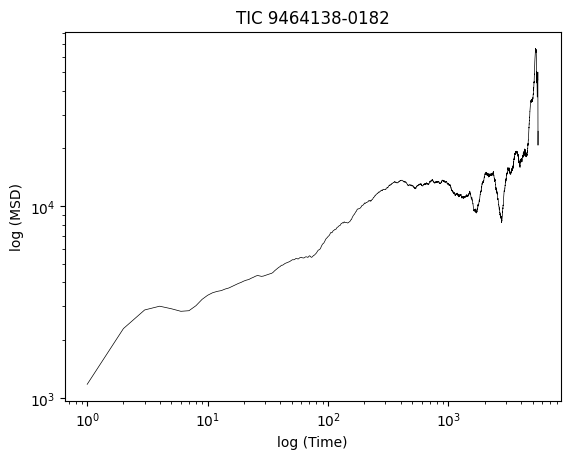

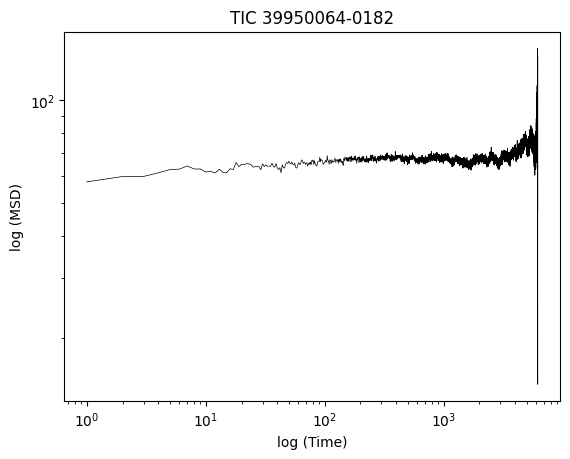

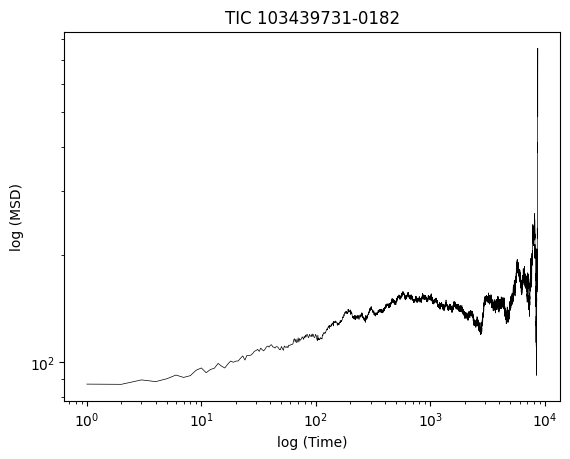

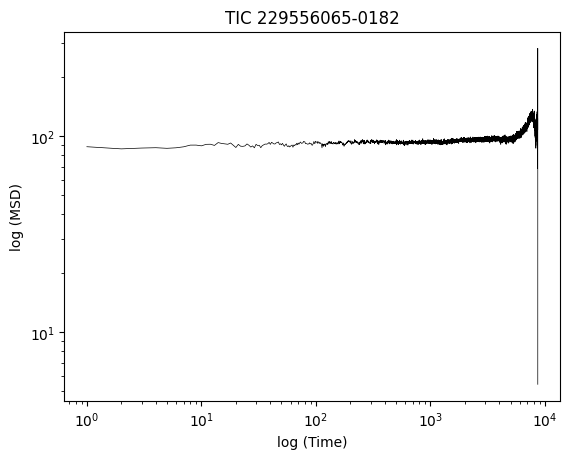

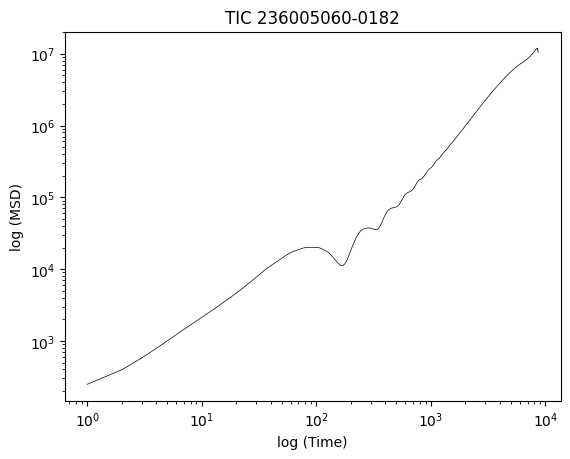

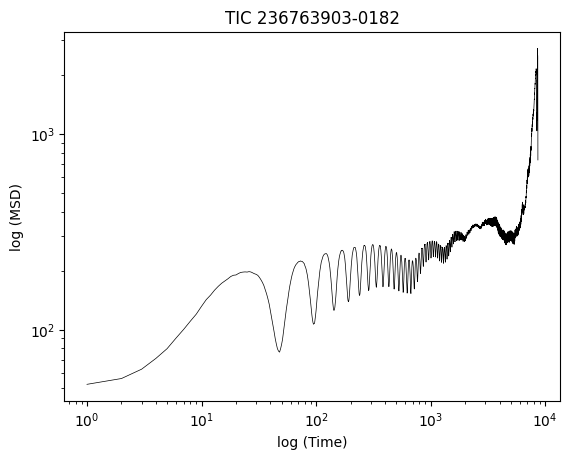

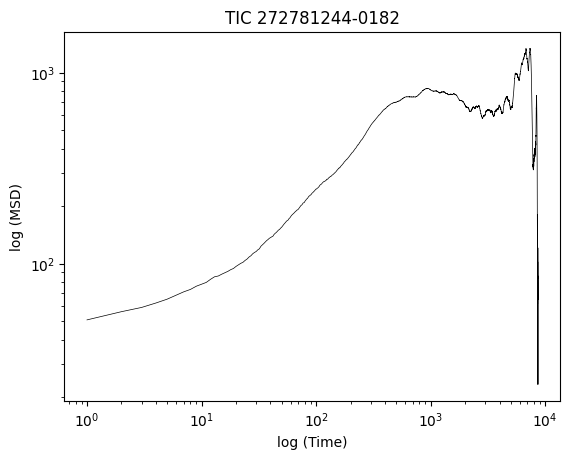

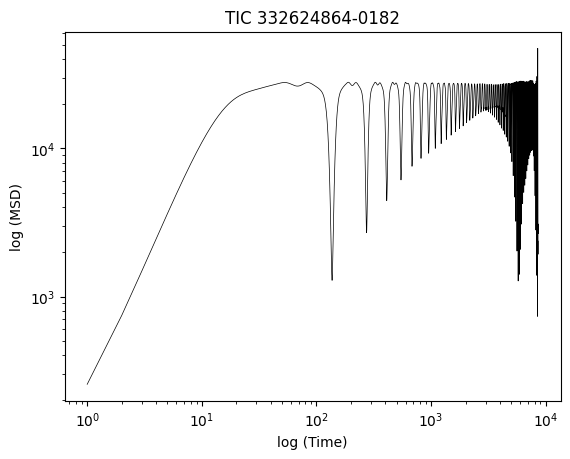

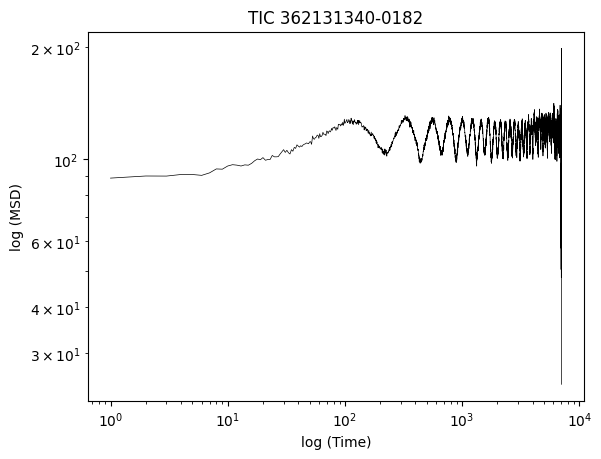

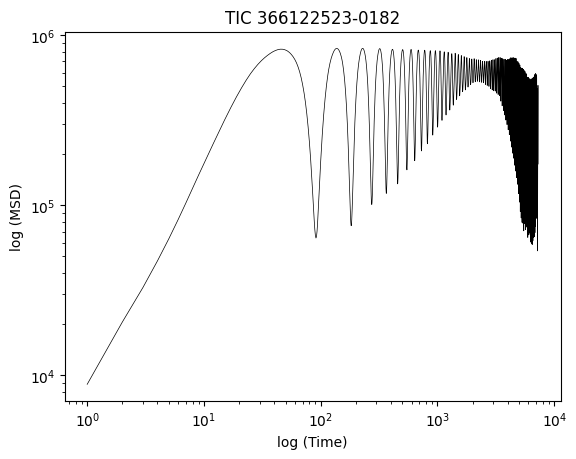

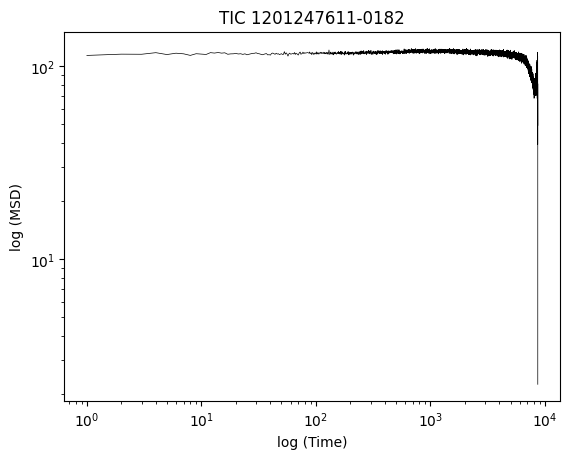

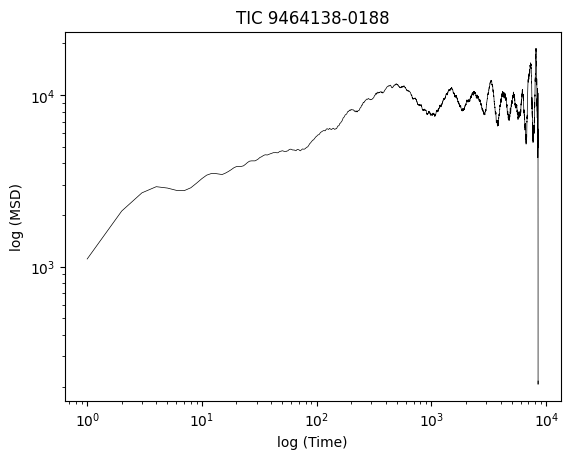

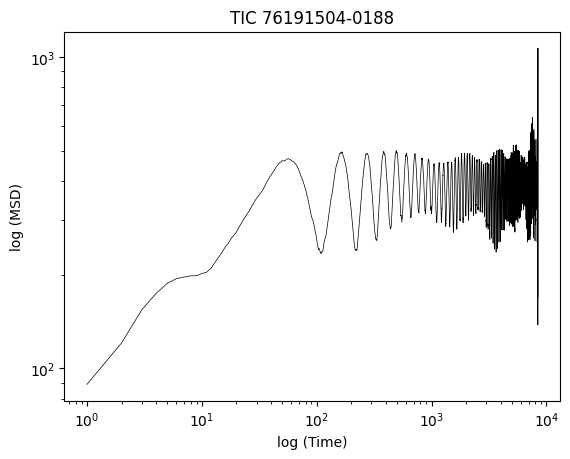

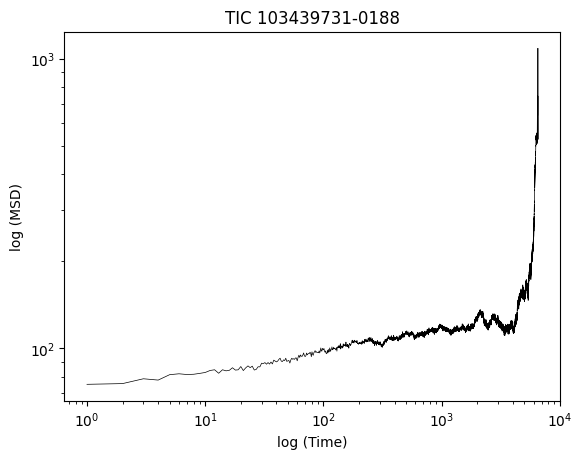

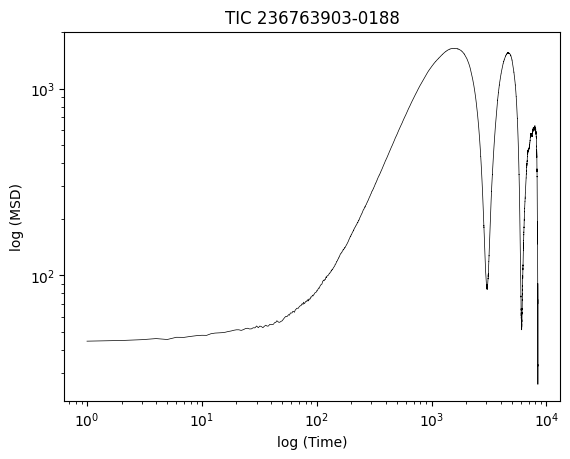

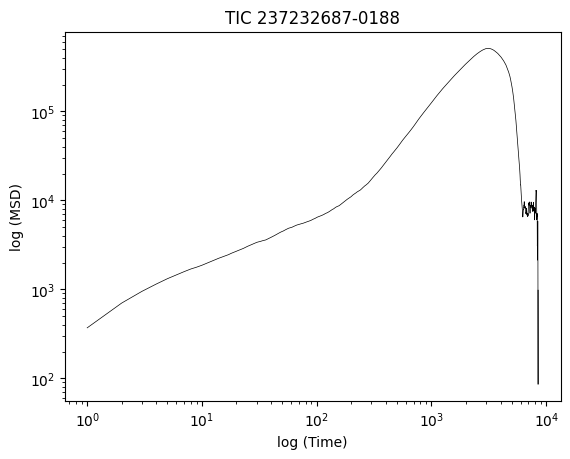

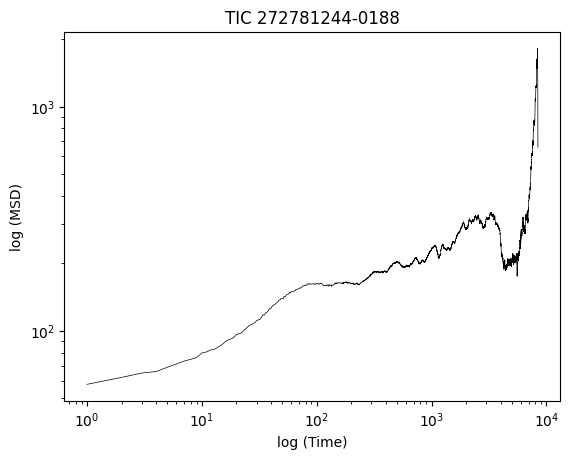

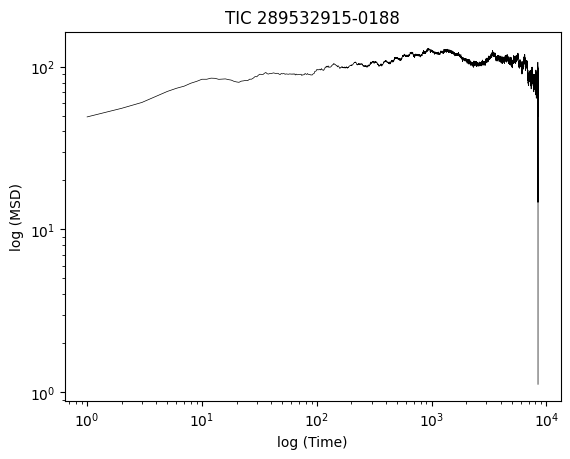

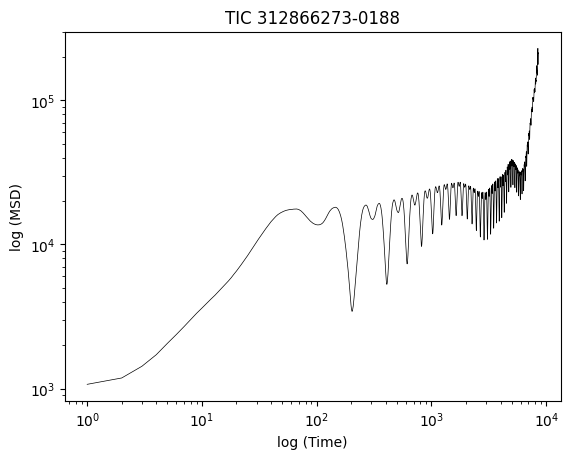

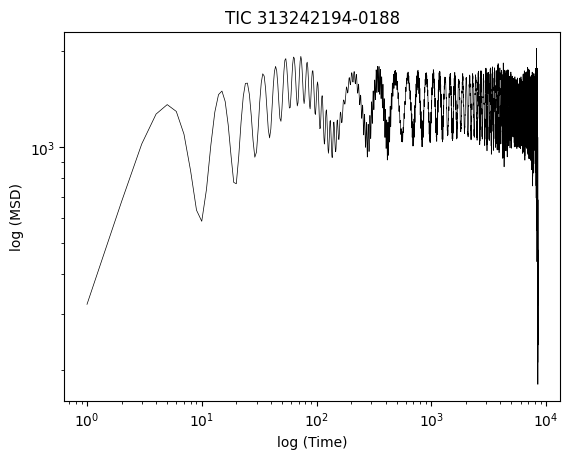

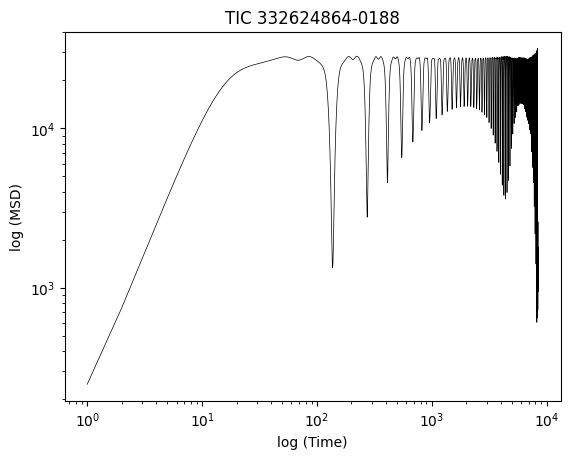

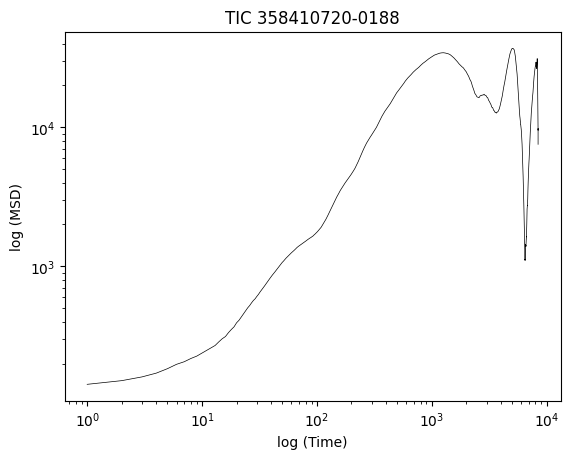

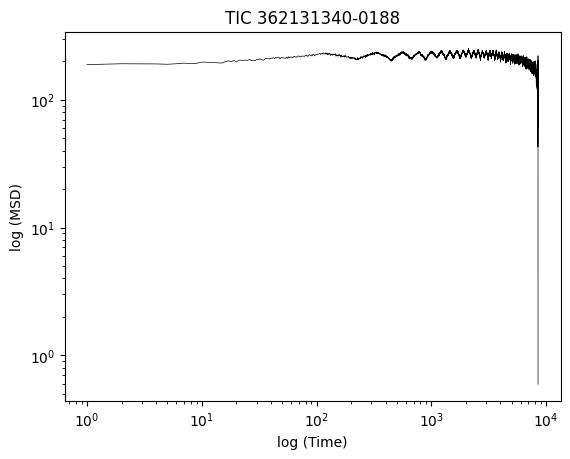

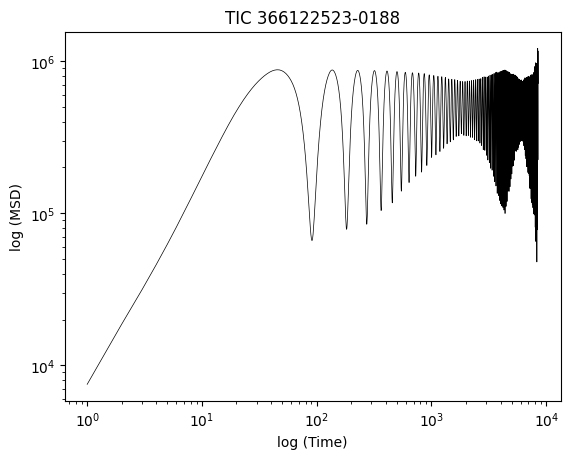

In [21]:
for files in os.listdir(dirName):
    if files.endswith(ext):
        x = open(files)
        number = x.name[25:45]
        name = "TIC " + number.lstrip('0')
        lc = lk.read(files)
        lcMSD = MSD(lc, 'pdcsap_flux')
        plt.figure()
        plt.title(name)
        logplot(lcMSD)
        #plt.savefig(name + ' MSD.png')
    else:
        continue

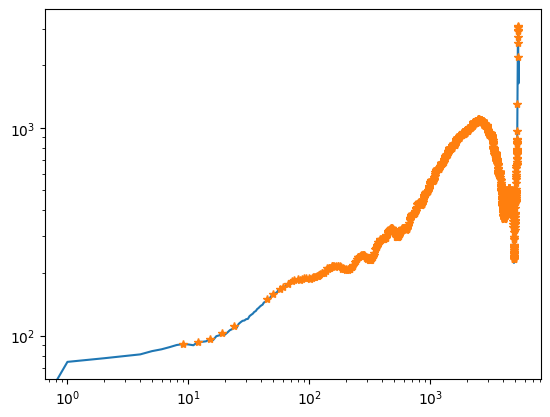

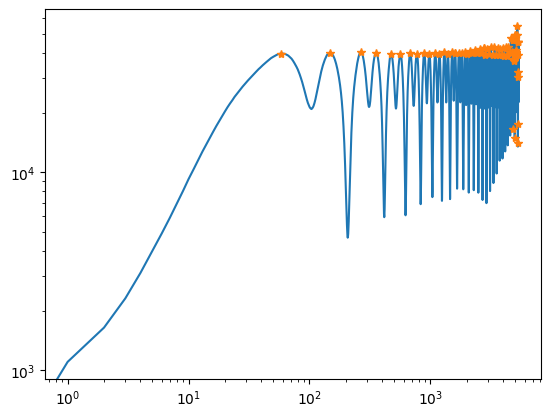

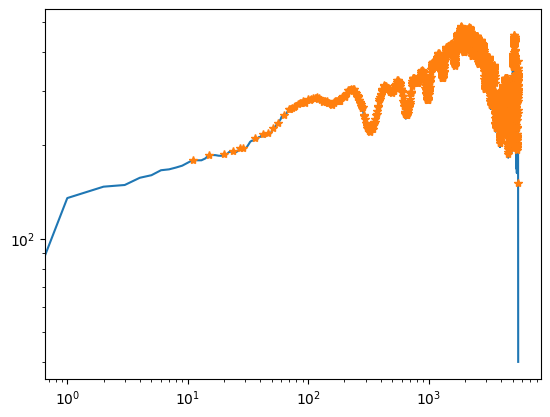

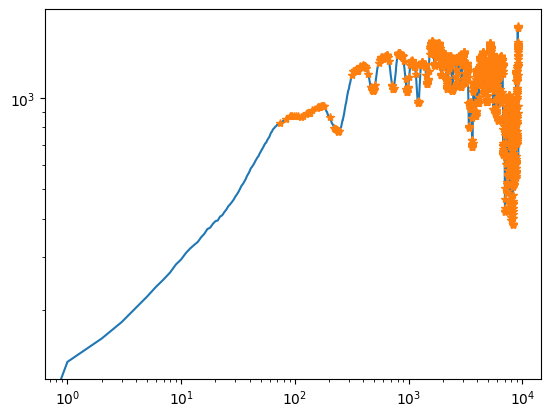

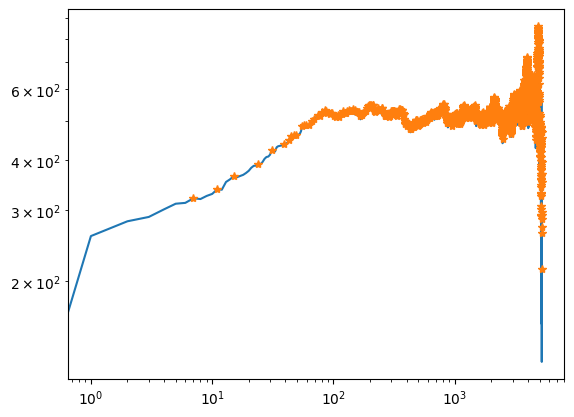

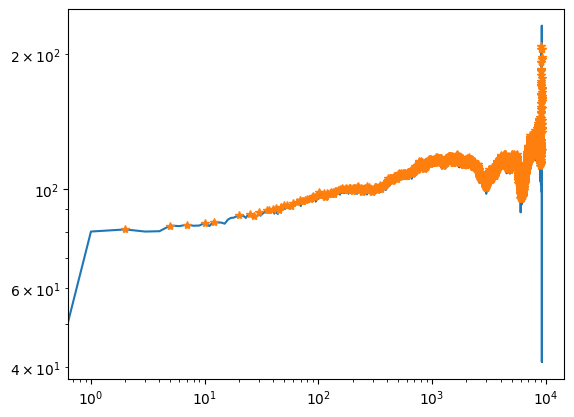

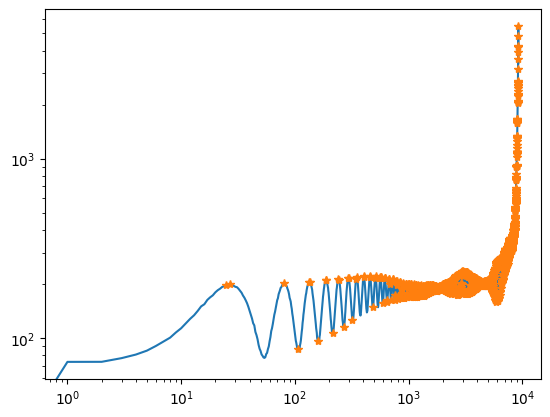

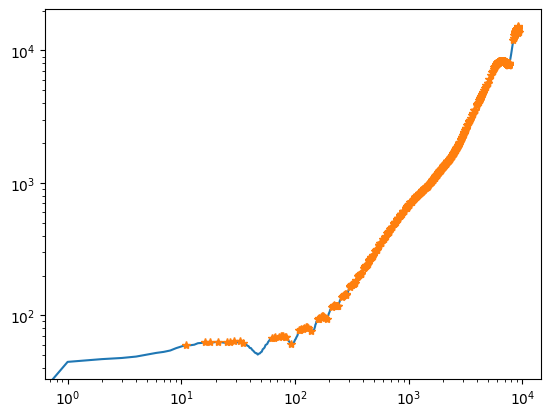

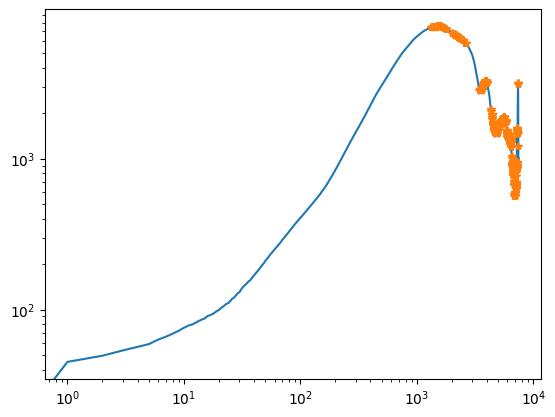

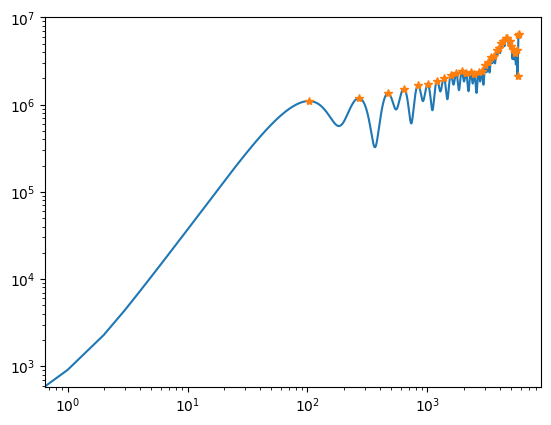

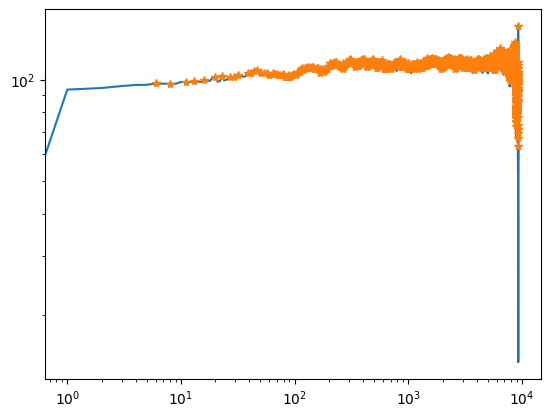

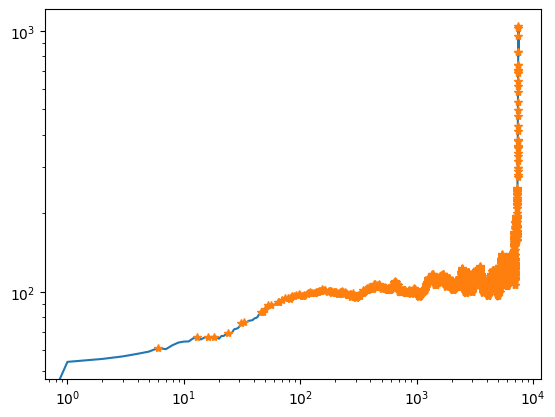

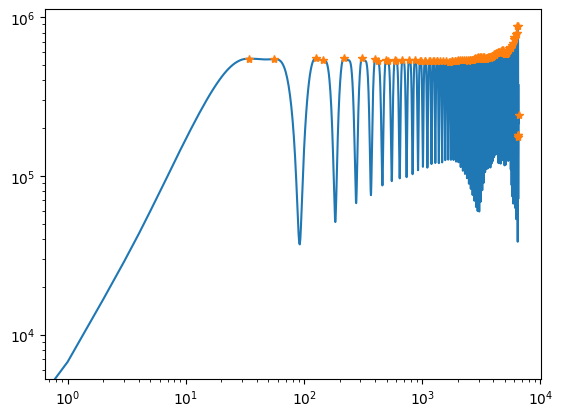

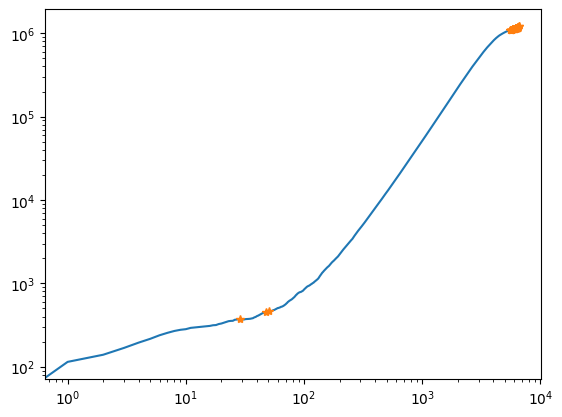

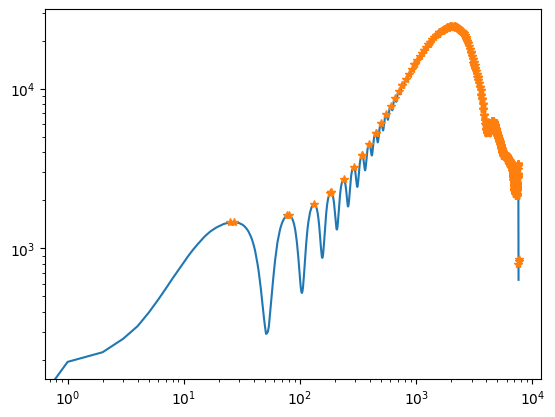

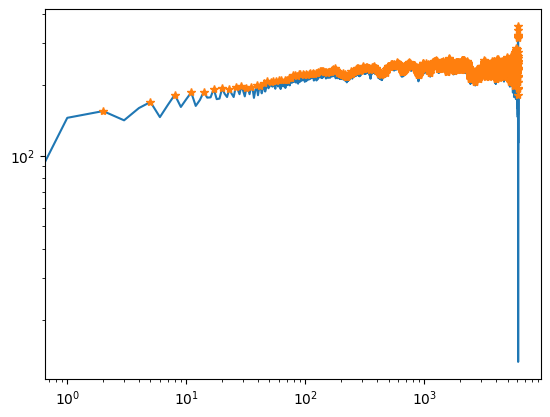

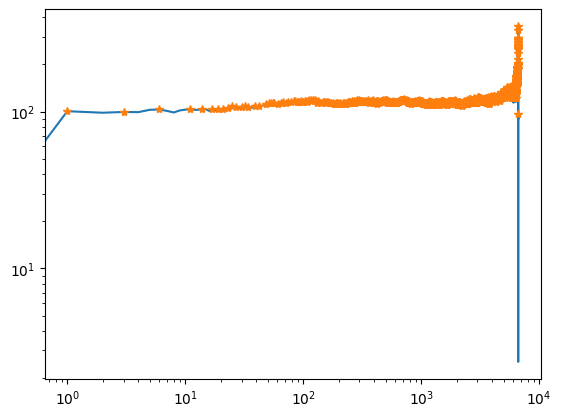

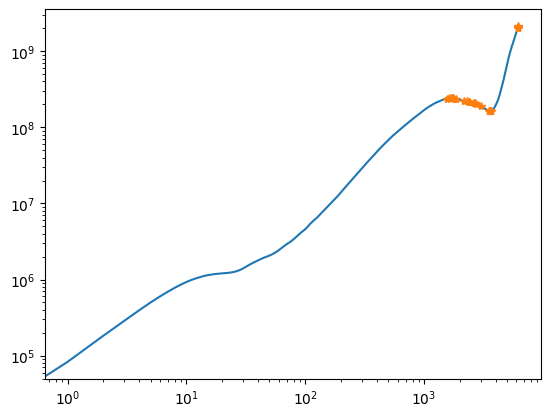

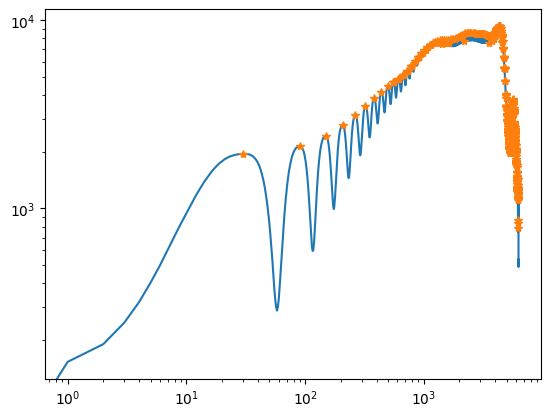

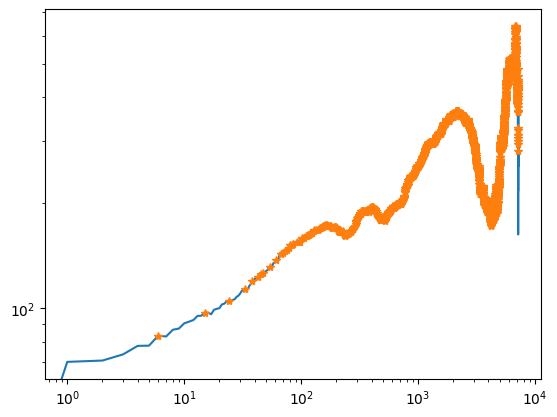

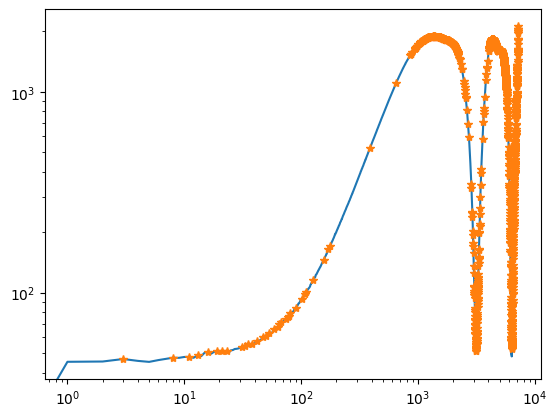

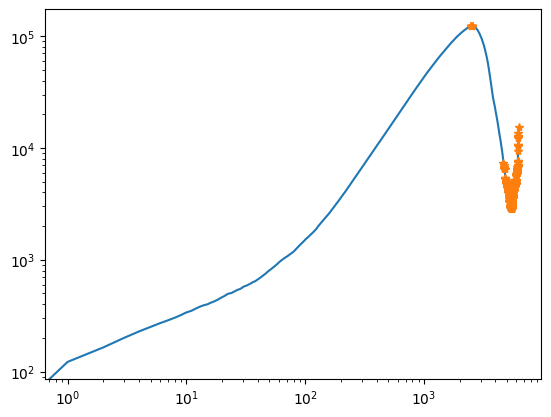

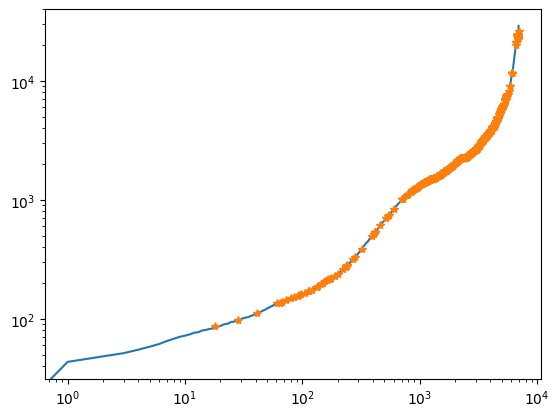

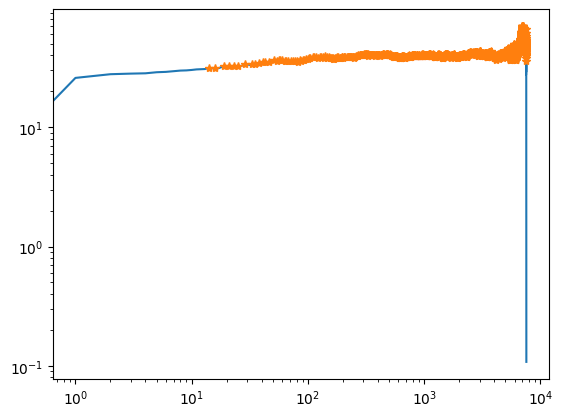

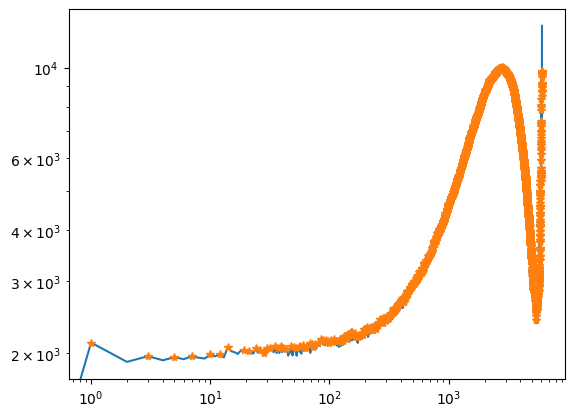

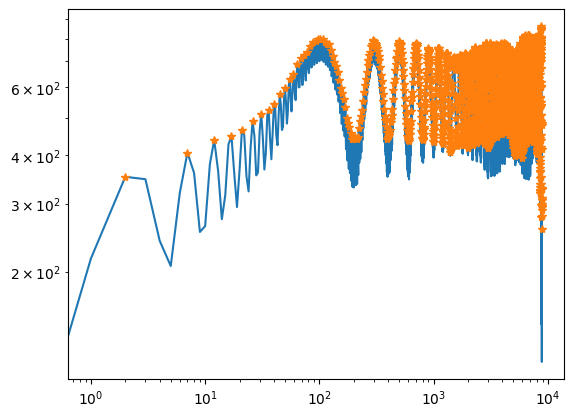

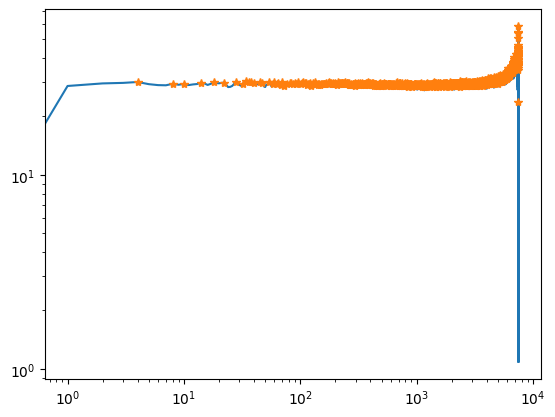

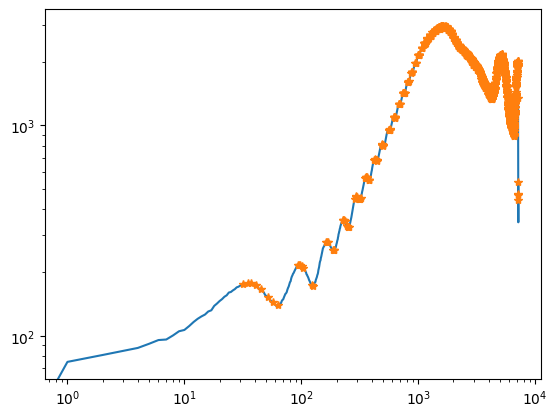

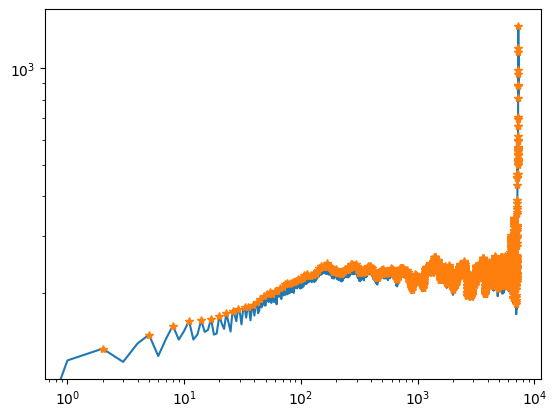

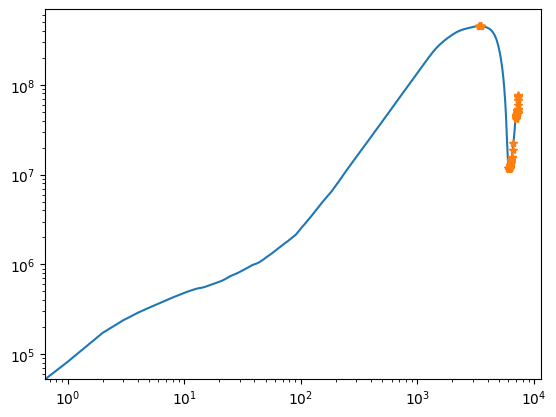

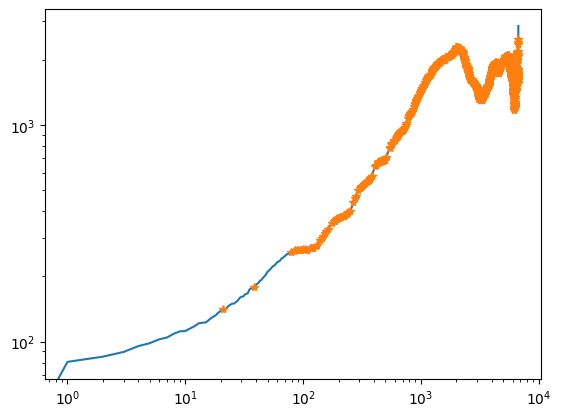

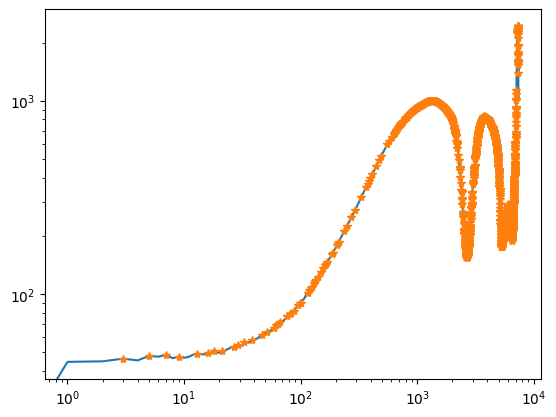

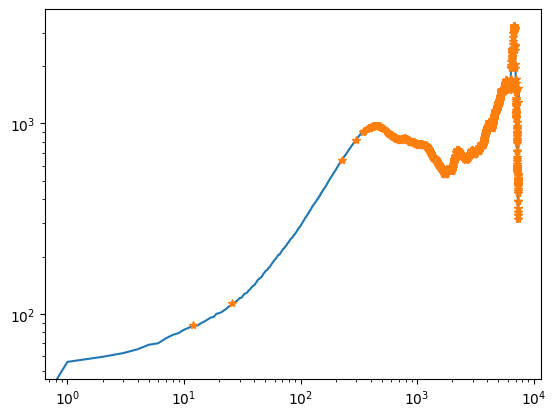

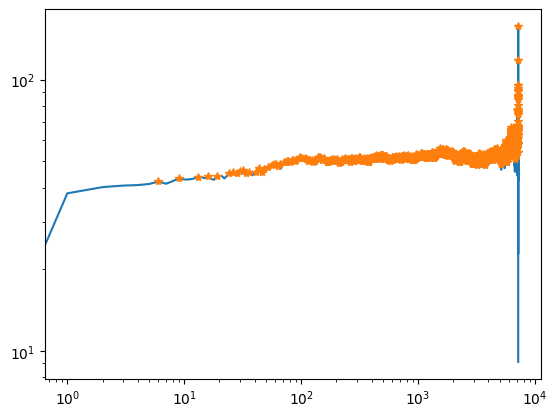

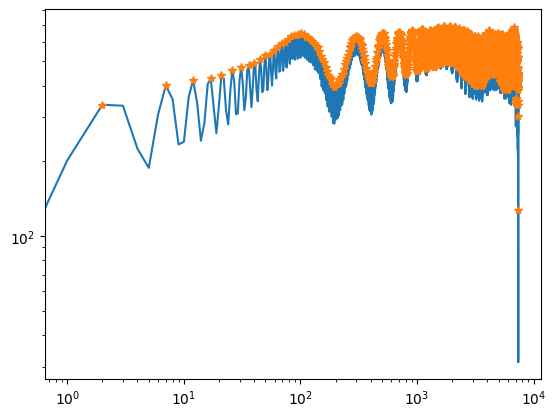

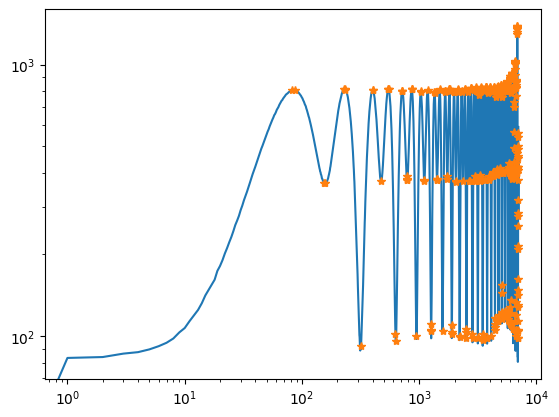

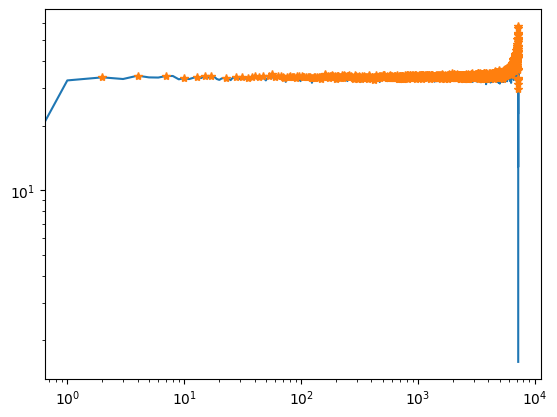

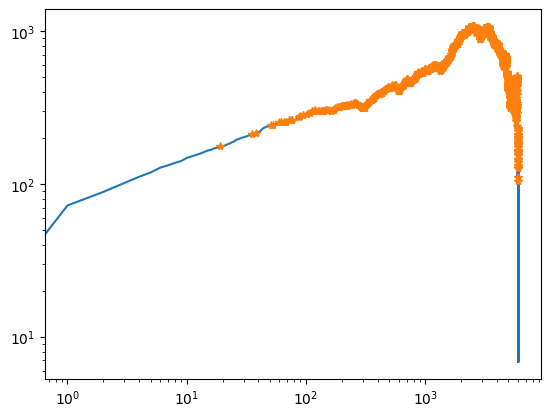

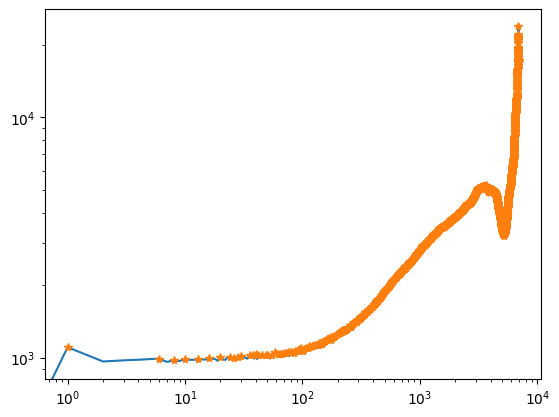

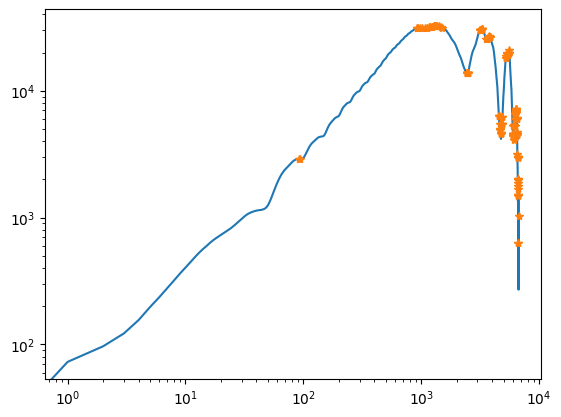

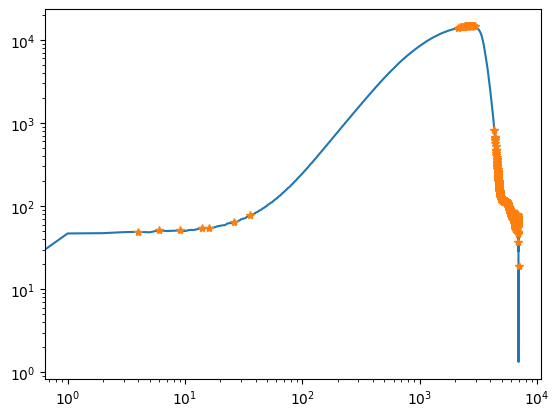

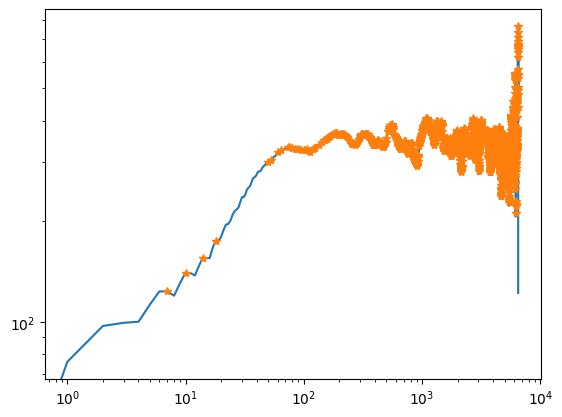

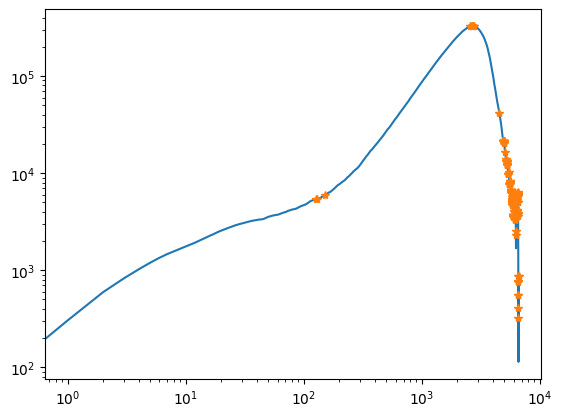

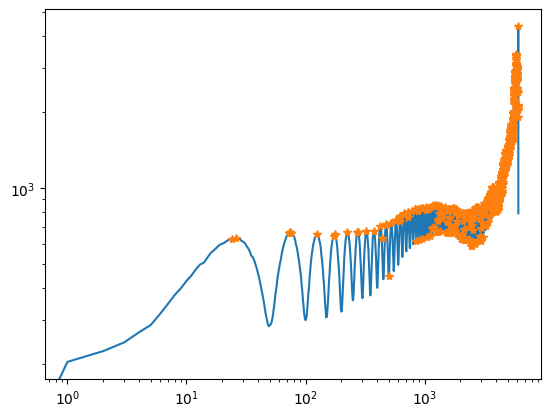

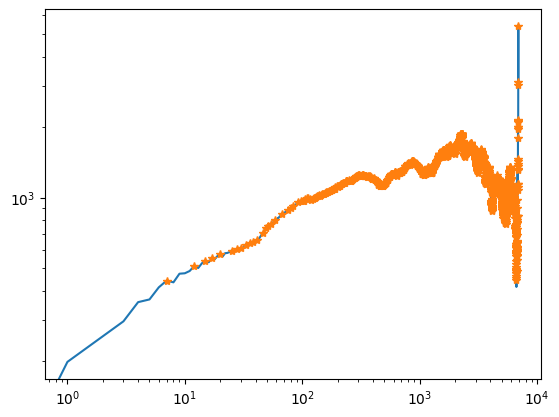

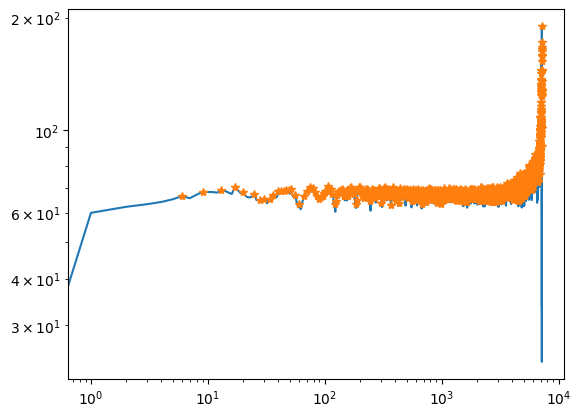

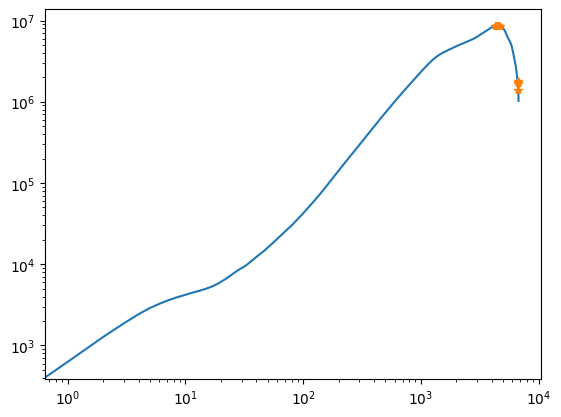

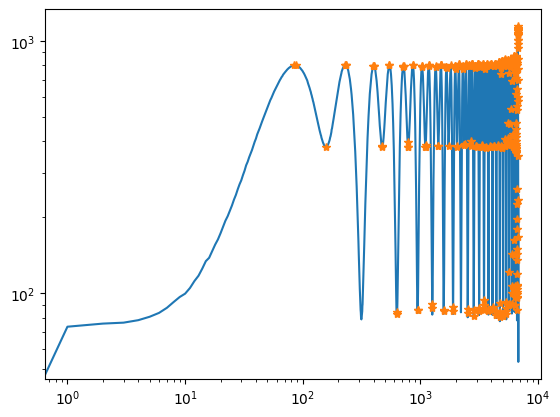

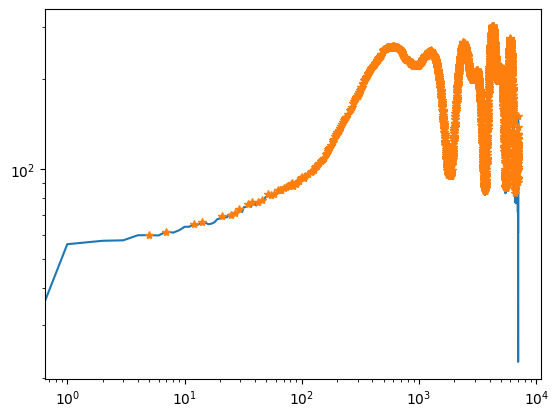

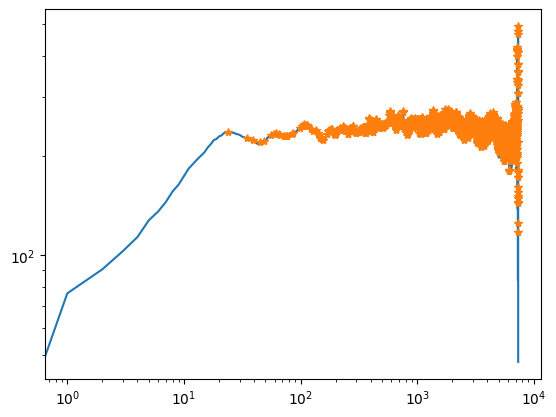

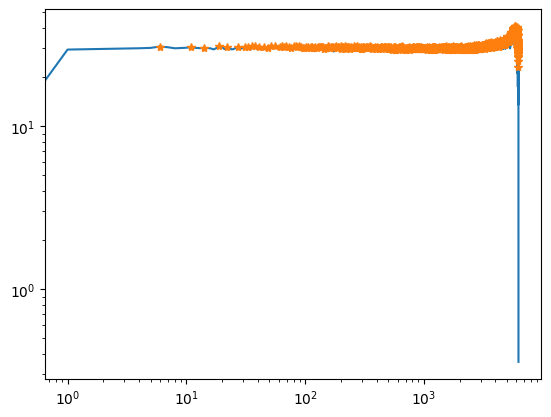

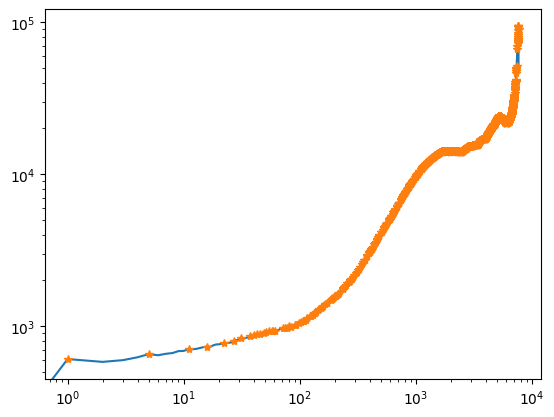

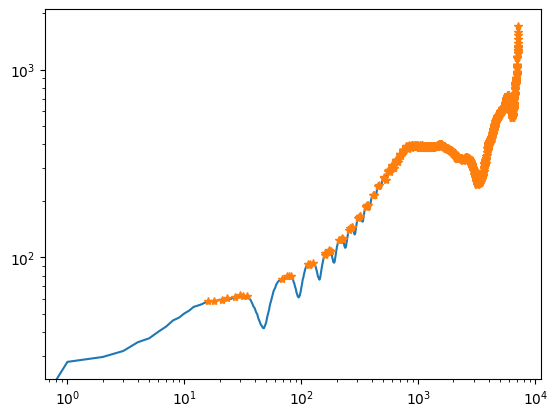

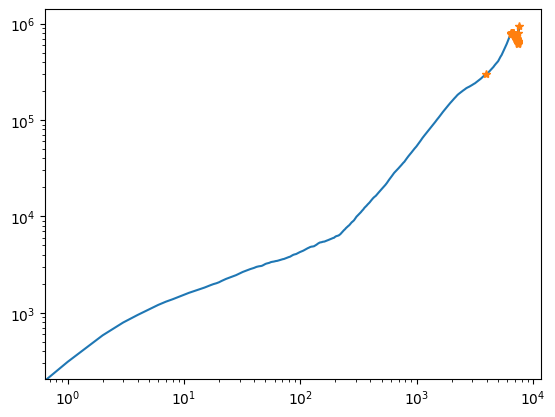

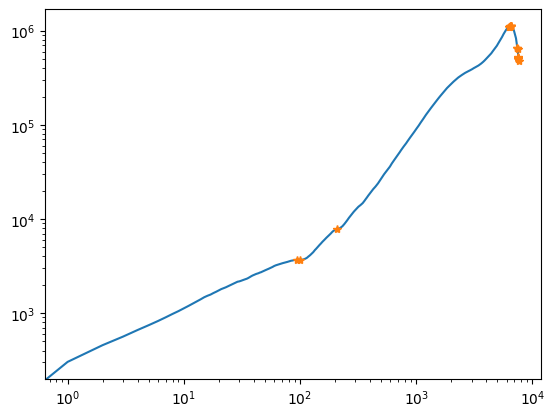

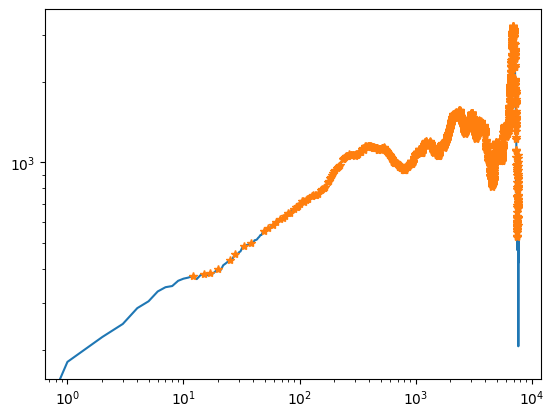

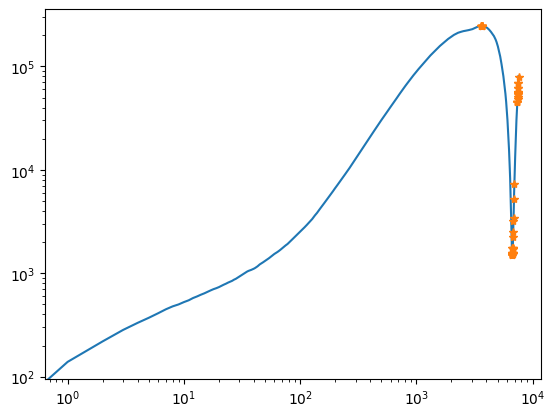

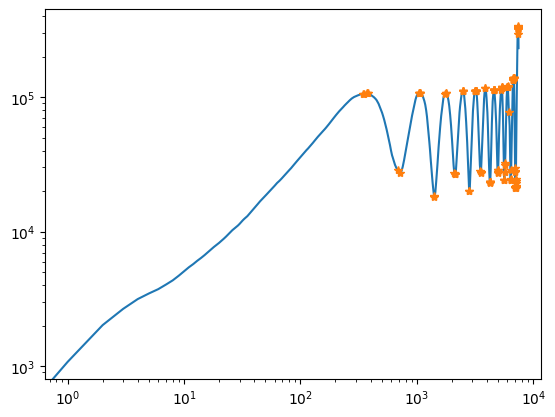

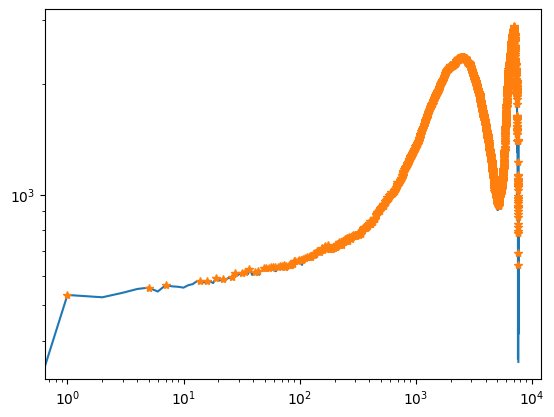

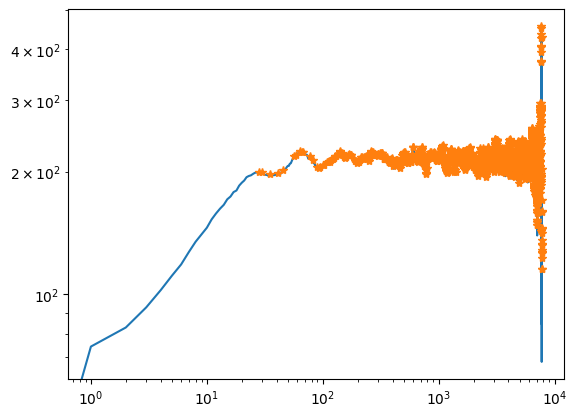

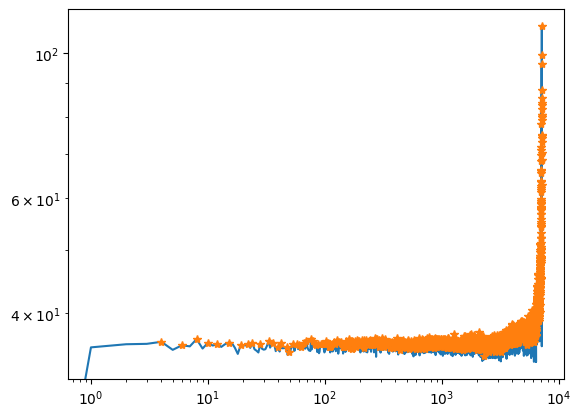

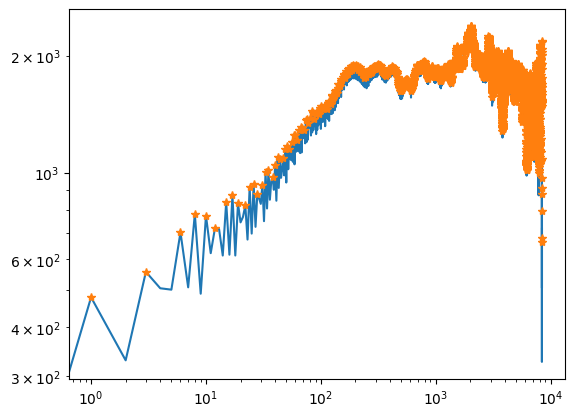

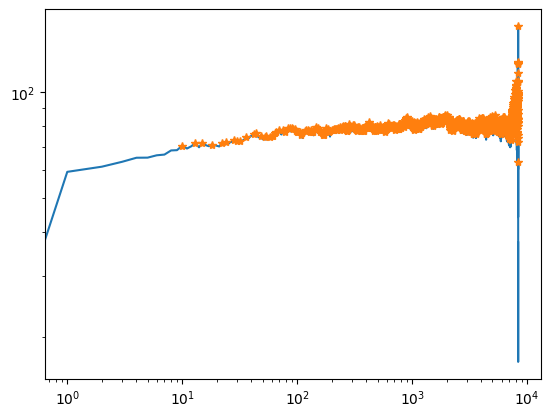

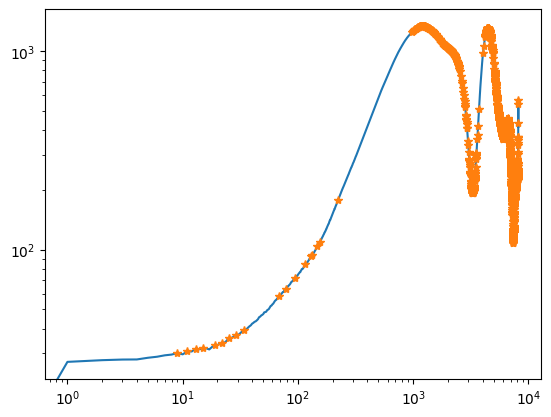

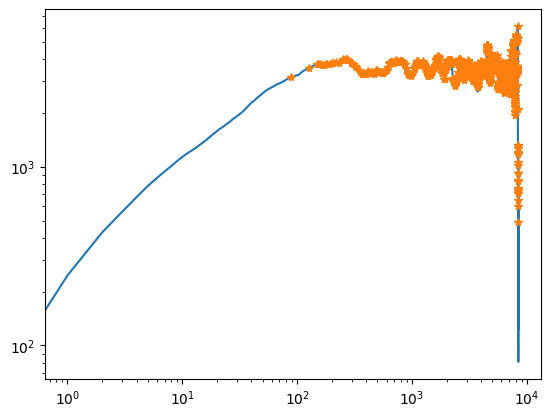

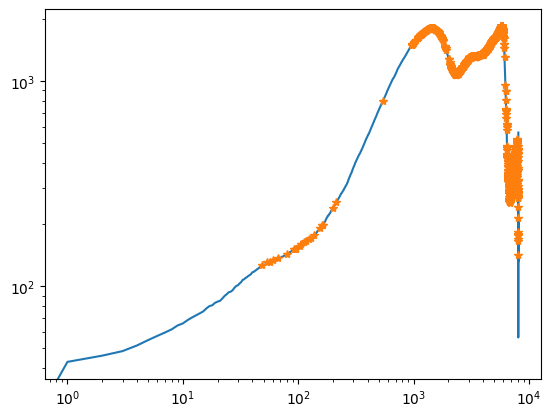

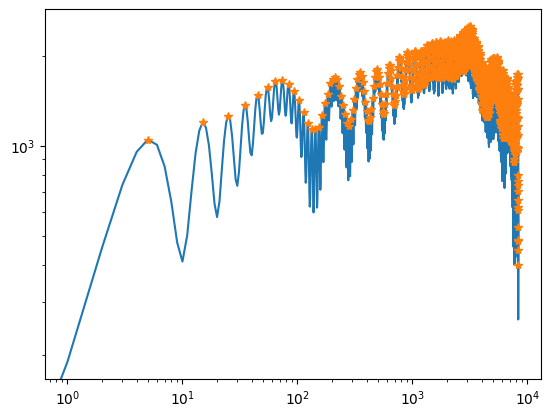

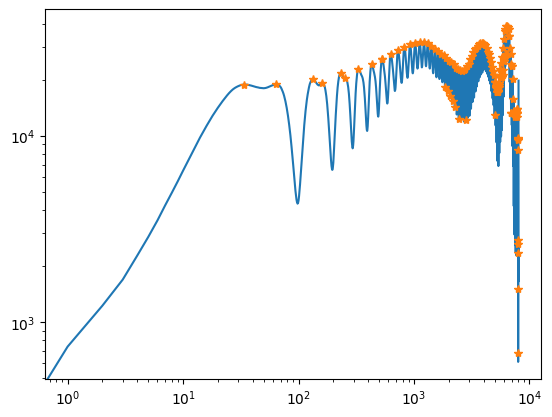

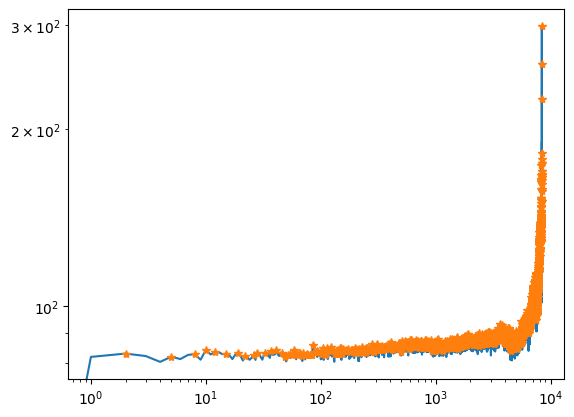

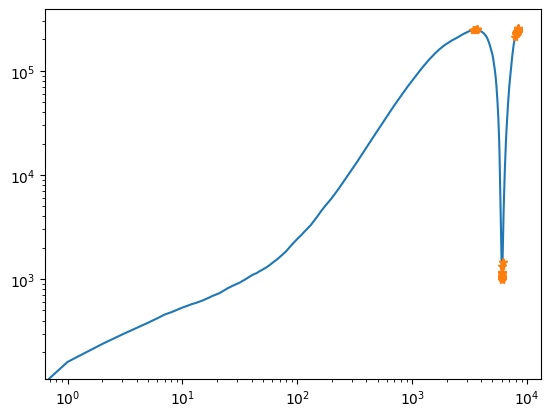

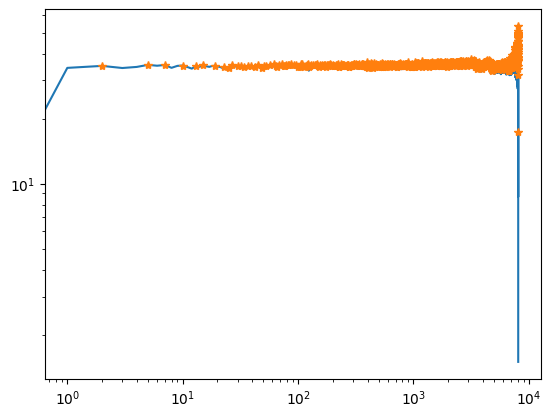

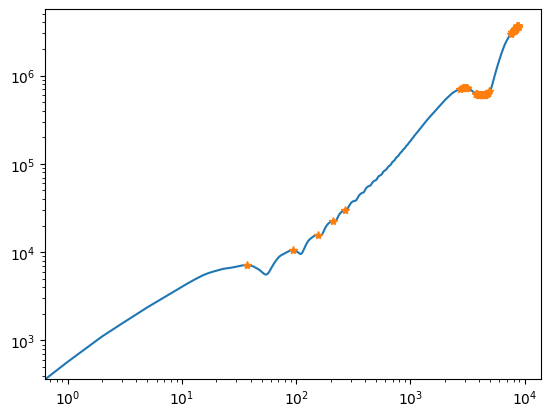

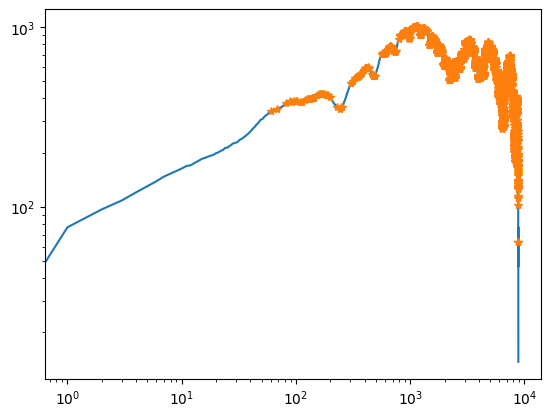

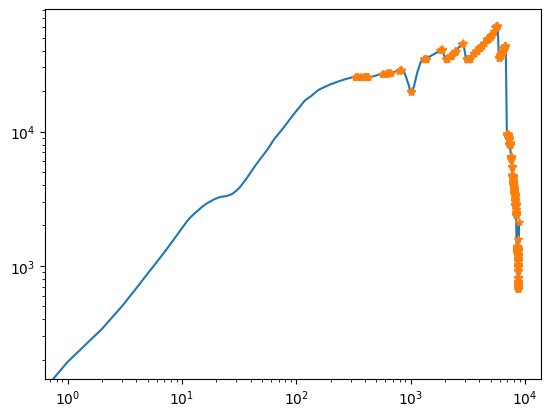

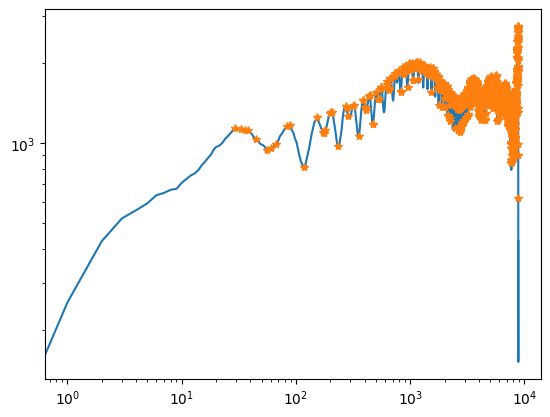

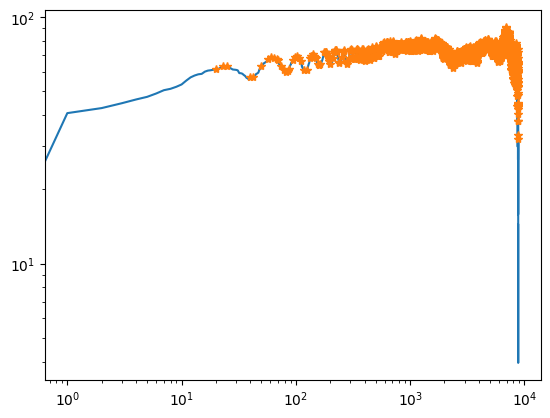

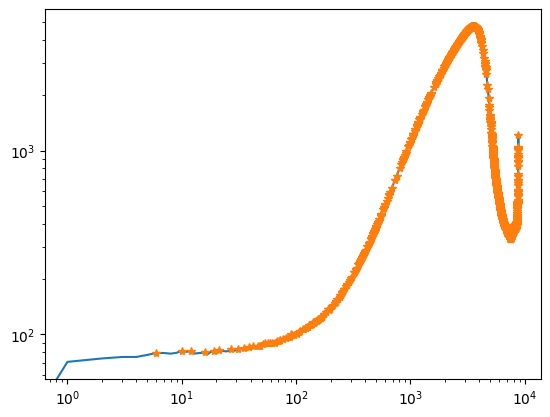

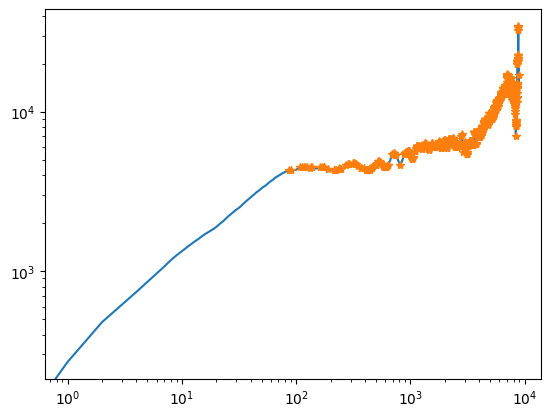

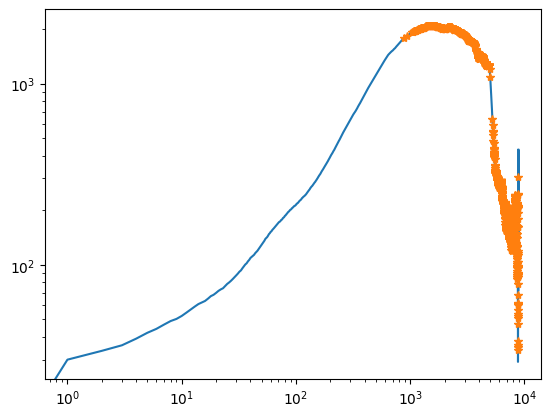

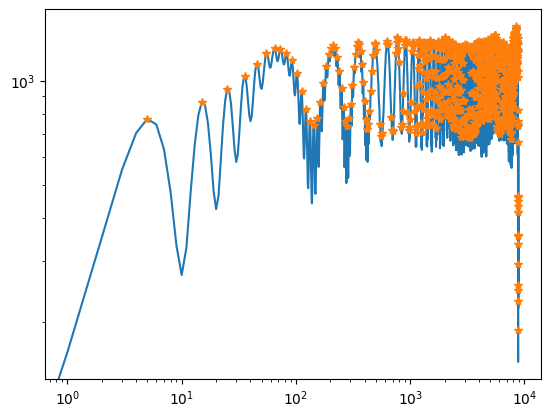

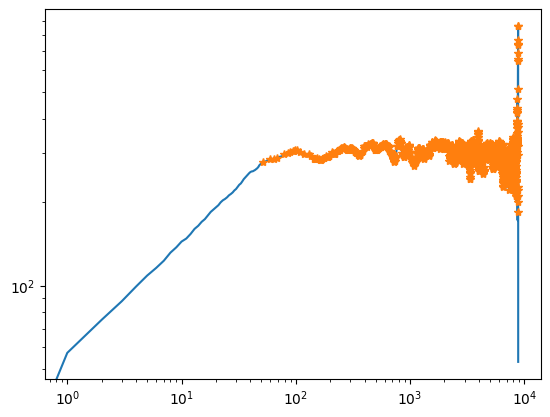

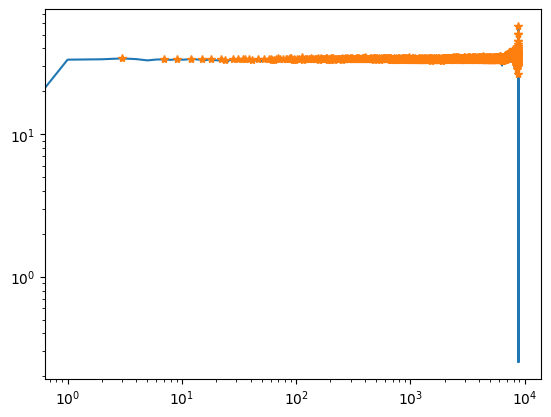

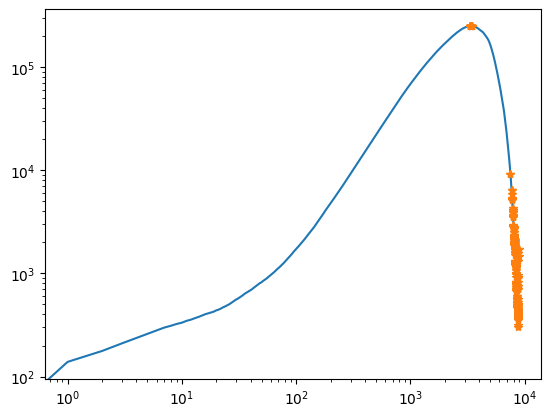

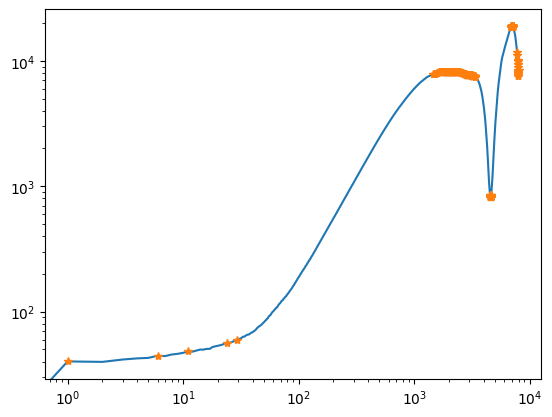

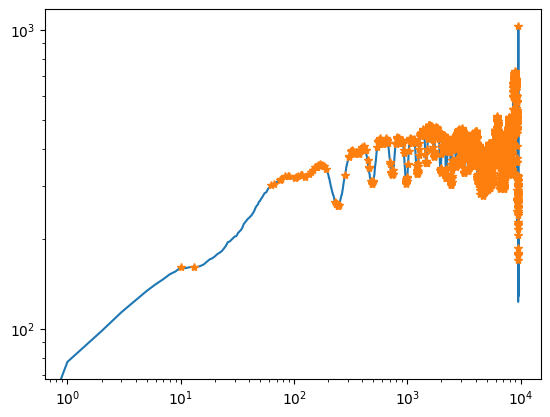

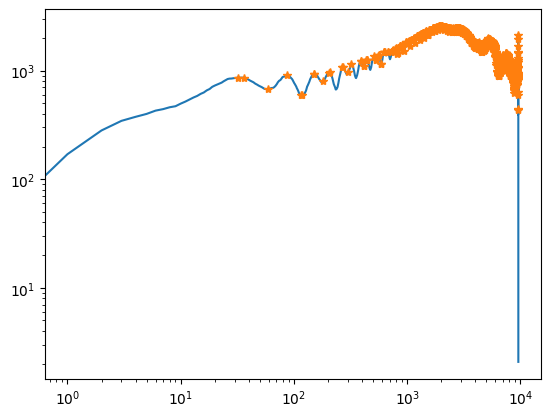

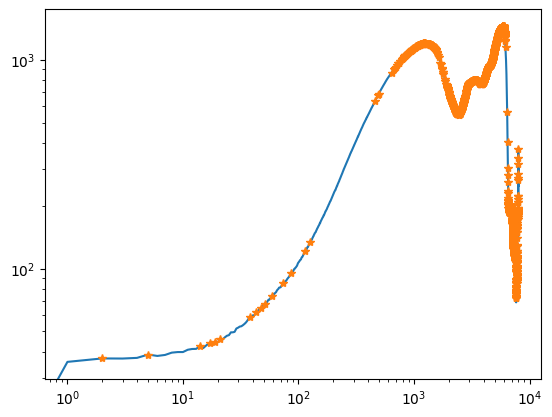

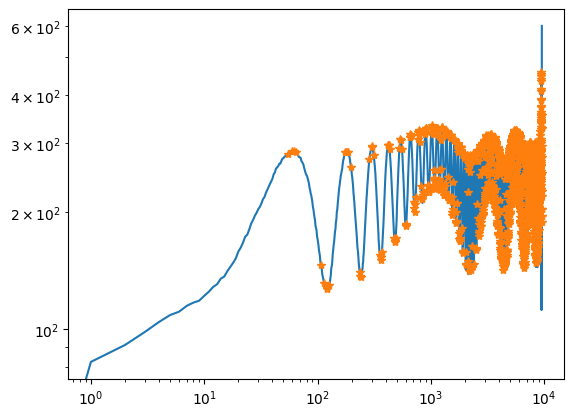

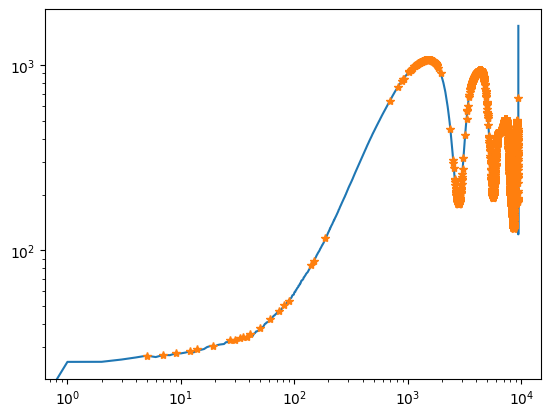

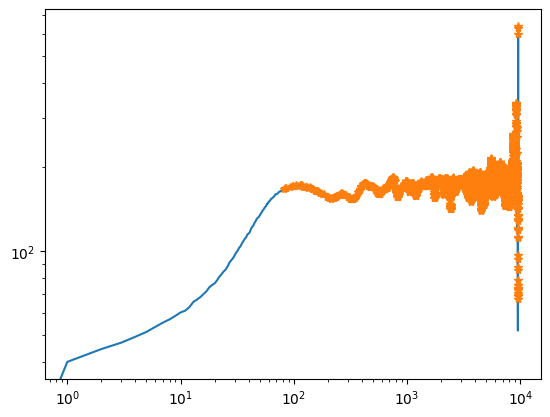

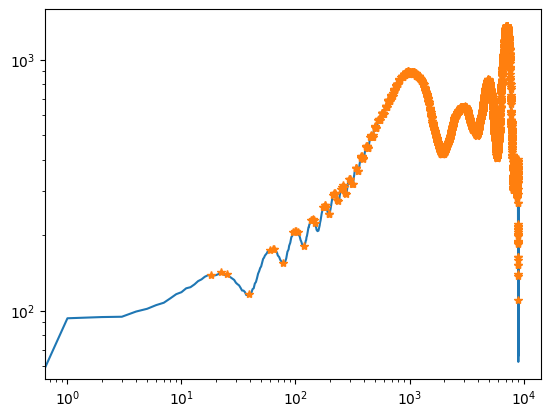

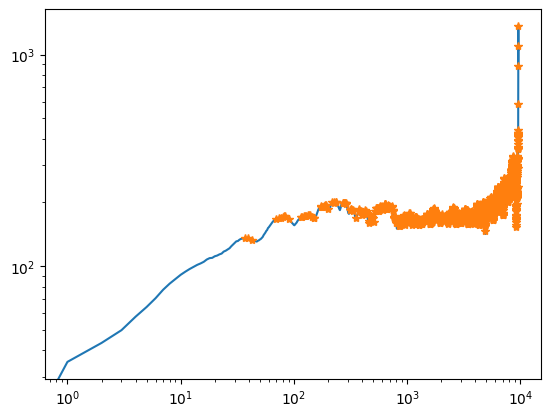

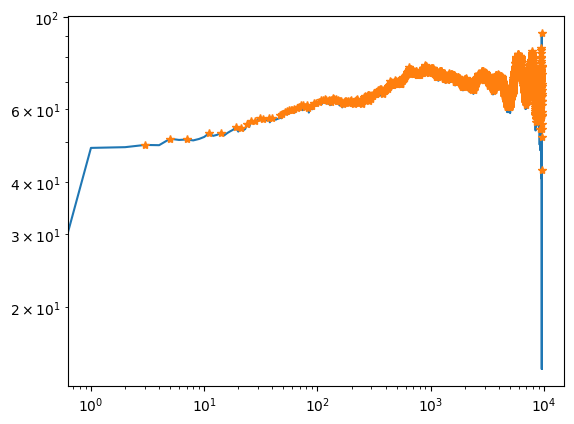

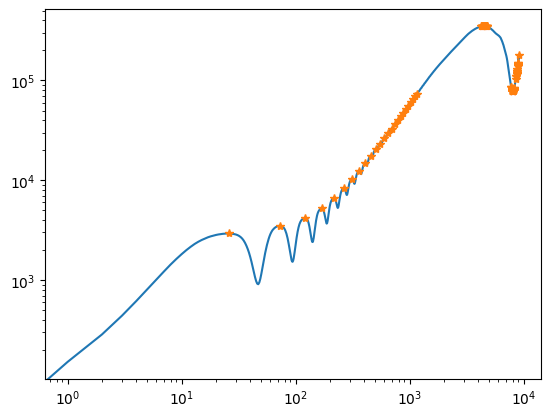

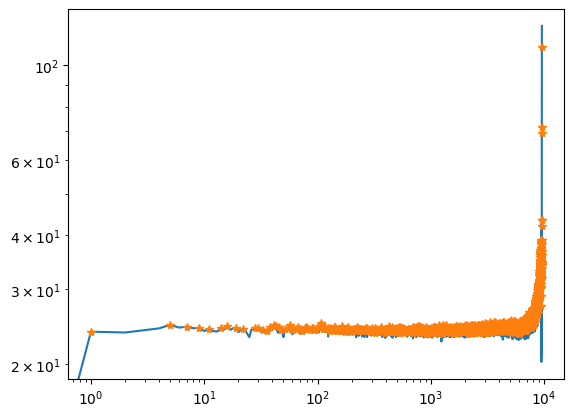

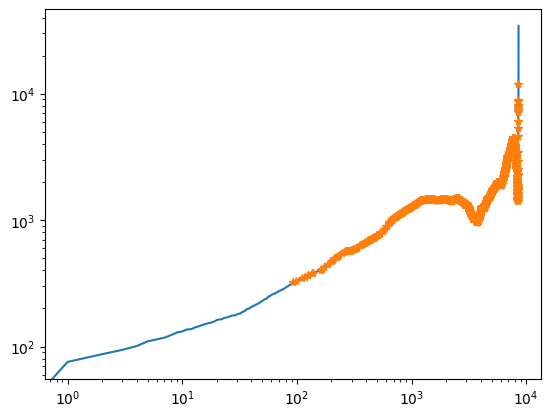

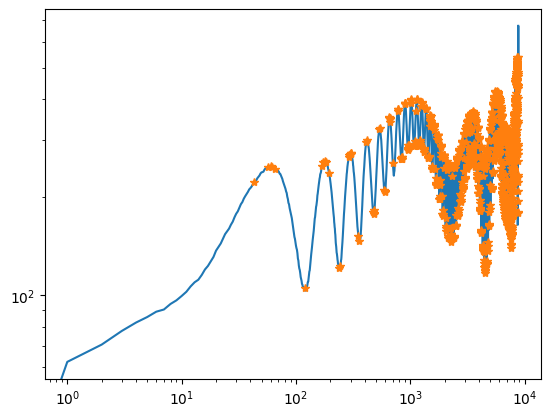

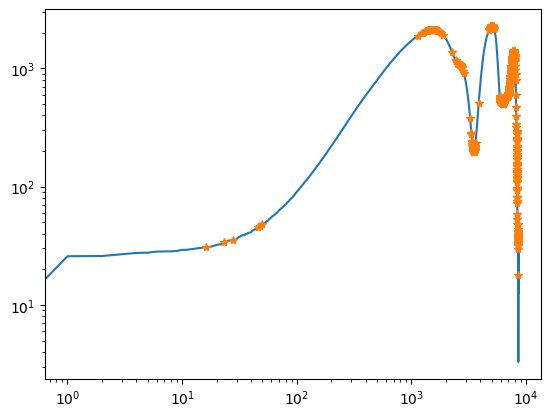

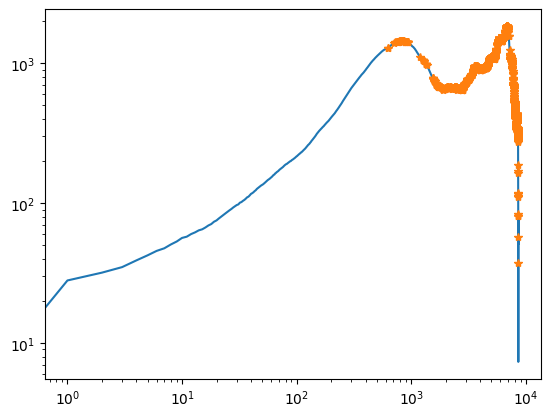

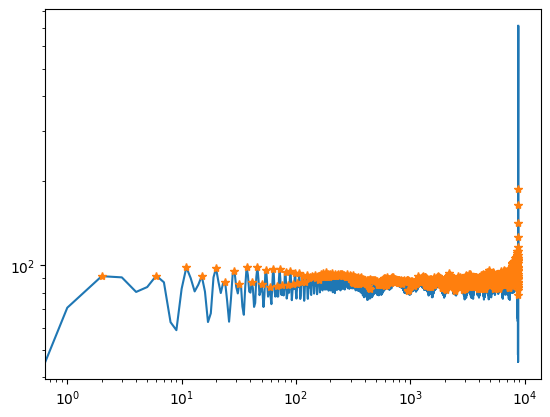

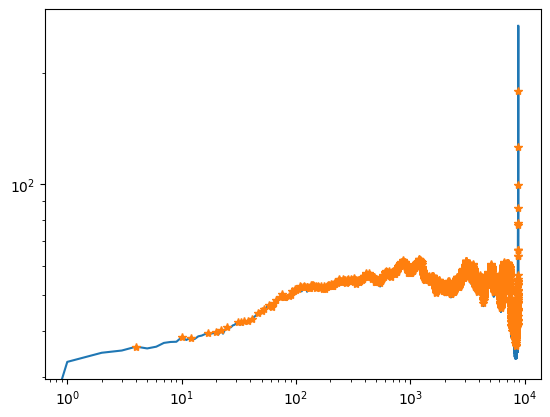

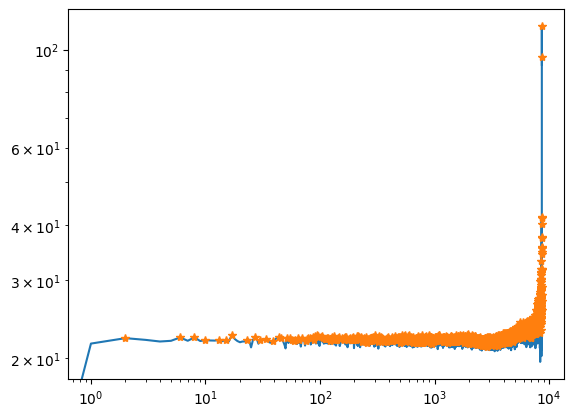

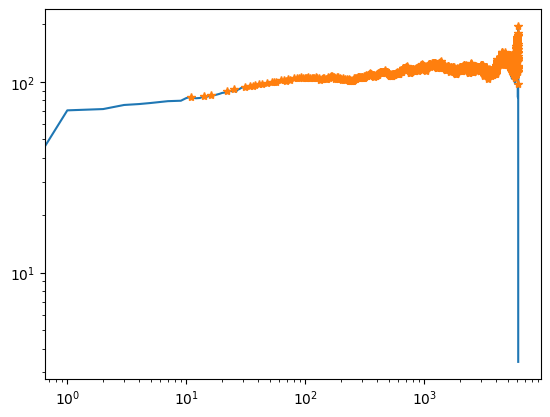

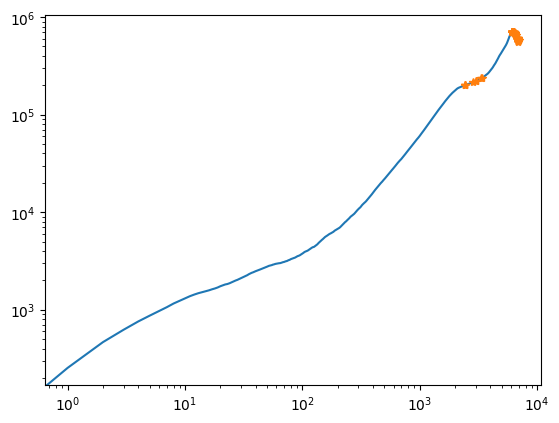

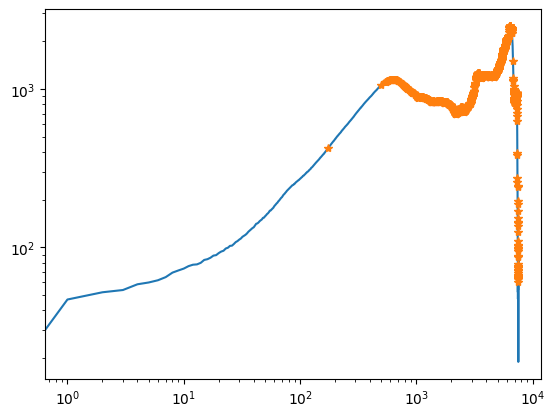

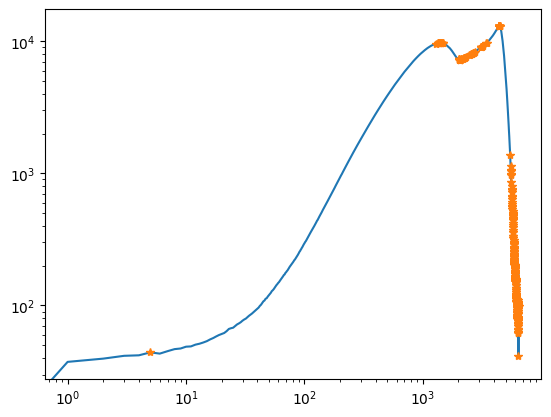

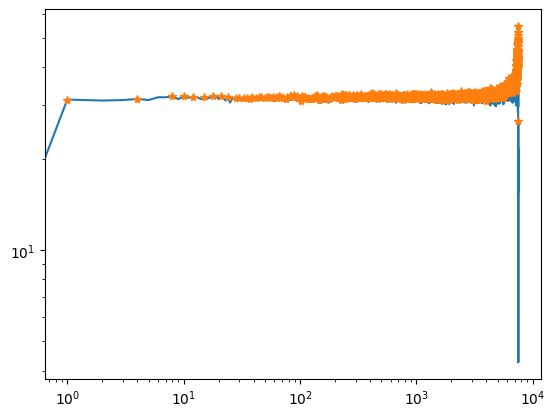

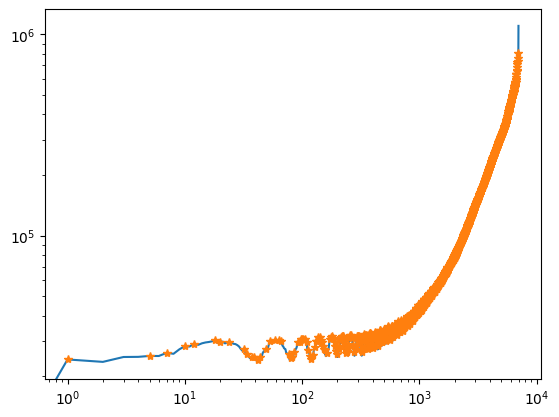

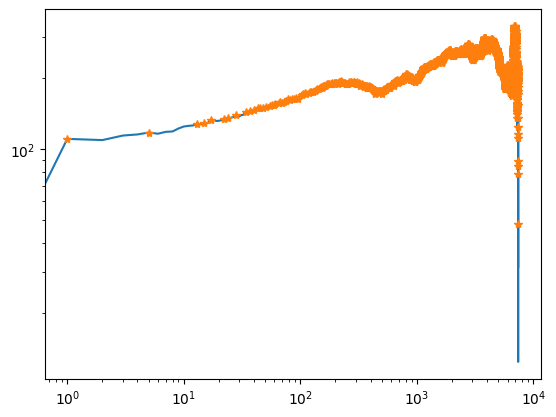

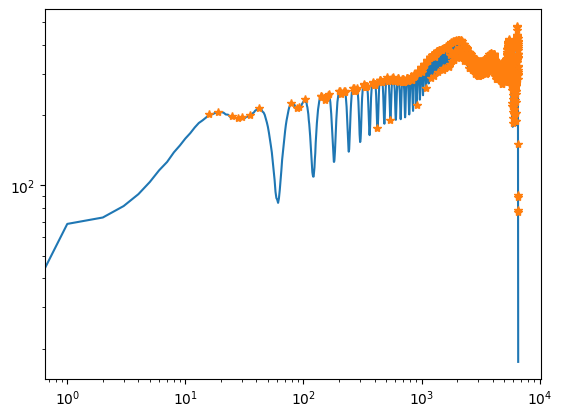

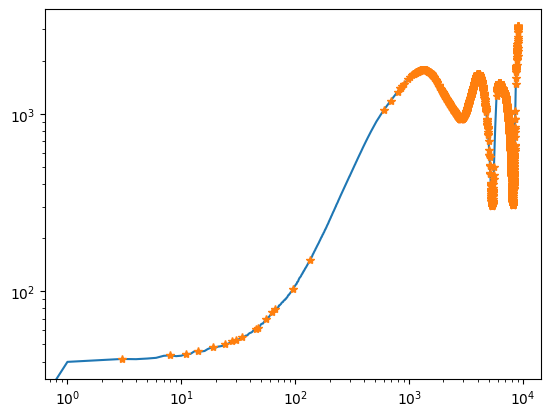

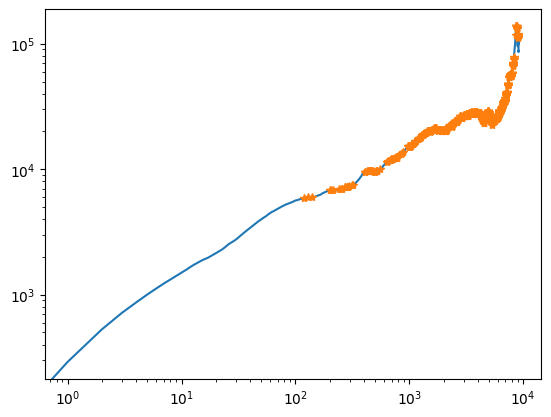

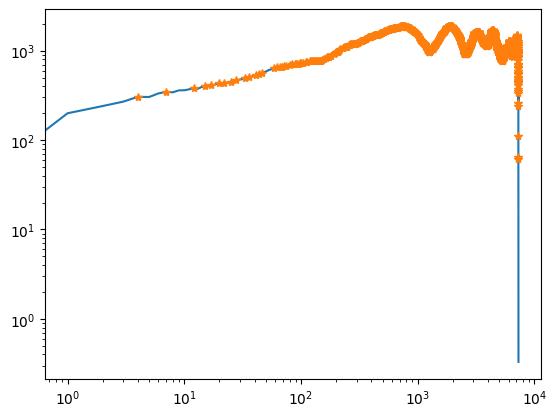

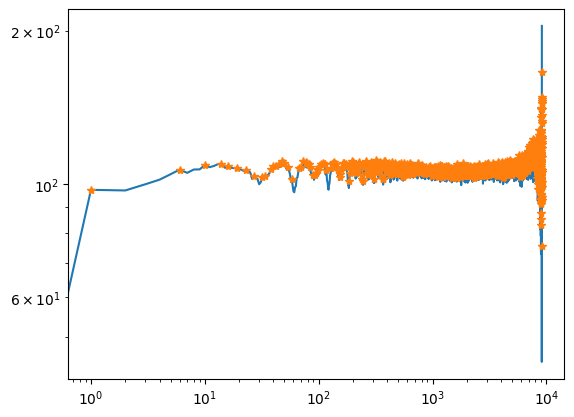

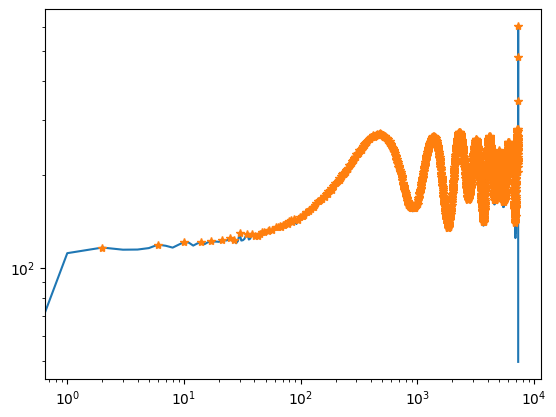

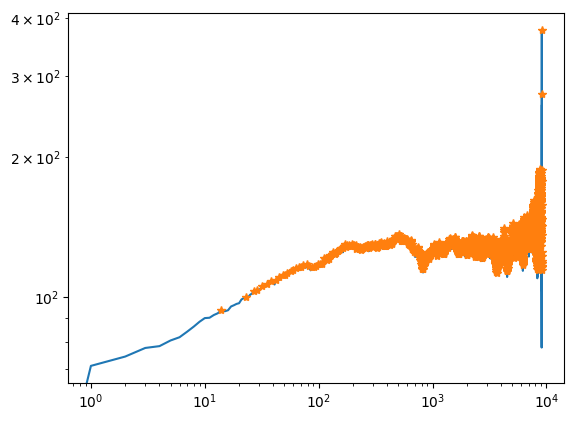

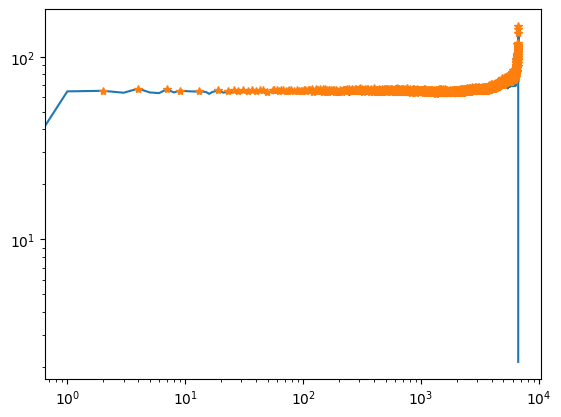

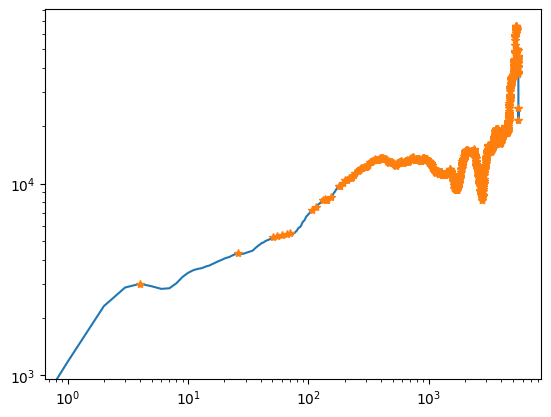

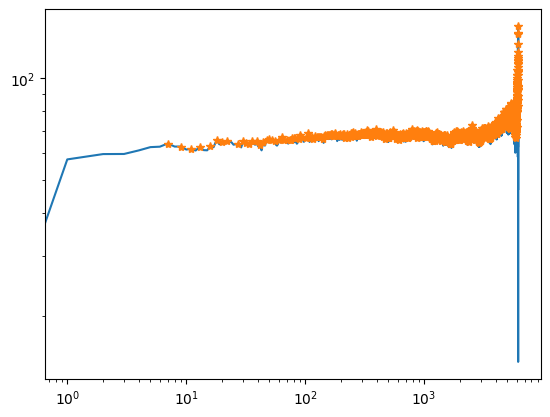

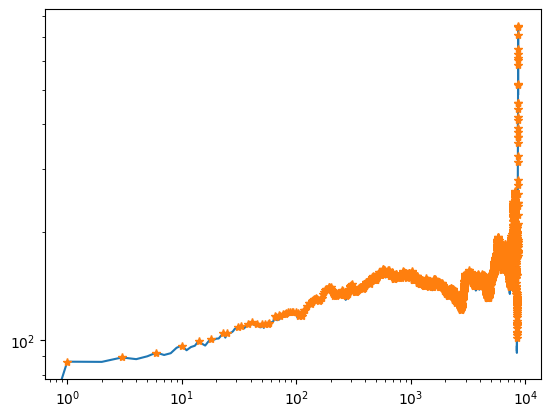

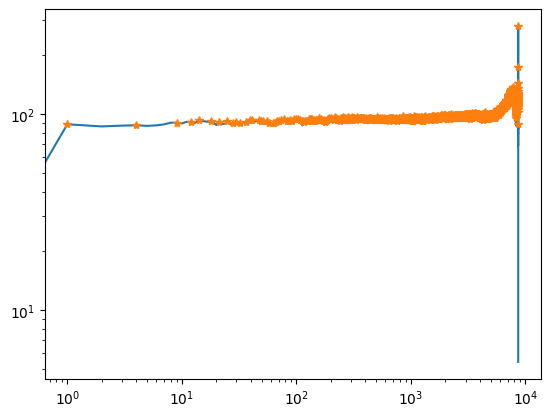

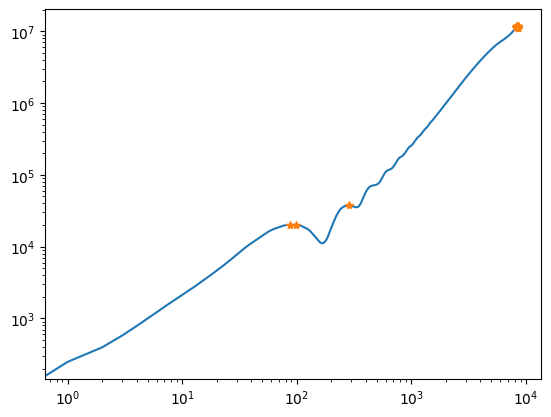

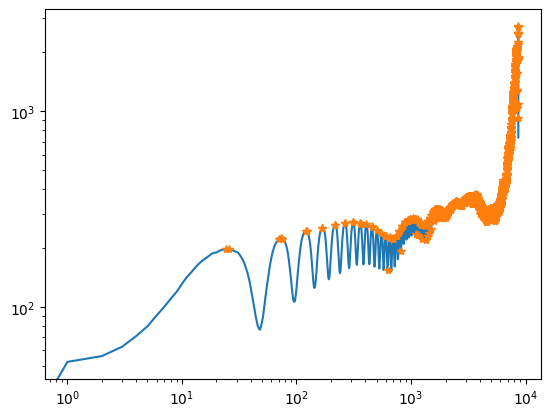

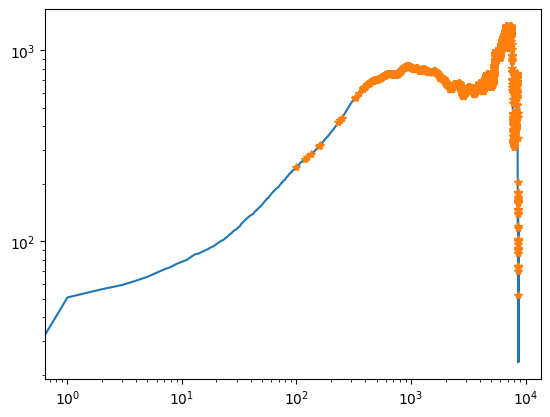

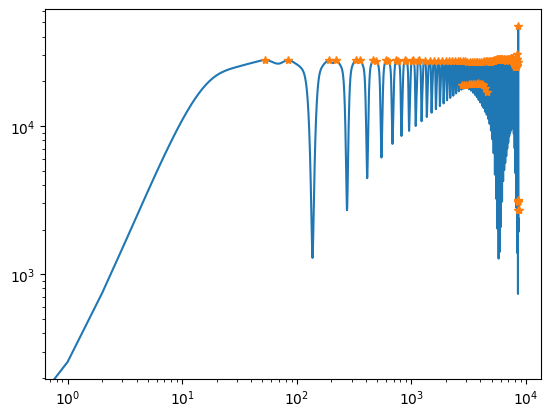

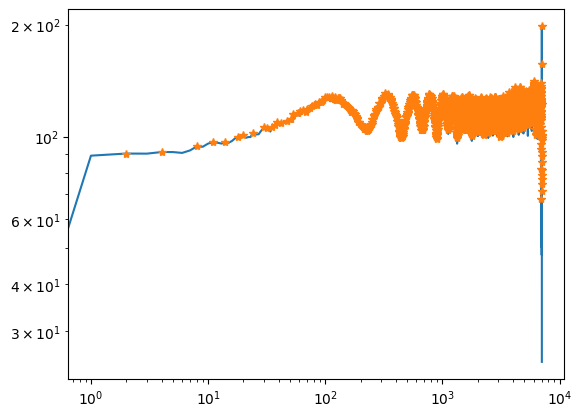

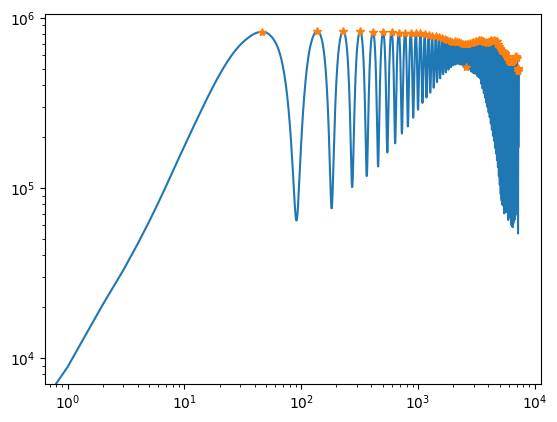

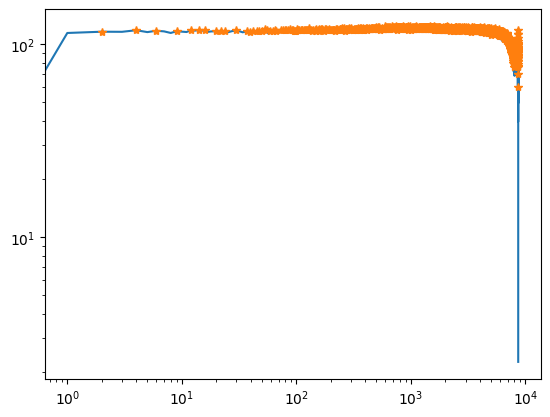

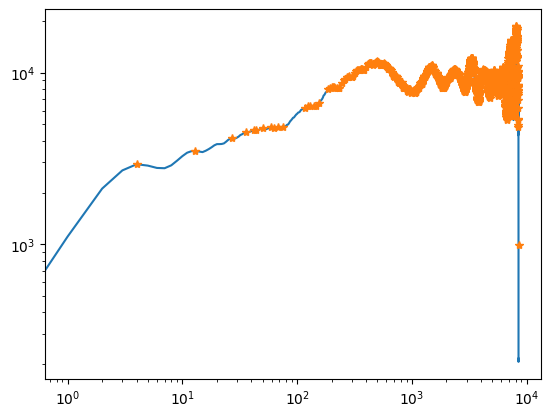

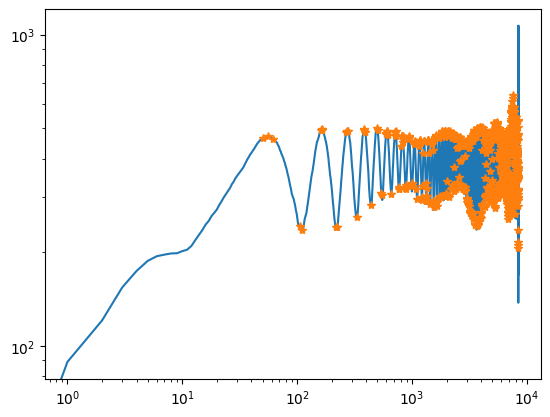

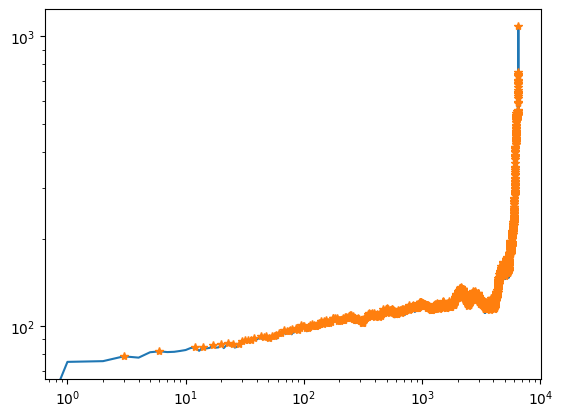

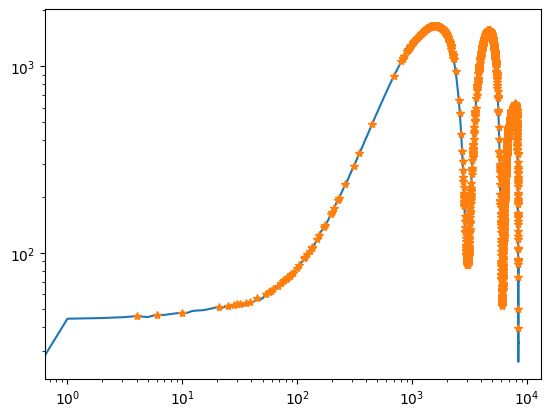

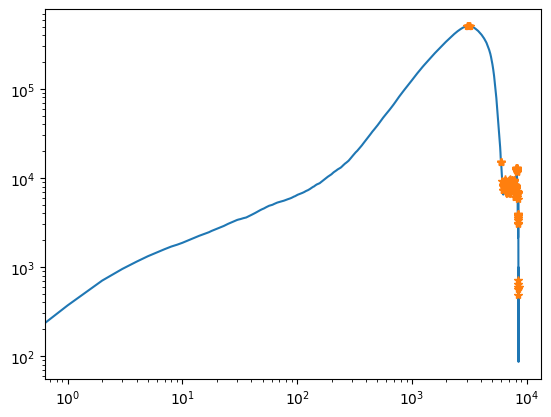

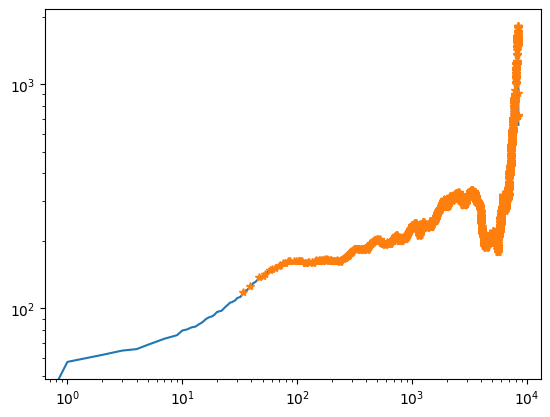

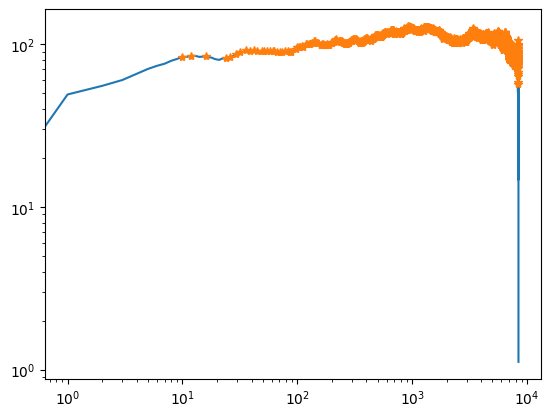

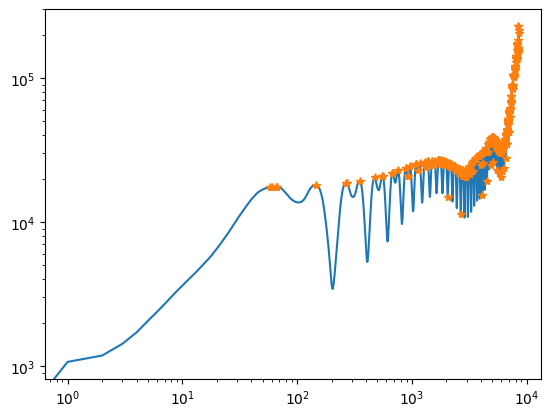

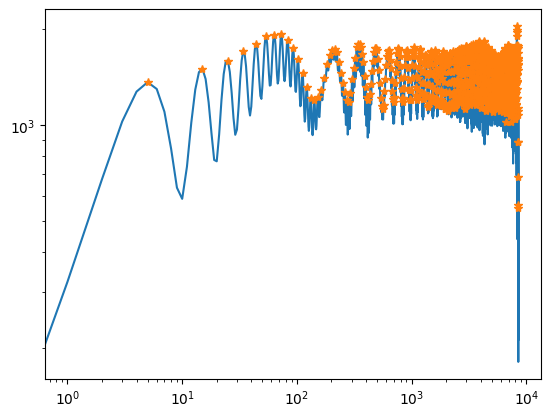

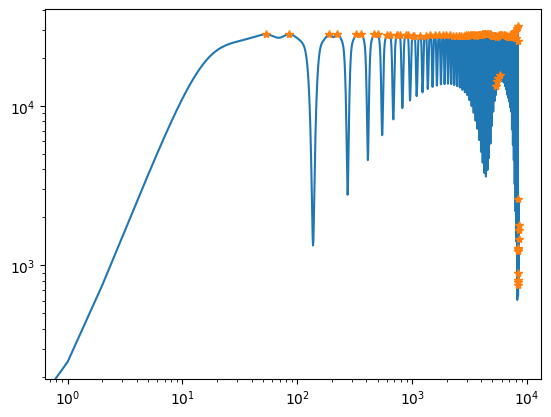

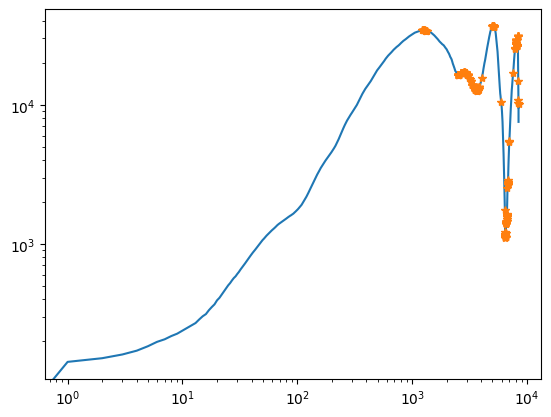

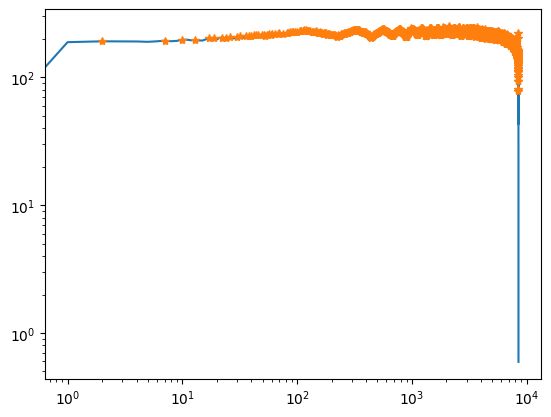

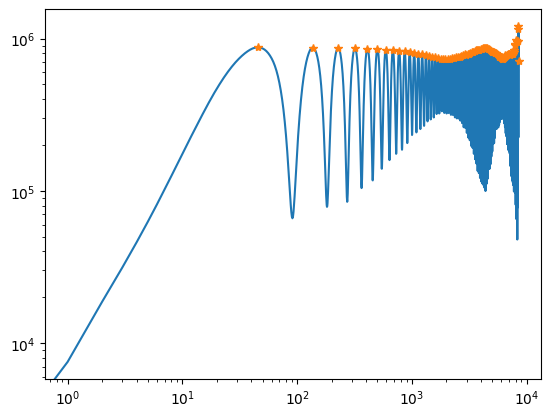

In [21]:
from scipy.signal import find_peaks
extMSD = ('lc.fits_MSD.xlsx')

for files in os.listdir(dirName):
    if files.endswith(extMSD):
        dataMSD = pd.read_excel(files)
        data = dataMSD['MSD']
        peak, _ = find_peaks(data)
        plt.loglog(data[1:])
        plt.loglog(peak, data[peak], "*")
        plt.loglog(np.zeros_like(data), "--", color="green")
        plt.show()
    else:
        continue

In [4]:
for files in os.listdir(dirName):
    if files.endswith(ext):
        lc = lk.read(files)
        
        timedata = lc['pos_corr1']
        divider = 0
        for i in range(0,len(timedata)):
            if timedata[i] == 0:
                divider = i
            else:            
                continue
        
        dataset = lc['pdcsap_flux']
        
        count = 0
        prev = 0
        indexend = 0
        for i in range(0,len(dataset)):
            if dataset[i] != float('nan'):
                count += 1
            else:            
                if count > prev:
                    prev = count
                    indexend = i
                    count = 0
        if count > prev:
            prev = count
            indexend = i + 1
            
        start_i = indexend - prev
        end_i = indexend - 1
        
        if start_i < divider < end_i:
            if end_i - divider+1 > divider - start_i:
                start = divider+1
                end = end_i
            else:
                start = start_i
                end = divider
        elif divider < start_i:
            start = start_i
            end = end_i
        elif divider+1 > end_i:
            start = start_i
            end = end_i
        
        print(start, end, divider, dataset[start], dataset[end], files)
    else:
        continue

9245 14573 9244 -53.66872024536133 electron / s -9.718371391296387 electron / s tess2019198215352-s0014-0000000022172905-0150-s_lc.fits
9245 14598 9244 1295.731689453125 electron / s 1089.341552734375 electron / s tess2019198215352-s0014-0000000069559020-0150-s_lc.fits
9245 14800 9244 179.56173706054688 electron / s 177.12644958496094 electron / s tess2019198215352-s0014-0000000086813476-0150-s_lc.fits
0 9244 9244 375.34344482421875 electron / s 348.4608459472656 electron / s tess2019198215352-s0014-0000000103632402-0150-s_lc.fits
9245 14468 9244 40.945987701416016 electron / s 55.841121673583984 electron / s tess2019198215352-s0014-0000000168990573-0150-s_lc.fits
0 9244 9244 339.9912414550781 electron / s 342.98468017578125 electron / s tess2019198215352-s0014-0000000186040332-0150-s_lc.fits
0 9244 9244 55.8139533996582 electron / s 16.310884475708008 electron / s tess2019198215352-s0014-0000000193895999-0150-s_lc.fits
0 9244 9244 126.60468292236328 electron / s 9.620992660522461 elec

In [11]:
#for files in os.listdir(dirName):
#    if files.endswith(ext):
#        lc = lk.read(files)
#        lc.to_excel(f'{files}.xlsx')
#    else:
#        continue

In [26]:
#for files in os.listdir(dirName):
#    if files.endswith(ext):
#        lc = lk.read(files)
#        lcMSD = MSD(lc, 'pdcsap_flux')
#        data = {"N": lcMSD[0], "MSD": lcMSD[1]}
#        msdData = pd.DataFrame(data)
#        msdData.to_excel(excel_writer = f'{files}_MSD.xlsx')
#    else:
#        continue